# IE 423 - FALL 2023 - PROJECT HOMEWORK PART 1
## Bengisu Hacet
## Mustafa Can Coşkun
## Fethi Kahvecioğlu

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

pd.set_option('display.max_rows', 1000)

In [2]:
# Load the data
df = pd.read_csv('/Users/mustafacan/Desktop/all_ticks_wide.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

* Mainly worked between the years of 2014 - 2017, because these years were the transition between so-called "stable" and "unpredictible" in terms of economical and political conditions of the country.

In [3]:
filtered_df = df[(df['timestamp'].dt.year >= 2014) & (df['timestamp'].dt.year <= 2017)]

* N/A values were present in the dataset, handled with interpolation method.

In [12]:
# Use linear interpolation to fill N/A values
interpolated_data = filtered_df.set_index('timestamp').interpolate(method='time').reset_index()

In [13]:
# Extract year and month for grouping
interpolated_data['Year'] = interpolated_data['timestamp'].dt.year
interpolated_data['Month'] = interpolated_data['timestamp'].dt.month

To choose companies, mainly evaluated the data quality in terms of N/A values and also chose the companies with competetive landscape so that the justification of the stock movements can be obtained with quality data.

In [9]:
na_counts = filtered_df.isna().sum()[1:].sort_values()
na_counts[na_counts <= 1000]

GARAN    398
THYAO    407
HALKB    428
KRDMD    434
YKBNK    435
VAKBN    438
TUPRS    450
AKBNK    452
EREGL    456
ISCTR    456
SAHOL    462
TKFEN    466
PETKM    466
TCELL    468
TTKOM    471
ASELS    473
PGSUS    475
SISE     477
GUBRF    478
VESTL    484
OTKAR    485
FROTO    488
KCHOL    491
ARCLK    503
TOASO    508
TRKCM    514
GOODY    518
CCOLA    540
BRISA    545
ZOREN    548
KARSN    576
MGROS    584
BAGFS    606
ALARK    638
SODA     708
AKSA     715
PRKME    720
TSKB     775
AKSEN    776
ANACM    801
ECILC    834
AEFES    928
dtype: int64

Chose 7 companies, 3 in the banking industry, 2 in the airline, and 2 in the conglomerate type.

In [10]:
selected_companies = ['GARAN', 'AKBNK', 'YKBNK', 'THYAO', 'PGSUS', 'SAHOL', 'KCHOL']

# BOX PLOT ANALYSIS

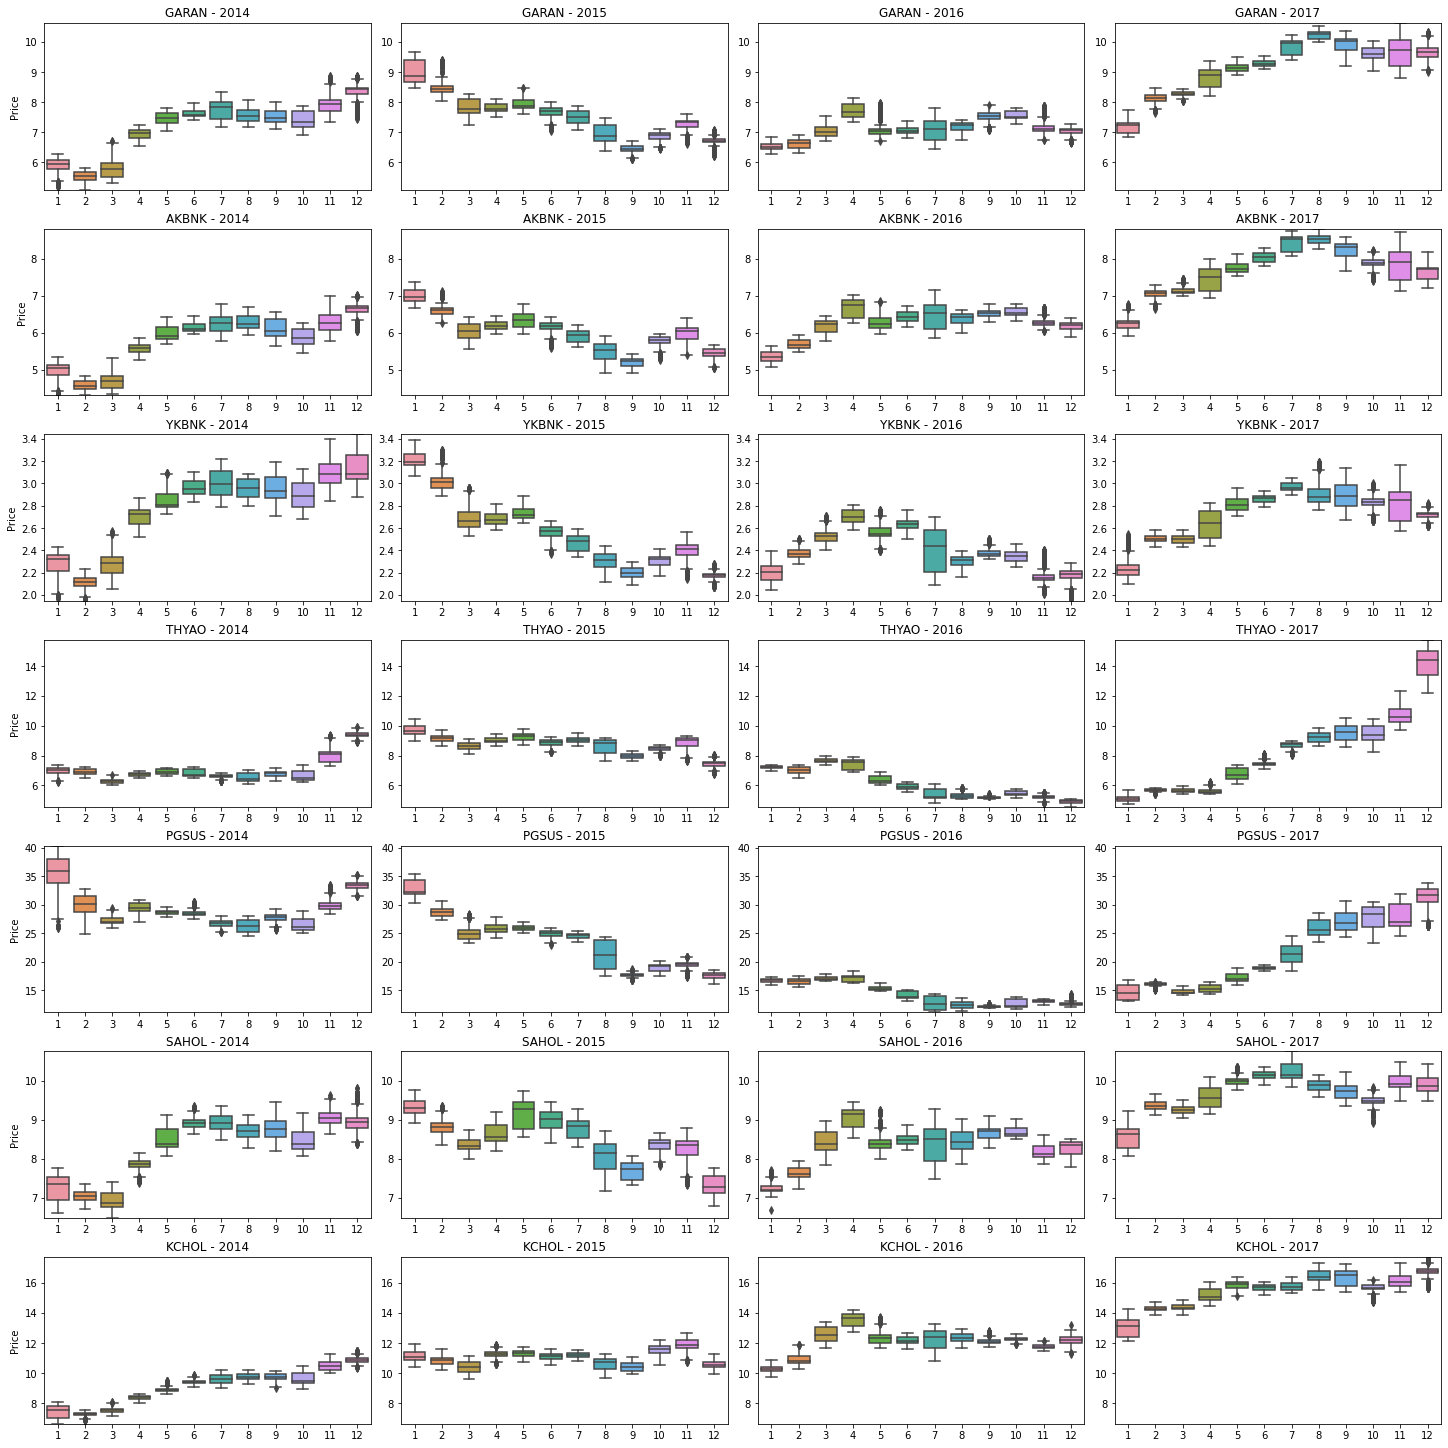

In [14]:
fig, axes = plt.subplots(len(selected_companies), 4, figsize=(20, 20), constrained_layout=True)

for i, company in enumerate(selected_companies):
    # Finding the min and max for the specific company
    company_min = interpolated_data[company].min()
    company_max = interpolated_data[company].max()
    
    for j, year in enumerate(range(2014, 2018)):
        monthly_data = interpolated_data[interpolated_data['Year'] == year]
        sns.boxplot(x="Month", y=company, data=monthly_data, ax=axes[i, j])
        axes[i, j].set_title(f"{company} - {year}")
        axes[i, j].set_xlabel("")
        axes[i, j].set_ylim(company_min, company_max)
        if j == 0:
            axes[i, j].set_ylabel("Price")
        else:
            axes[i, j].set_ylabel("")


plt.show()

# Yearly 3-Sigma Chart with Scattered Data Points over Y-Axis

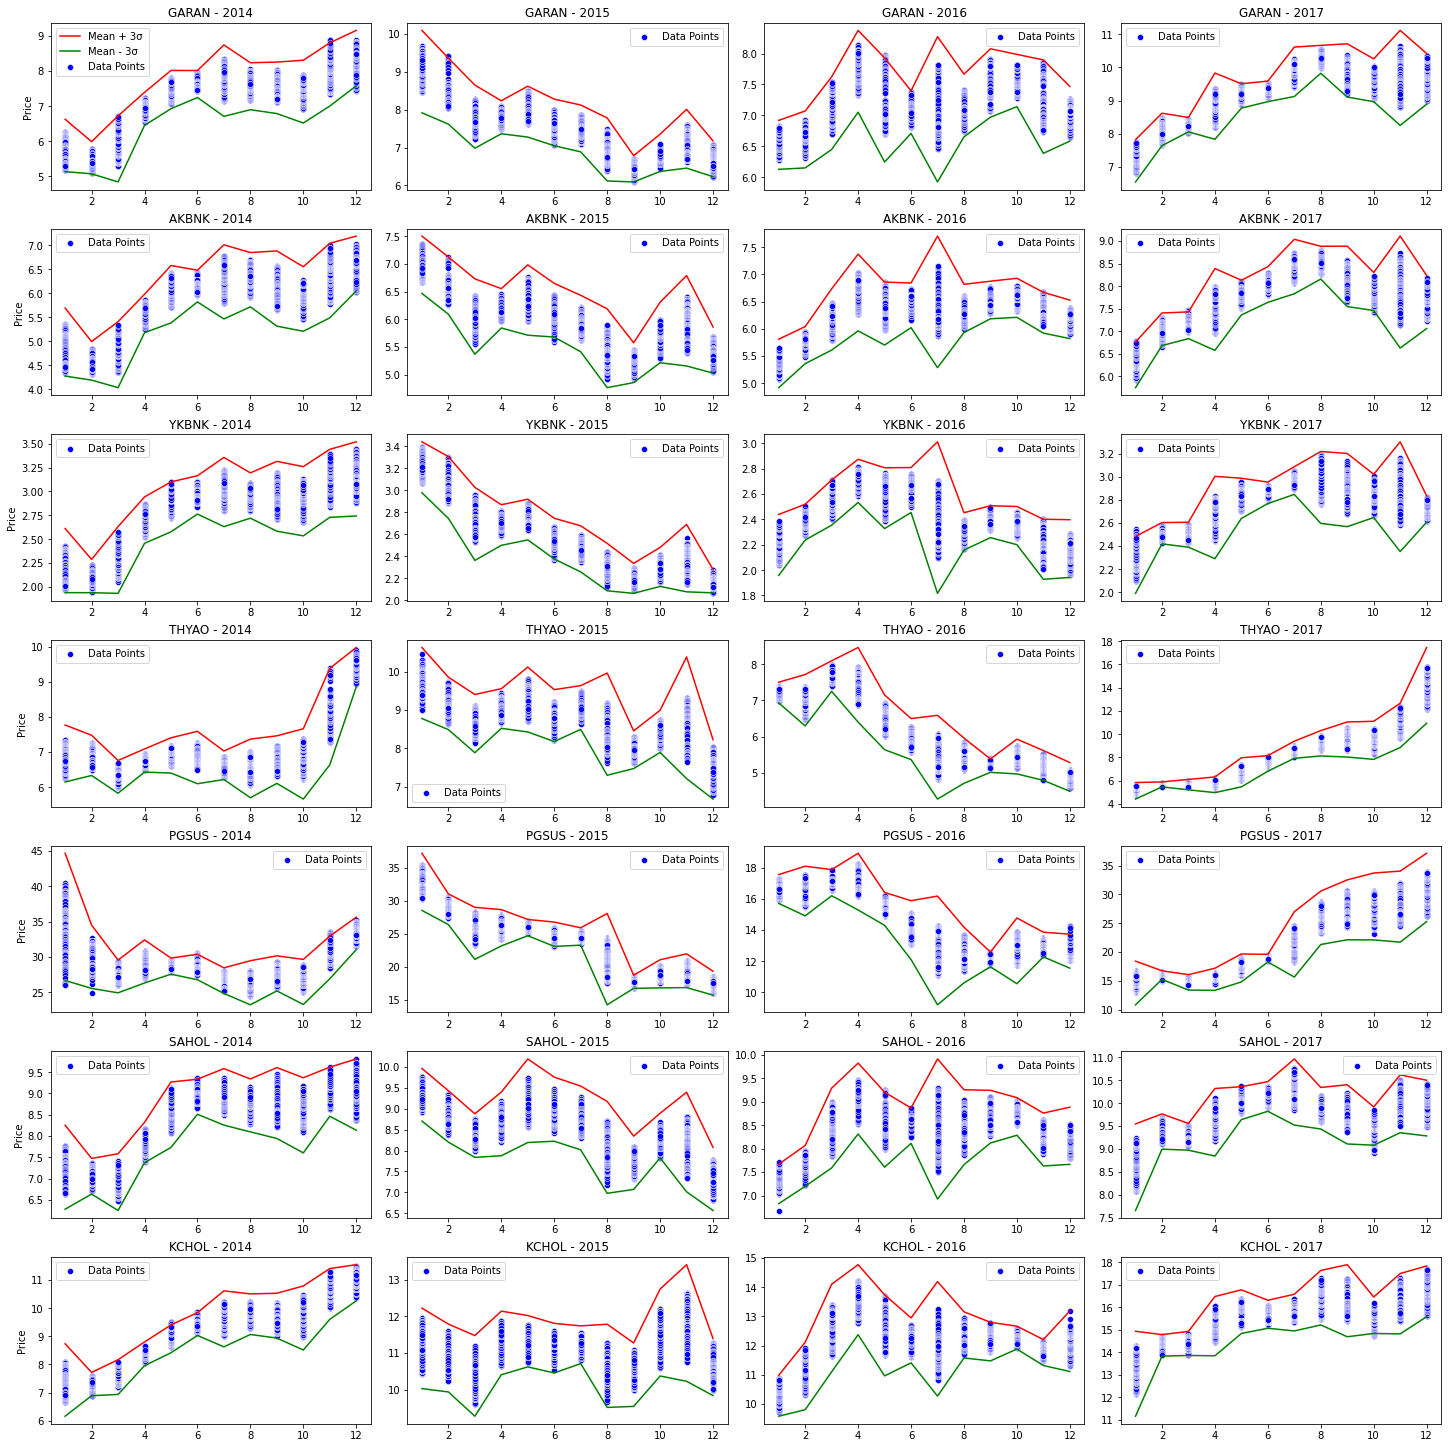

In [15]:
monthly_stats = interpolated_data.groupby(['Year', 'Month'])[selected_companies].agg(['mean', 'std'])

fig, axes = plt.subplots(len(selected_companies), 4, figsize=(20, 20), constrained_layout=True)

for i, company in enumerate(selected_companies):
    for j, year in enumerate(range(2014, 2018)):
        data_for_year = interpolated_data[interpolated_data['Year'] == year]
        
        # Extract monthly means and standard deviations for the specific company and year
        company_monthly_stats = monthly_stats[company].loc[year]
        
        # Compute the 3-sigma bounds for each month
        upper_bound = company_monthly_stats['mean'] + 3 * company_monthly_stats['std']
        lower_bound = company_monthly_stats['mean'] - 3 * company_monthly_stats['std']
        
        # Plot data points and the 3-sigma bounds
        sns.scatterplot(x='Month', y=company, data=data_for_year, ax=axes[i, j], color='blue', label='Data Points')
        axes[i, j].plot(company_monthly_stats.index, upper_bound, color='red', label='Mean + 3σ')
        axes[i, j].plot(company_monthly_stats.index, lower_bound, color='green', label='Mean - 3σ')
        
        axes[i, j].set_title(f"{company} - {year}")
        axes[i, j].set_xlabel("")
        if j == 0:
            axes[i, j].set_ylabel("Price")
        else:
            axes[i, j].set_ylabel("")
        if i == 0 and j == 0:
            axes[i, j].legend()


plt.show()

# 3 SIGMA CHART
* Control chart plot is built for each year and each month. However, we could not generate single code block to generate all plots. 

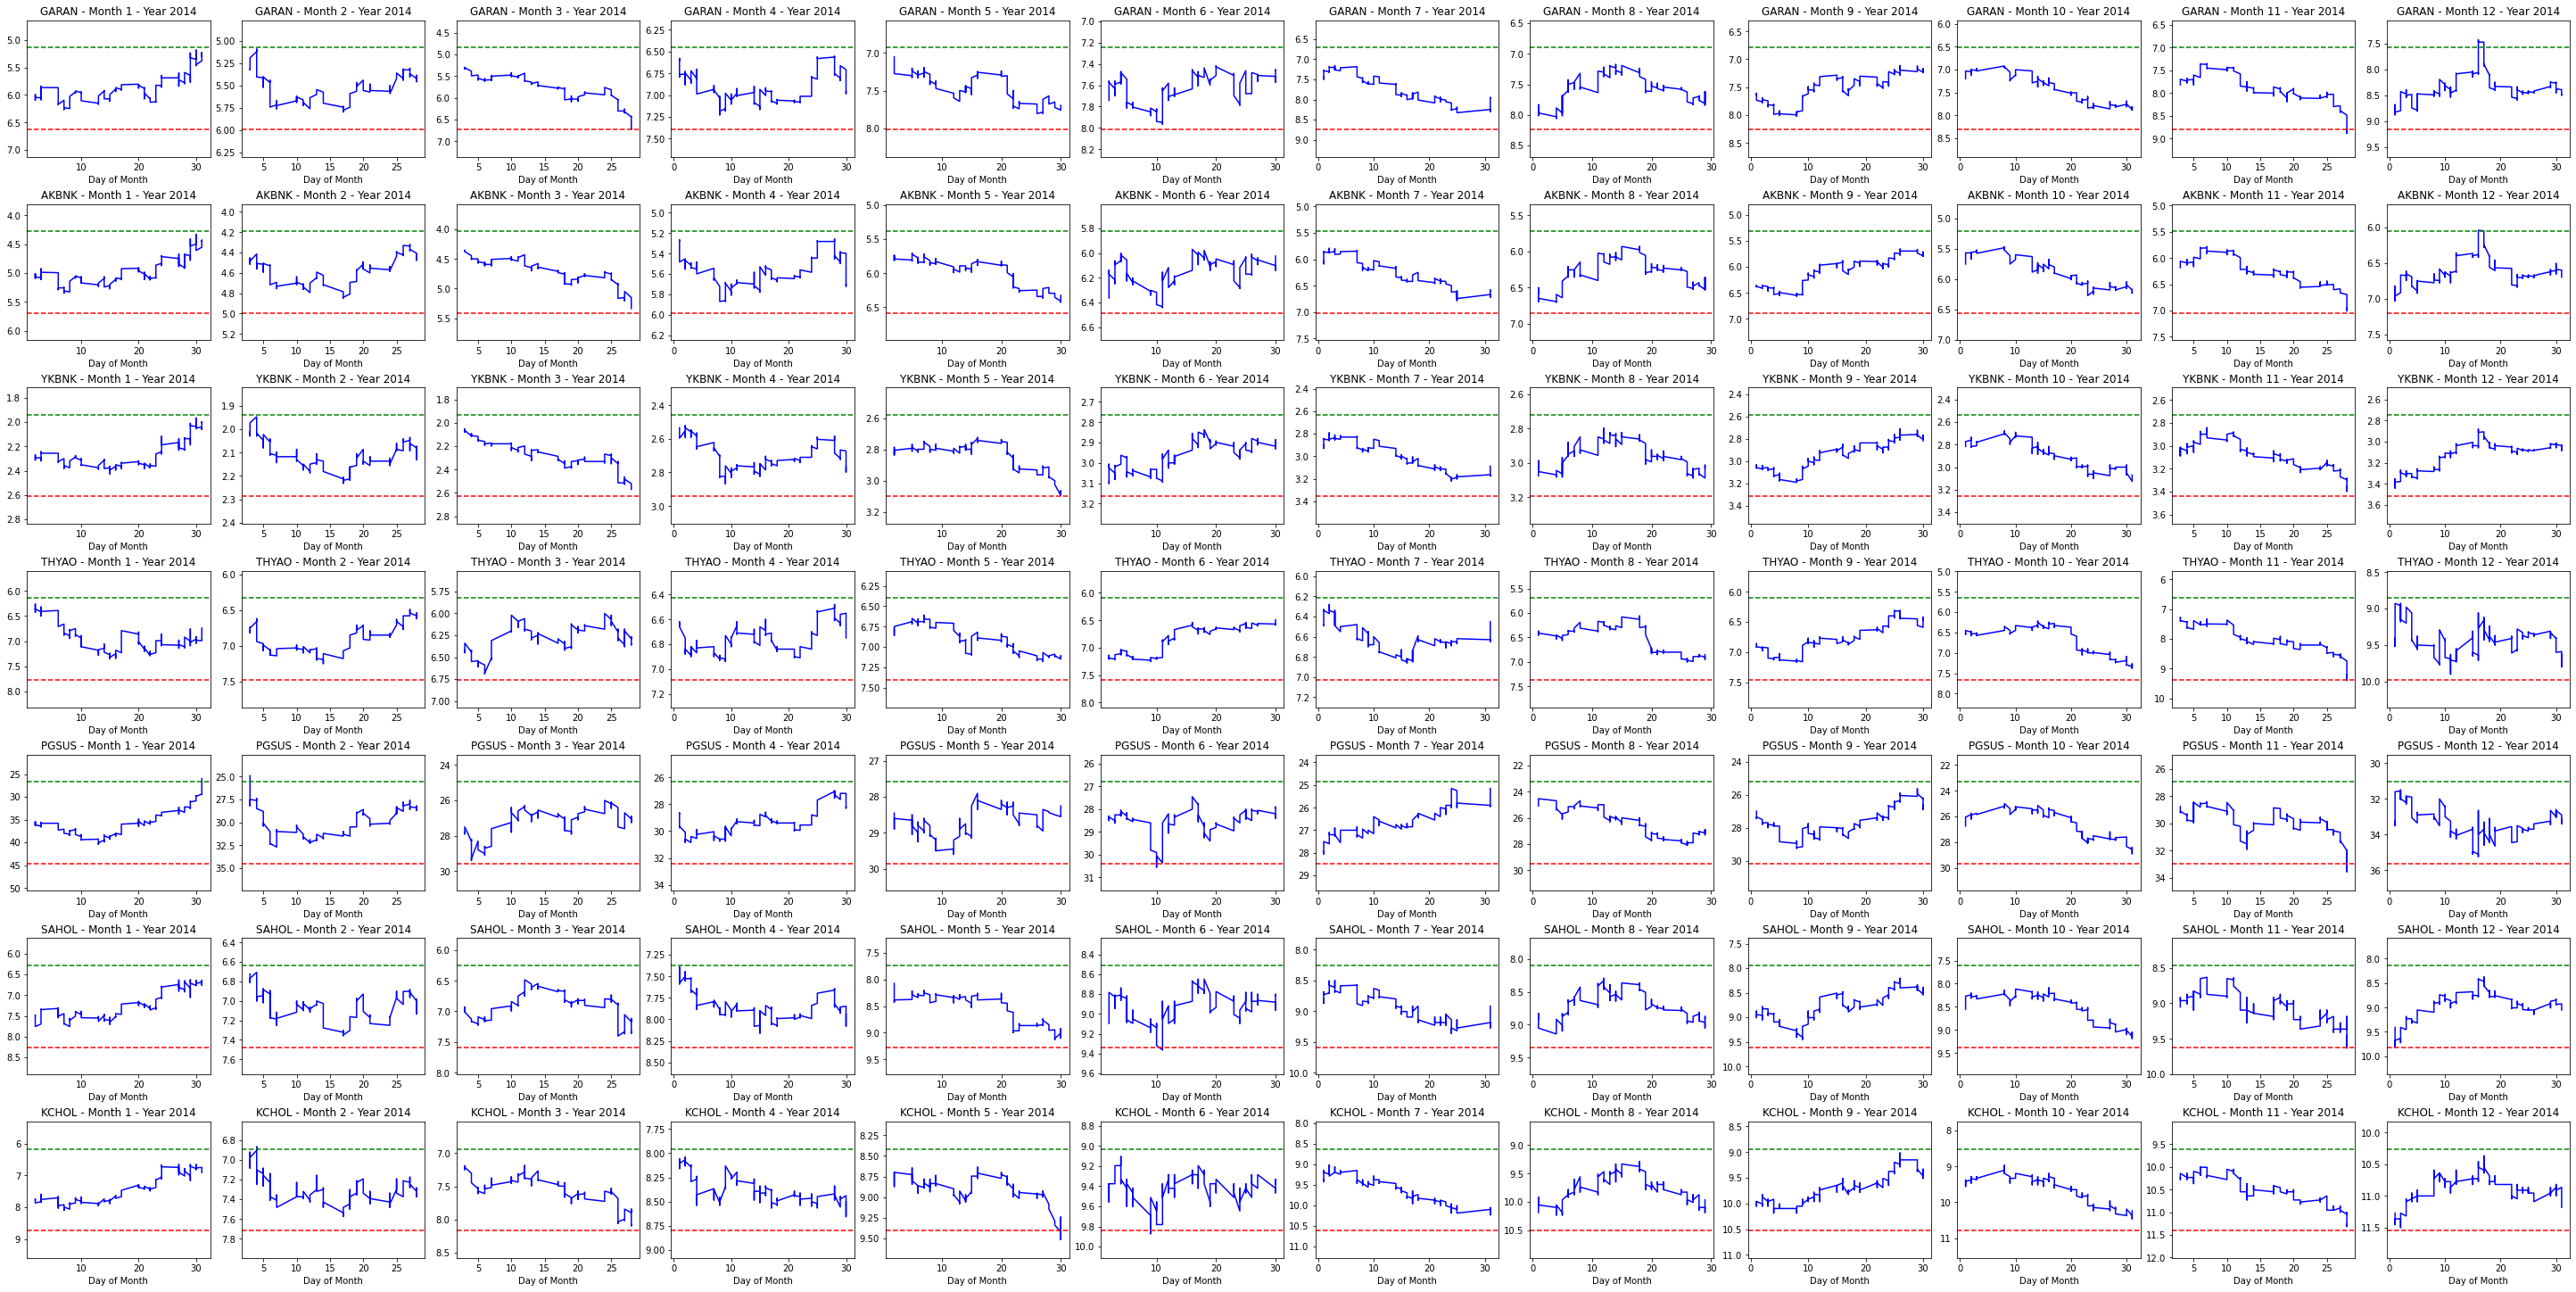

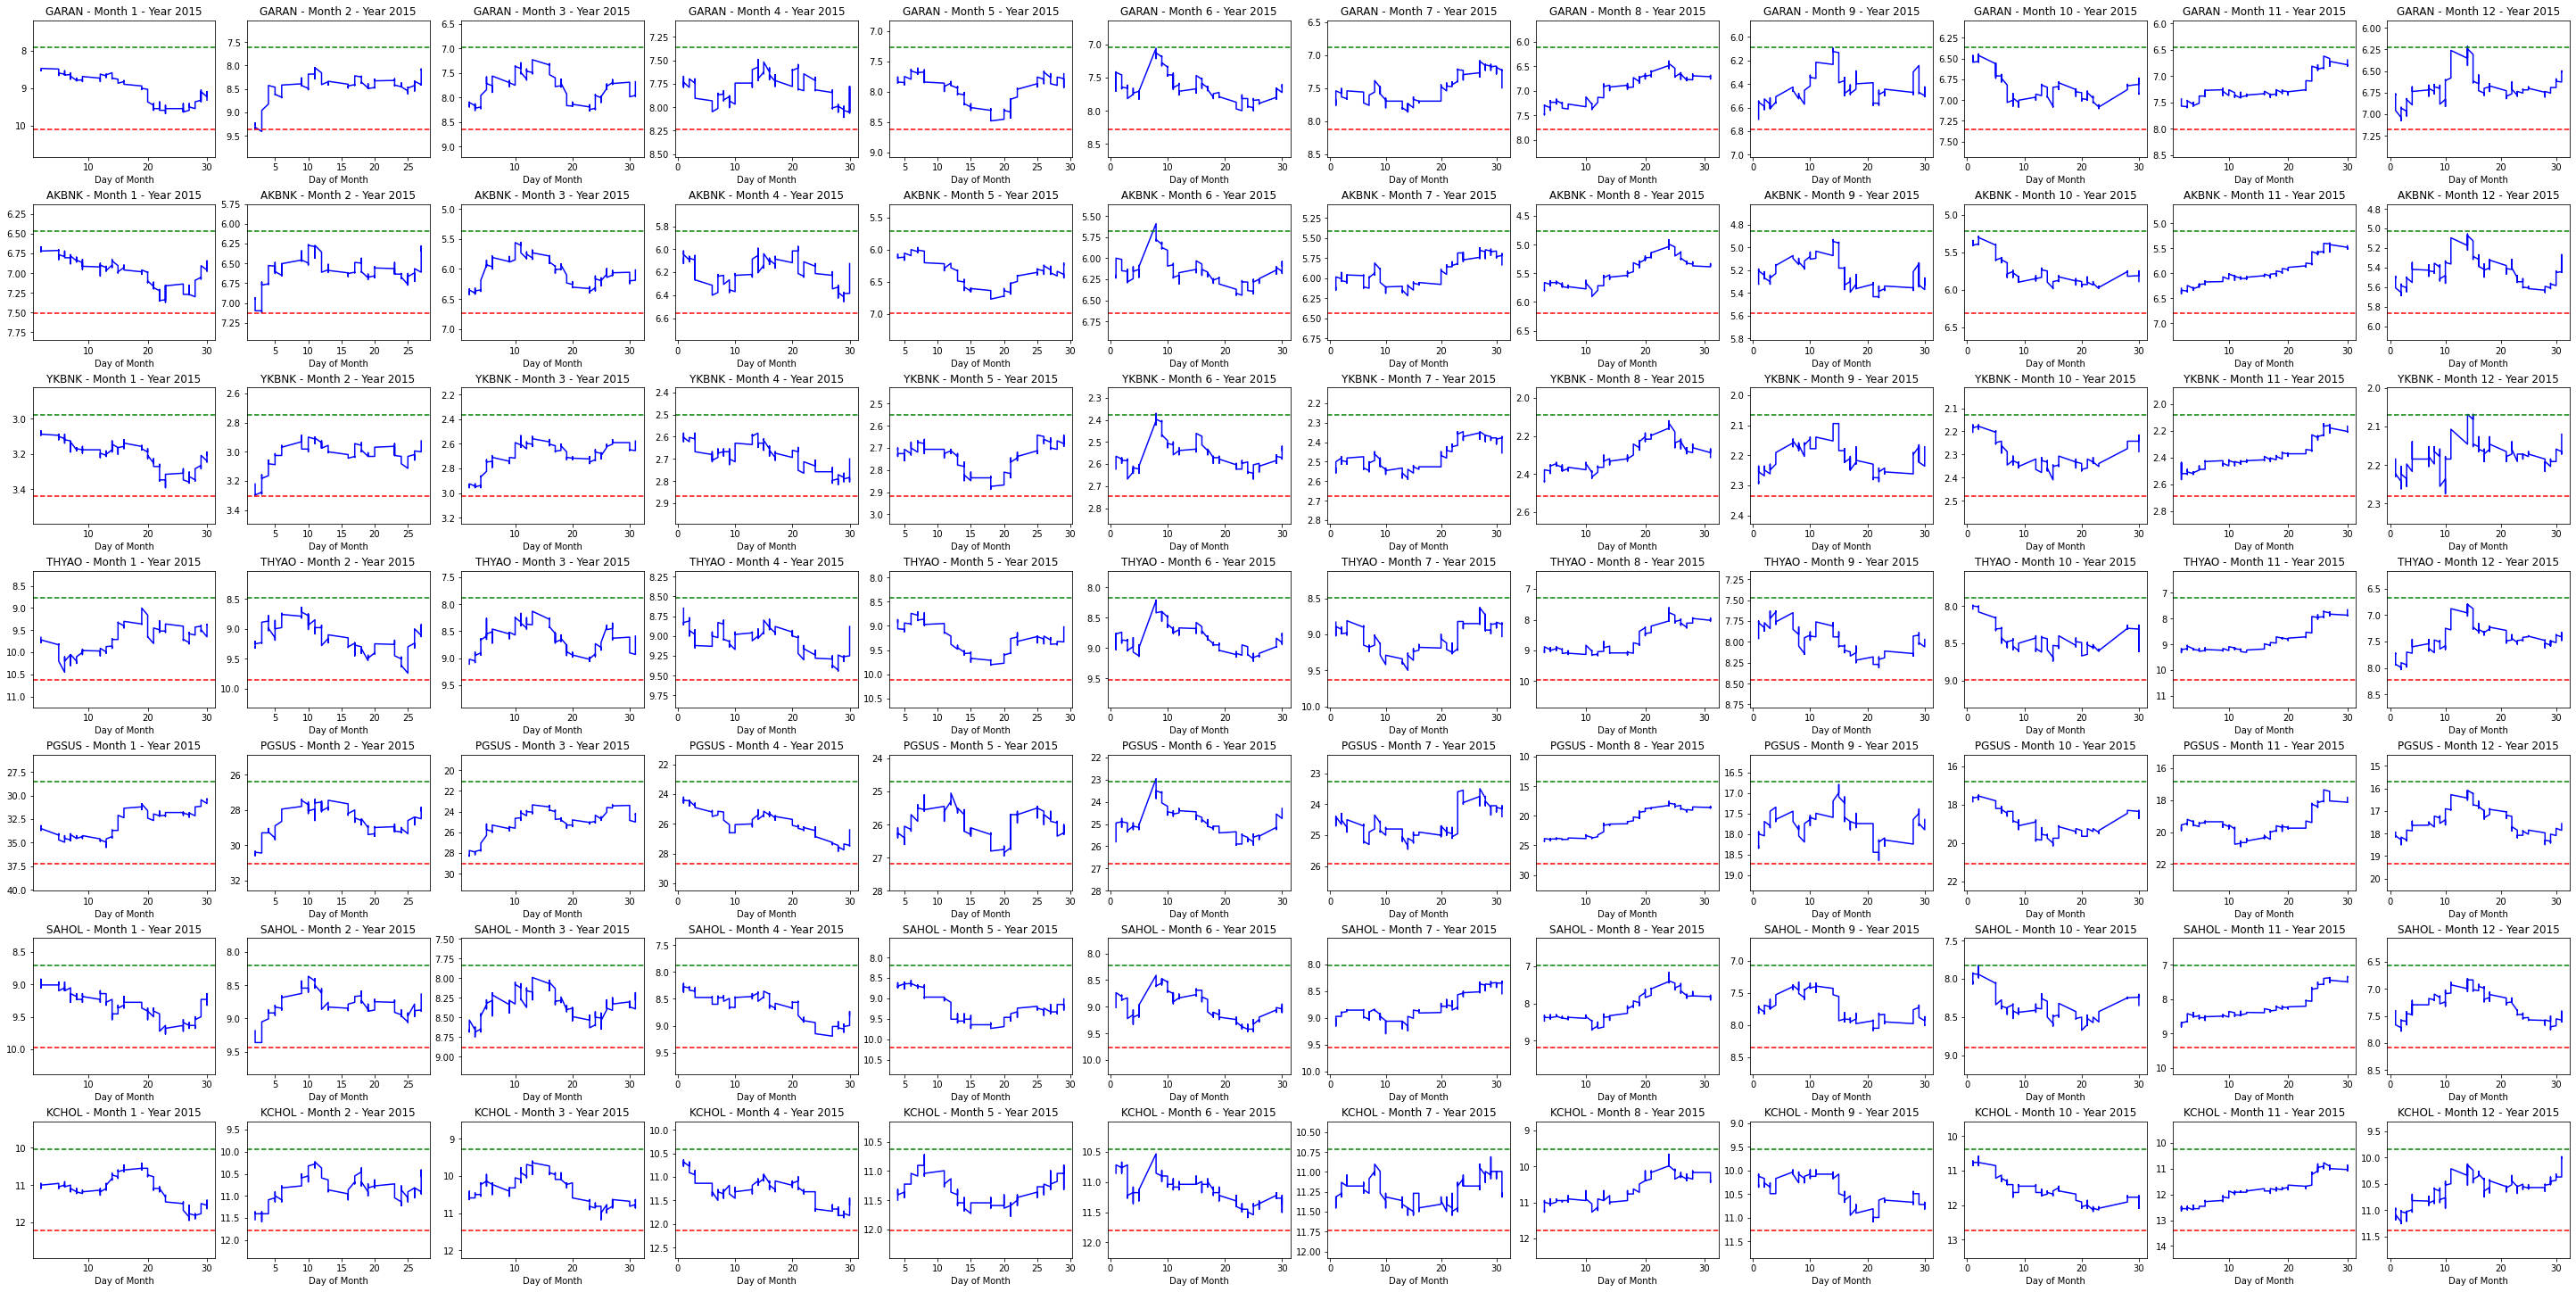

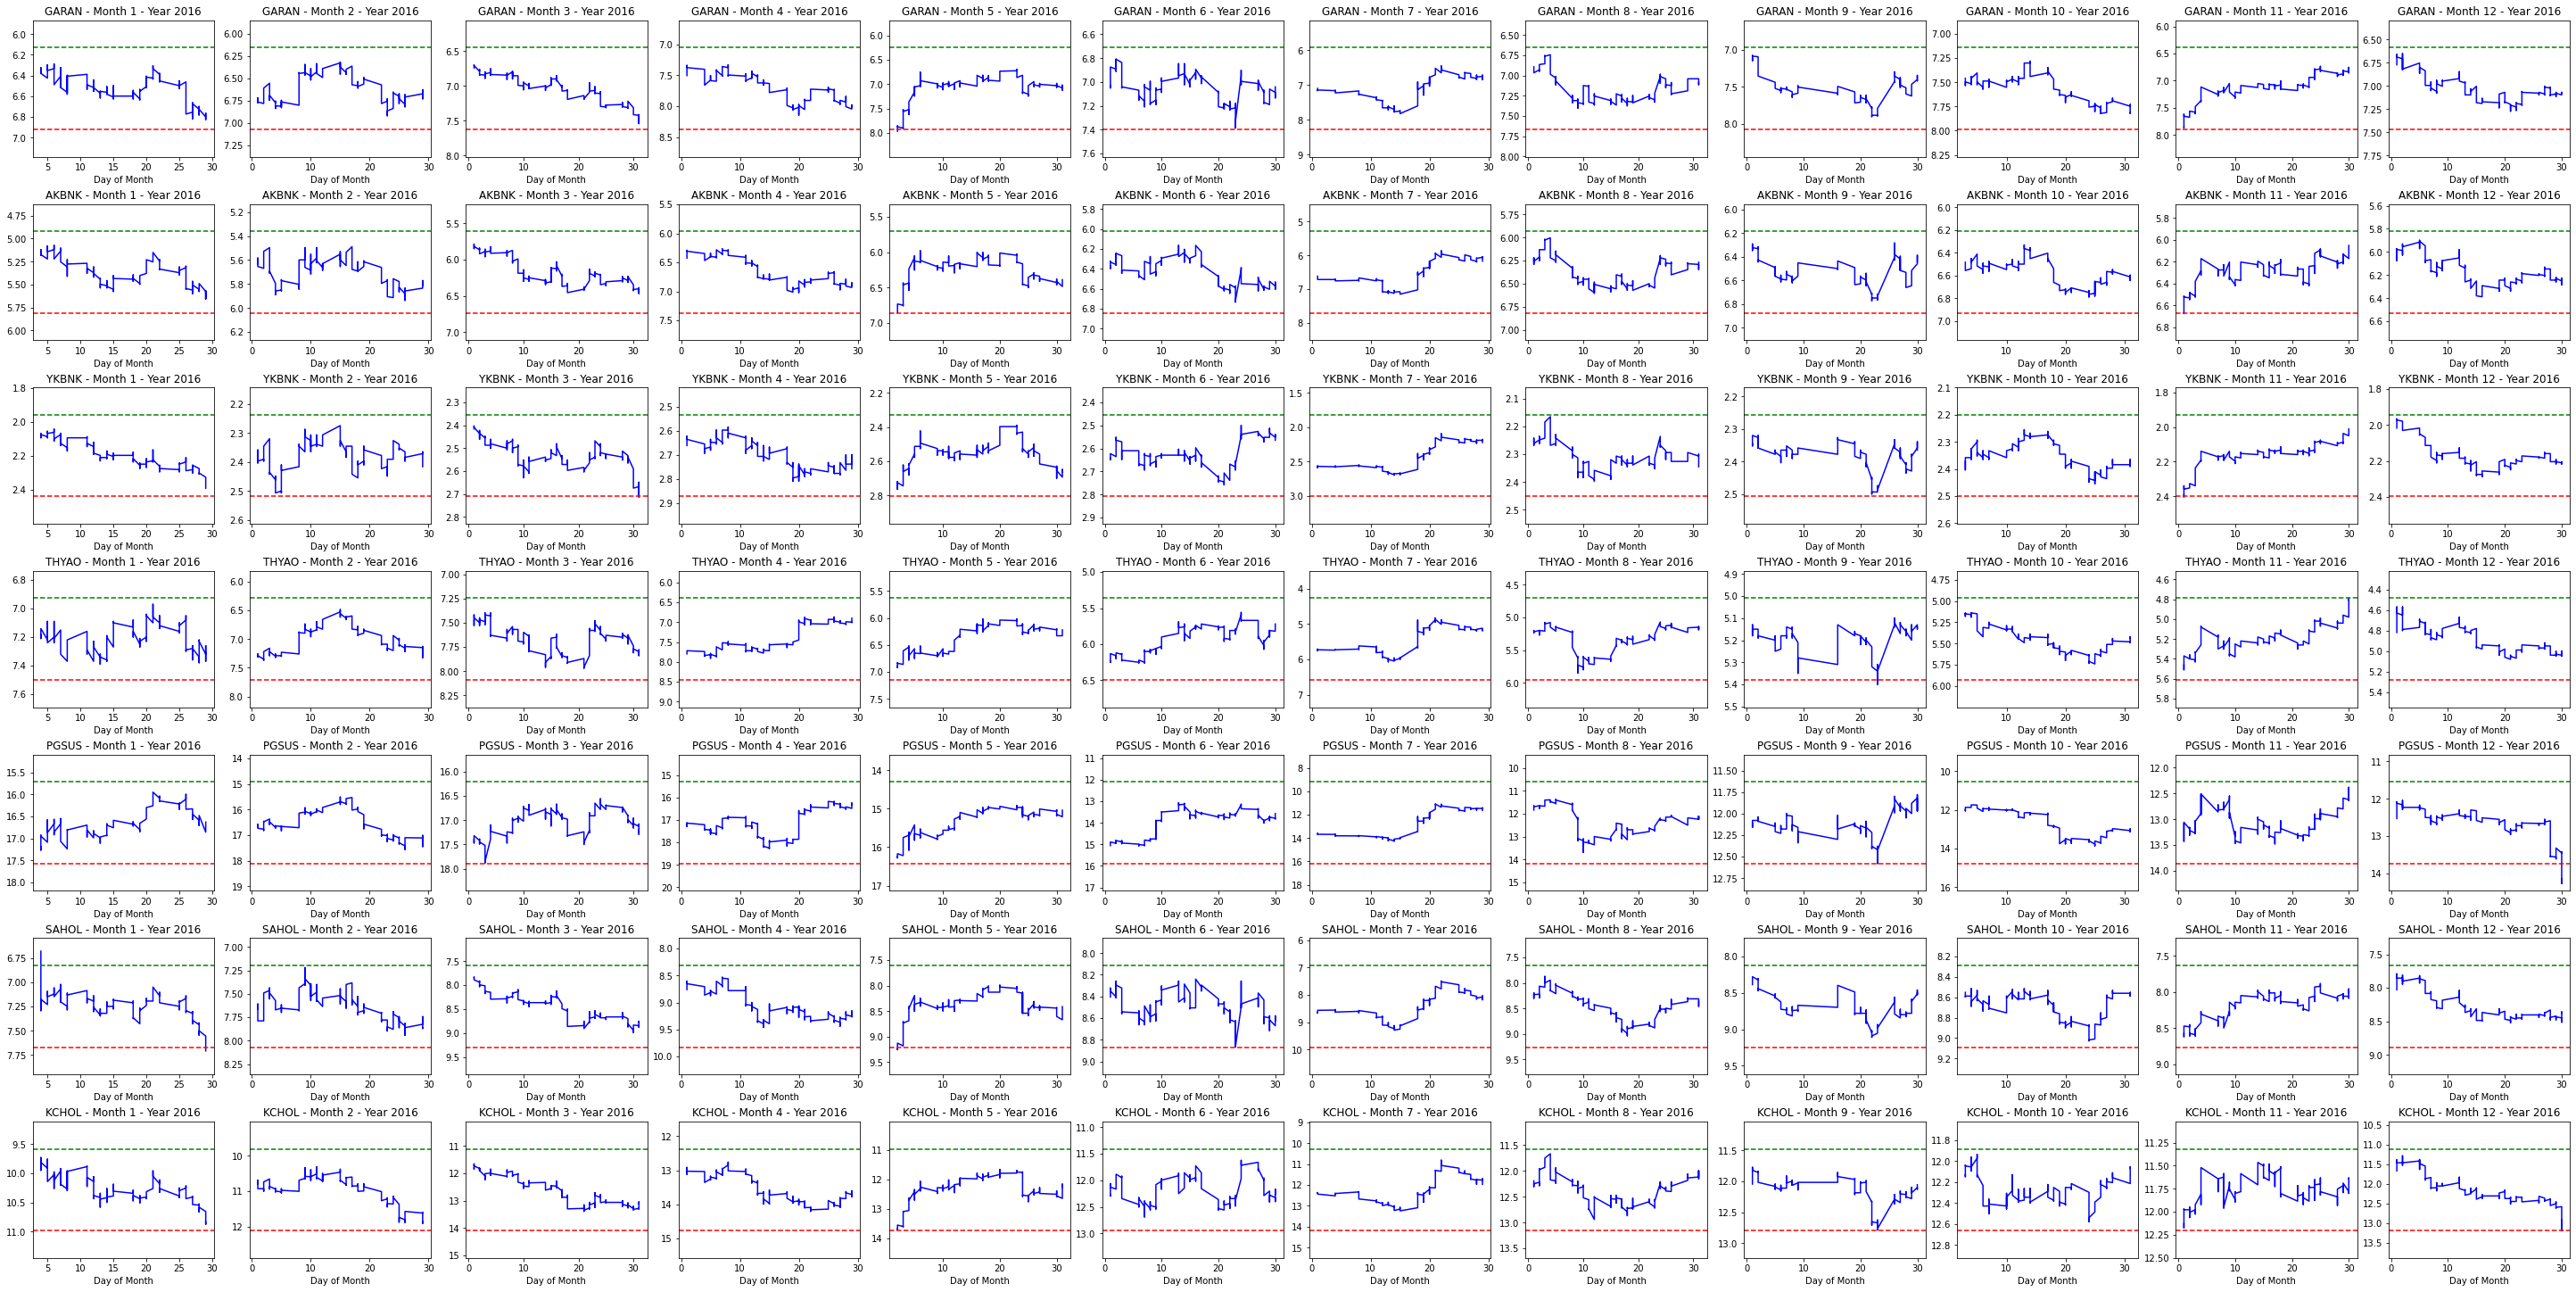

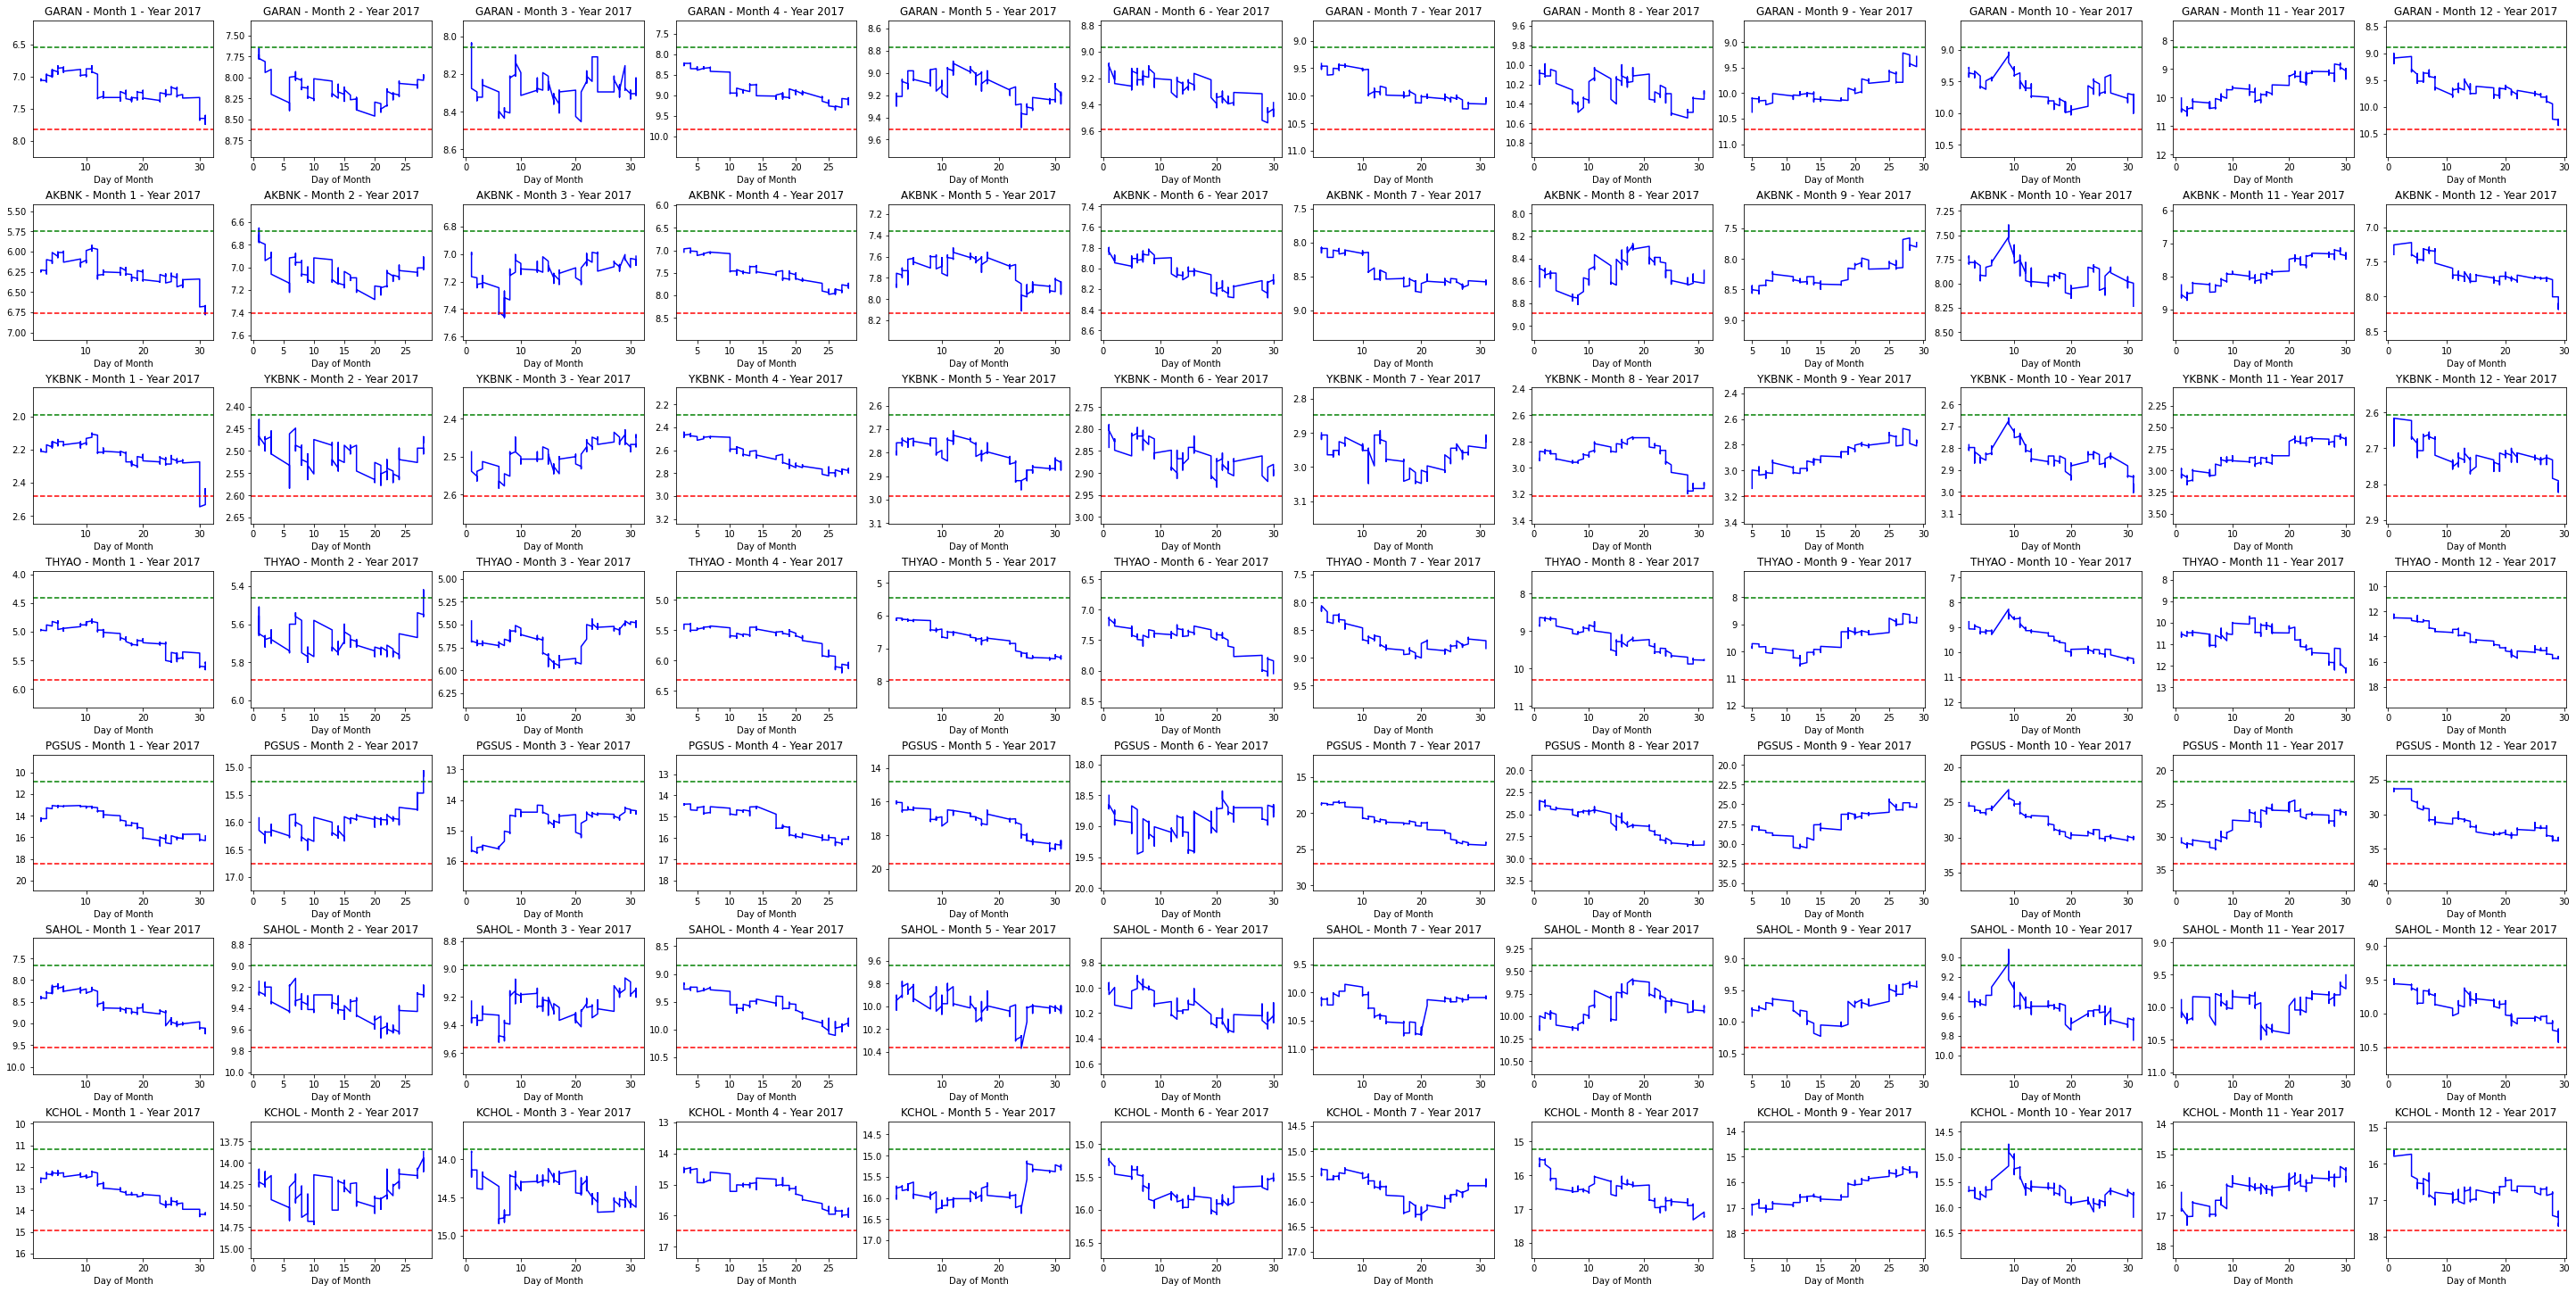

In [20]:
def plot_generator(year):
    fig, axes = plt.subplots(7, 12, figsize=(40, 20), constrained_layout=True)

    daily_stats = interpolated_data.groupby(['Year', 'Month', 'timestamp'])[selected_companies].mean()

    for j, company in enumerate(selected_companies):
        for x, year in enumerate(range(year, year+1)):
            for i, month in enumerate(range(1, 13)):


                data_for_year = data_for_month = daily_stats.xs((year))[company].reset_index()

                # Filter the data for the specific month across all years
                data_for_month = daily_stats.xs((year,month))[company].reset_index()

                # Compute the 3-sigma bounds for the month for the specific company
                yearly_std = data_for_year[company].std()
                yearly_mean = data_for_year[company].mean()

                monthly_mean = data_for_month[company].mean()
                monthly_std = data_for_month[company].std()

                upper_bound = monthly_mean + 3 * monthly_std
                lower_bound = monthly_mean - 3 * monthly_std

                yearly_upper_bound = yearly_mean + 3 * yearly_std
                yearly_lower_bound = yearly_mean - 3 * yearly_std


                # Plot data points and the 3-sigma bounds
                axes[j, i].plot(data_for_month['timestamp'].dt.day, data_for_month[company], color='blue', label=f"{company} Data Points")
                axes[j, i].axhline(upper_bound, color='red', linestyle='--', label=f"{company} Mean + 3σ")
                axes[j, i].axhline(lower_bound, color='green', linestyle='--', label=f"{company} Mean - 3σ")

                axes[j, i].set_title(f"{company} - Month {month} - Year {year}")
                axes[j, i].set_xlabel("Day of Month")
                axes[j, i].set_ylim(monthly_mean + 5 * monthly_std, monthly_mean - 5 * monthly_std)
                
    plt.show()

plot_generator(2014)
plot_generator(2015)
plot_generator(2016)
plot_generator(2017)

### Listed all the outlier points to make internal check of our analysis. 

In [22]:
data = pd.read_csv('/Users/mustafacan/Desktop/all_ticks_wide.csv')

# Convert the 'timestamp' column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract year, month, and day from the 'timestamp' column
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour

# Limit the time interval from the beginning of 2014 to the end of 2017
data = data[(data['year'] >= 2014) & (data['year'] <= 2017)]

# List of company columns (excluding the timestamp and the extracted date columns)
companies = ['GARAN', 'AKBNK', 'YKBNK', 'THYAO', 'PGSUS', 'SAHOL', 'KCHOL']

outliers = []

# Iterate through each company
for company in companies:
    # Group by year and month, and calculate mean and standard deviation
    grouped = data.groupby(['year', 'month'])[company].agg(['mean', 'std'])
    
    # Merge the grouped data back to the original dataframe
    merged_data = data.merge(grouped, how='left', on=['year', 'month'])
    
    # Calculate the 3-sigma limits
    merged_data['lower_bound'] = merged_data['mean'] - 3 * merged_data['std']
    merged_data['upper_bound'] = merged_data['mean'] + 3 * merged_data['std']
    
    # Filter rows where the stock data is outside the 3-sigma limits
    outlier_data = merged_data[(merged_data[company] < merged_data['lower_bound']) | 
                               (merged_data[company] > merged_data['upper_bound'])]
    
    # Extract relevant information for the outliers
    for index, row in outlier_data.iterrows():
        outliers.append({
            'company': company,
            'year': row['year'],
            'month': row['month'],
            'day': row['day'],
            'hour': row['hour'],
            'stock_value': row[company]
        })

# Convert the list of outliers to a DataFrame
outliers_df = pd.DataFrame(outliers)

outliers_df


company  year  month  day  hour  stock_value
0     GARAN  2014     11   28    14       8.8857
1     GARAN  2014     11   28    14       8.8766
2     GARAN  2014     12   16    14       7.5352
3     GARAN  2014     12   16    14       7.4271
4     GARAN  2014     12   16    15       7.4631
5     GARAN  2014     12   16    15       7.4722
6     GARAN  2014     12   16    15       7.4722
7     GARAN  2014     12   17     7       7.4722
8     GARAN  2014     12   17     7       7.5262
9     GARAN  2014     12   17     8       7.5711
10    GARAN  2014     12   17     8       7.5711
11    GARAN  2014     12   17     9       7.5711
12    GARAN  2014     12   17     9       7.5711
13    GARAN  2014     12   17     9       7.5622
14    GARAN  2014     12   17    10       7.5622
15    GARAN  2014     12   17    10       7.5531
16    GARAN  2014     12   17    10       7.5531
17    GARAN  2014     12   17    12       7.5622
18    GARAN  2015      2    2     9       9.3628
19    GARAN  2015      2    2    12       9.3628
20    GARAN  2015      2    2    12       9.3628
21    GARAN  2015      2    2    12       9.3628
22    GARAN  2015      2    2    12       9.3628
23    GARAN  2015      2    2    13       9.3628
24    GARAN  2015      2    2    14       9.3628
25    GARAN  2015      2    2    14       9.3628
26    GARAN  2015      2    2    15       9.3628
27    GARAN  2015      2    2    15       9.3628
28    GARAN  2015      2    3     7       9.4078
29    GARAN  2015      2    3     7       9.4078
30    GARAN  2015     12   14    14       6.2248
31    GARAN  2015     12   14    15       6.2156
32    GARAN  2015     12   14    15       6.2156
33    GARAN  2016      5    2     6       7.9700
34    GARAN  2016      5    2     6       7.9607
35    GARAN  2016      5    2     7       7.9515
36    GARAN  2016      5    2     7       7.9329
37    GARAN  2016      5    2     7       7.9422
38    GARAN  2016      5    2     8       7.9515
39    GARAN  2016      5    2     8       7.9329
40    GARAN  2016      5    2     8       7.9329
41    GARAN  2017      3    1     6       8.0444
42    GARAN  2017      3    1     7       8.0351
43    GARAN  2017      3    1     7       8.0351
44    GARAN  2017      3    1     7       8.0536
45    AKBNK  2014     12   16    14       6.0394
46    AKBNK  2014     12   16    15       6.0470
47    AKBNK  2014     12   16    15       6.0394
48    AKBNK  2014     12   17     7       6.0470
49    AKBNK  2015      2    3     7       7.1220
50    AKBNK  2015      6    8     6       5.5905
51    AKBNK  2015      6    8     6       5.6457
52    AKBNK  2015      6    8     7       5.6692
53    AKBNK  2015      6    8     7       5.6692
54    AKBNK  2015      6    8     8       5.6457
55    AKBNK  2015      6    8     8       5.6378
56    AKBNK  2015      6    8     8       5.6300
57    AKBNK  2015      6    8     8       5.6300
58    AKBNK  2015      6    8     9       5.6378
59    AKBNK  2015      6    8     9       5.6300
60    AKBNK  2015      6    8    11       5.6457
61    AKBNK  2016     11    1     6       6.6761
62    AKBNK  2016     11    1     7       6.6761
63    AKBNK  2016     11    1     8       6.6761
64    AKBNK  2016     11    1    11       6.6761
65    AKBNK  2016     11    1    11       6.6761
66    AKBNK  2017      1   31    11       6.7643
67    AKBNK  2017      1   31    14       6.7643
68    AKBNK  2017      1   31    14       6.7803
69    AKBNK  2017      2    1     8       6.6681
70    AKBNK  2017      2    1     8       6.6521
71    AKBNK  2017      3    6    12       7.4375
72    AKBNK  2017      3    6    13       7.4375
73    AKBNK  2017      3    6    13       7.4375
74    AKBNK  2017      3    6    13       7.4375
75    AKBNK  2017      3    6    13       7.4294
76    AKBNK  2017      3    6    14       7.4294
77    AKBNK  2017      3    7     6       7.4535
78    AKBNK  2017      3    7     7       7.4294
79    AKBNK  2017      3    7     7       7.4615
80    AKBNK  2017      3    7     7

# OUTLIER INTERVAL LISTING
* Combined all the outliers as -+ 5 day interval for better search time horizon. 

In [23]:
data = pd.read_csv('/Users/mustafacan/Desktop/all_ticks_wide.csv')

# List of companies to filter
companies = ['GARAN', 'AKBNK', 'YKBNK', 'THYAO', 'PGSUS', 'SAHOL', 'KCHOL']

# Convert the timestamp column to datetime type
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Filter the data based on the given time range
filtered_data = data[
    (data['timestamp'] >= '2014-01-01') & 
    (data['timestamp'] <= '2017-12-31')
][['timestamp'] + companies]

# Extract year and month from the timestamp
filtered_data['year'] = filtered_data['timestamp'].dt.year
filtered_data['month'] = filtered_data['timestamp'].dt.month

grouped = filtered_data.groupby(['year', 'month'])

# Calculate the mean and standard deviation for each group
stats = grouped[companies].agg(['mean', 'std'])

# Calculate the UCL and LCL
for company in companies:
    stats[(company, 'UCL')] = stats[(company, 'mean')] + 3 * stats[(company, 'std')]
    stats[(company, 'LCL')] = stats[(company, 'mean')] - 3 * stats[(company, 'std')]


interpolated_data = filtered_data.copy()

# Apply linear interpolation to each column based on the timestamp
for company in companies:
    interpolated_data[company] = interpolated_data[company].interpolate(method='linear')


# Group by year and month, and then calculate the mean and standard deviation for each company's column
grouped_interpolated = interpolated_data.groupby(['year', 'month'])

# Calculate the mean and standard deviation for each group
stats_interpolated = grouped_interpolated[companies].agg(['mean', 'std'])

# Calculate the UCL and LCL
for company in companies:
    stats_interpolated[(company, 'UCL')] = stats_interpolated[(company, 'mean')] + 3 * stats_interpolated[(company, 'std')]
    stats_interpolated[(company, 'LCL')] = stats_interpolated[(company, 'mean')] - 3 * stats_interpolated[(company, 'std')]


outliers = []

# Iterate over each company to identify outliers
for company in companies:
    for (year, month), group in interpolated_data.groupby(['year', 'month']):
        UCL = stats_interpolated.loc[(year, month), (company, 'UCL')]
        LCL = stats_interpolated.loc[(year, month), (company, 'LCL')]
        
        # Find the outliers in the current group for the current company
        outlier_data = group[(group[company] > UCL) | (group[company] < LCL)]
        
        for idx, row in outlier_data.iterrows():
            # Extract the +/- 5 days surrounding the outlier day
            start_date = row['timestamp'] - pd.Timedelta(days=5)
            end_date = row['timestamp'] + pd.Timedelta(days=5)
            
            surrounding_data = interpolated_data[(interpolated_data['timestamp'] >= start_date) & 
                                                 (interpolated_data['timestamp'] <= end_date)]
            
            outliers.append({
                'company': company,
                'outlier_date': row['timestamp'],
                'surrounding_data': surrounding_data
            })

# Convert the list of outliers to a DataFrame for better visualization
outliers_df = pd.DataFrame(outliers)

# Displaying the number of outliers detected for each company
outliers_count = outliers_df['company'].value_counts()

# Function to compute the combined intervals for a given company
def compute_intervals(company_data):
    combined_intervals = []
    
    # Sort the outlier data by date
    company_data = company_data.sort_values(by="outlier_date")

    # Initialize the first interval
    start_interval = company_data.iloc[0]['surrounding_data']['timestamp'].min()
    end_interval = company_data.iloc[0]['surrounding_data']['timestamp'].max()

    for idx, row in company_data.iterrows():
        current_start = row['surrounding_data']['timestamp'].min()
        current_end = row['surrounding_data']['timestamp'].max()
        
        # If the current interval intersects with the previous one, combine them
        if current_start <= end_interval:
            end_interval = max(end_interval, current_end)
        else:
            # If not, store the previous interval and start a new one
            combined_intervals.append((start_interval, end_interval))
            start_interval = current_start
            end_interval = current_end

    # Add the last interval
    combined_intervals.append((start_interval, end_interval))
    
    return combined_intervals

all_intervals = {}
for company in companies:
    company_data = outliers_df[outliers_df['company'] == company]
    all_intervals[company] = compute_intervals(company_data)

verbal_intervals = {}
for company, intervals in all_intervals.items():
    formatted_intervals = []
    for start, end in intervals:
        start_str = start.strftime('%dth of %B %Y')
        end_str = end.strftime('%dth of %B %Y')
        formatted_intervals.append((start_str, end_str))
    verbal_intervals[company] = formatted_intervals

verbal_intervals

{'GARAN': [('24th of November 2014', '03th of December 2014'),
  ('11th of December 2014', '22th of December 2014'),
  ('29th of January 2015', '06th of February 2015'),
  ('09th of December 2015', '18th of December 2015'),
  ('27th of April 2016', '06th of May 2016'),
  ('24th of February 2017', '06th of March 2017')],
 'AKBNK': [('11th of December 2014', '22th of December 2014'),
  ('03th of June 2015', '12th of June 2015'),
  ('27th of October 2016', '04th of November 2016'),
  ('26th of January 2017', '06th of February 2017'),
  ('01th of March 2017', '10th of March 2017'),
  ('04th of October 2017', '13th of October 2017')],
 'YKBNK': [('03th of June 2015', '12th of June 2015'),
  ('09th of December 2015', '18th of December 2015'),
  ('28th of March 2016', '05th of April 2016'),
  ('27th of October 2016', '04th of November 2016'),
  ('25th of January 2017', '03th of February 2017')],
 'THYAO': [('24th of November 2014', '03th of December 2014'),
  ('19th of September 2016', '28th 

# Trend Analysis
* Used this type of analysis mainly due to better understanding of the trend analysis. The stock data fluctates a lot and it may not be easy to obtain whether it has increasing, decreasing or stable trend. So we used the seasonal decomposition method to provide better visualization of the data. Also, since we are using multiple companies within one sector, we can obtain better understanding of the sectoral dynamics. As it is observed below, banking companies stay within the same trend pattern which is a noticable pattern through the analysis. 
* Divided each company data for 2 year interval because the seasonal decomposition requires at least two cycles of data, in our case the repetetive cycle is year, so we provided 2 years of input.

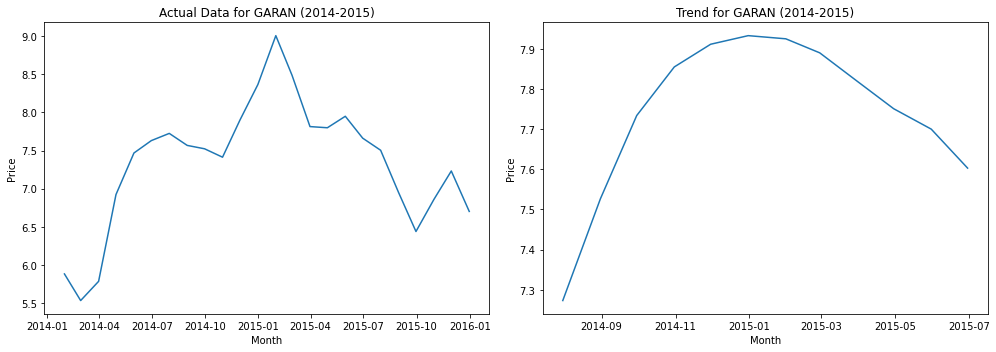

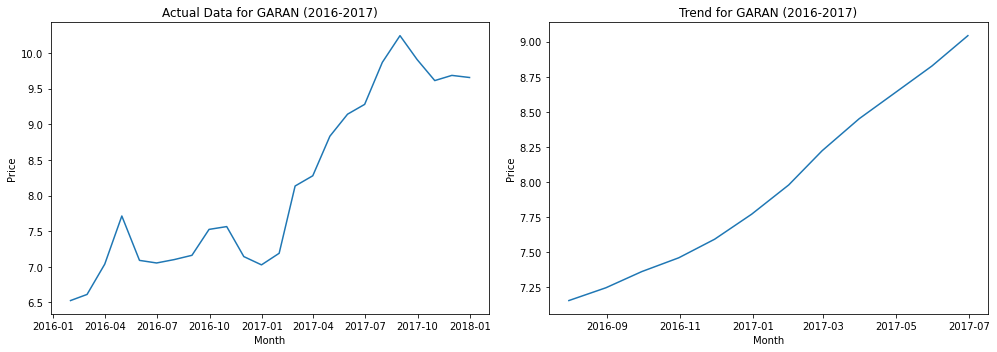

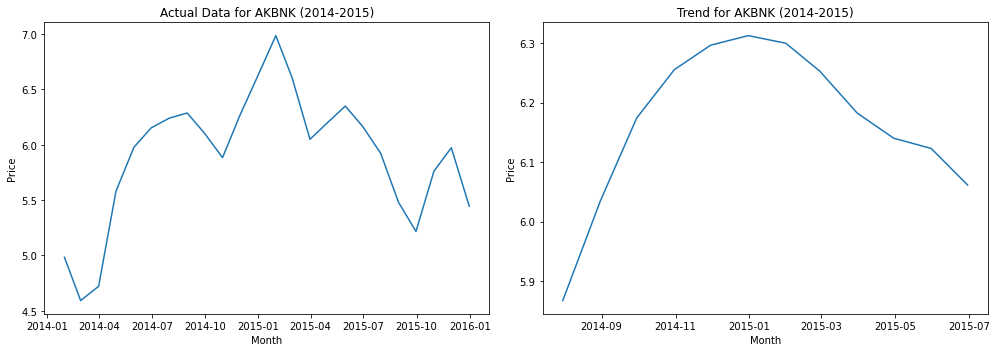

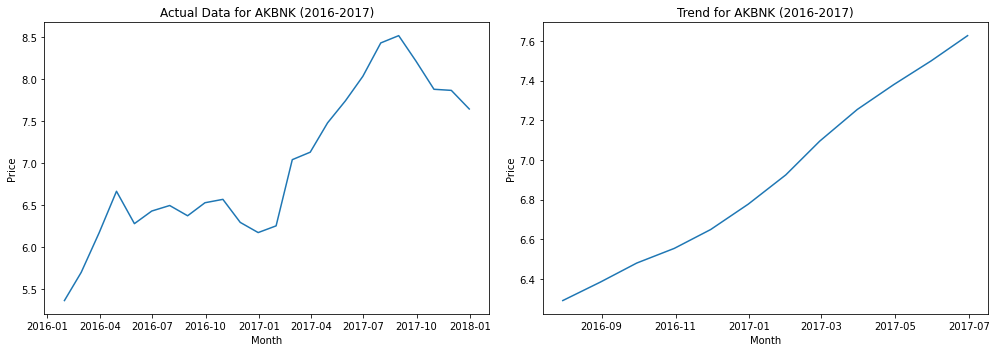

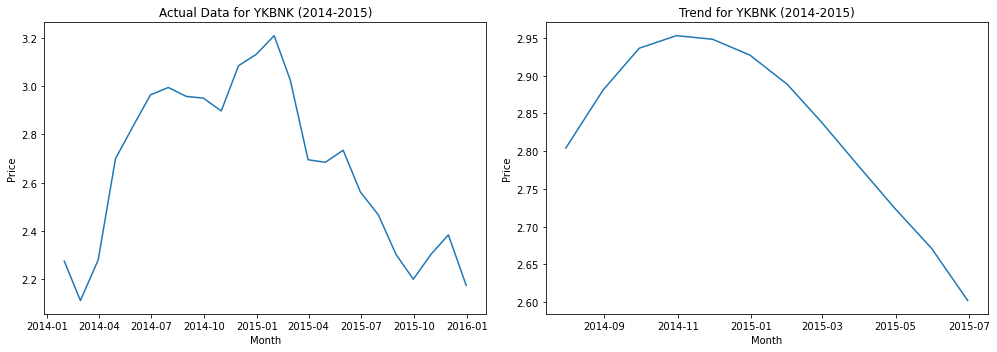

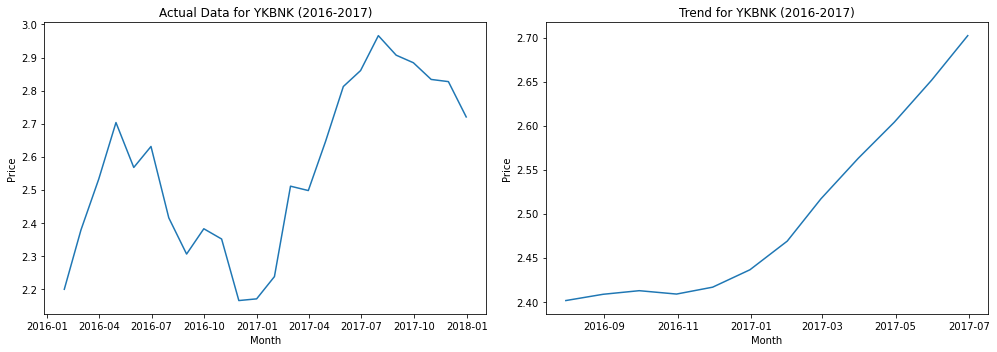

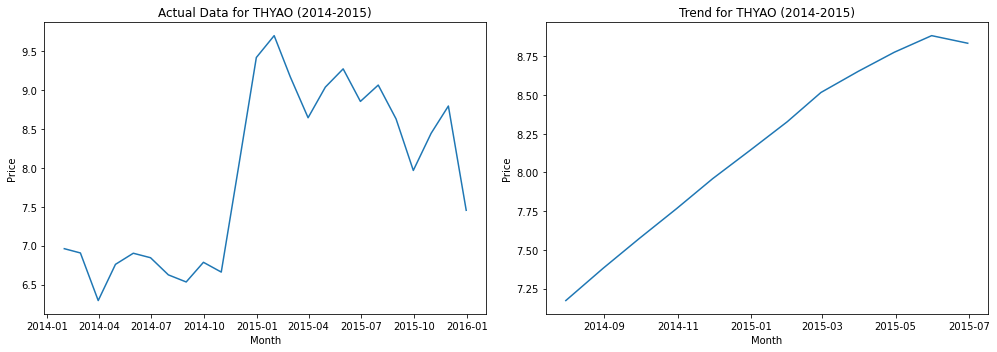

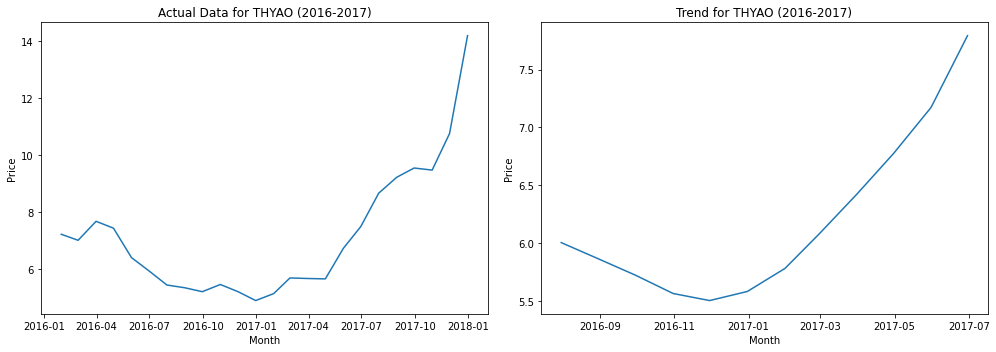

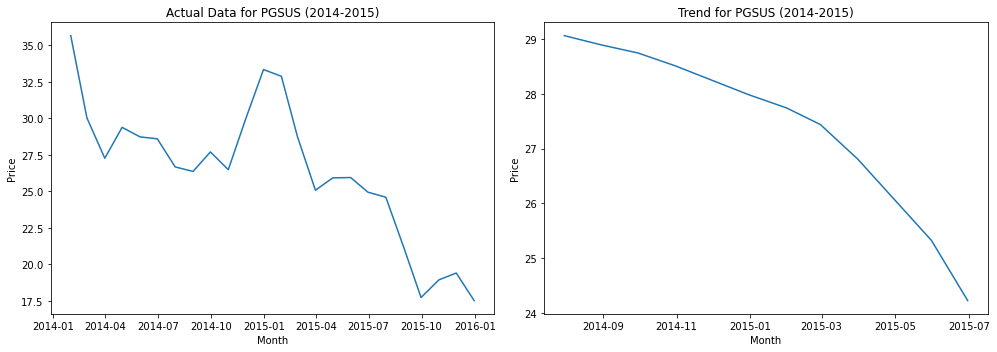

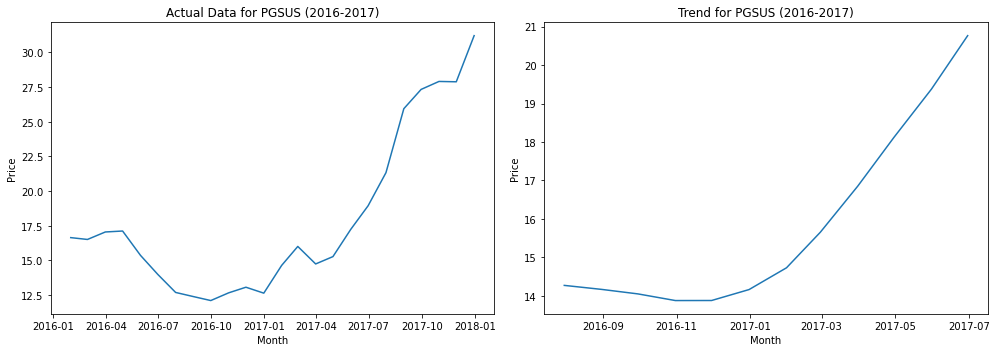

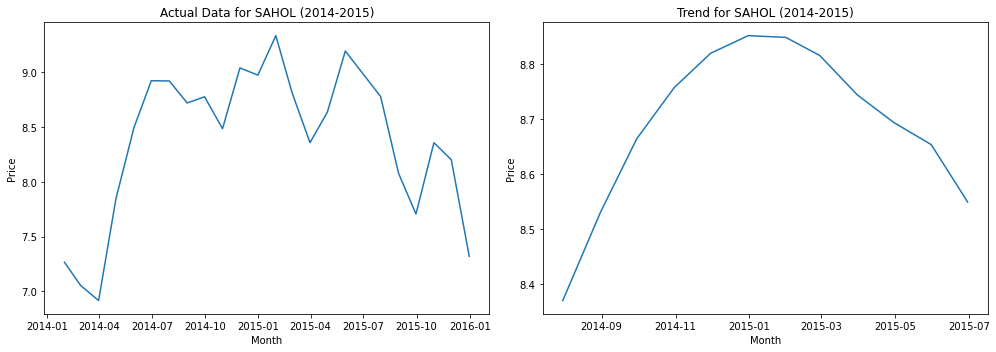

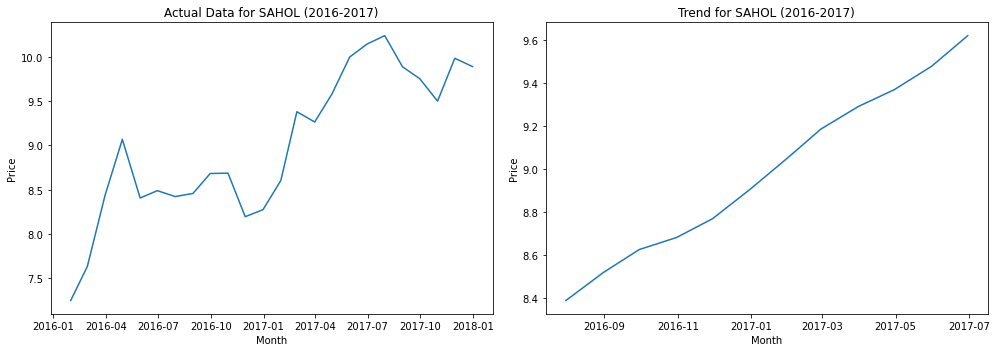

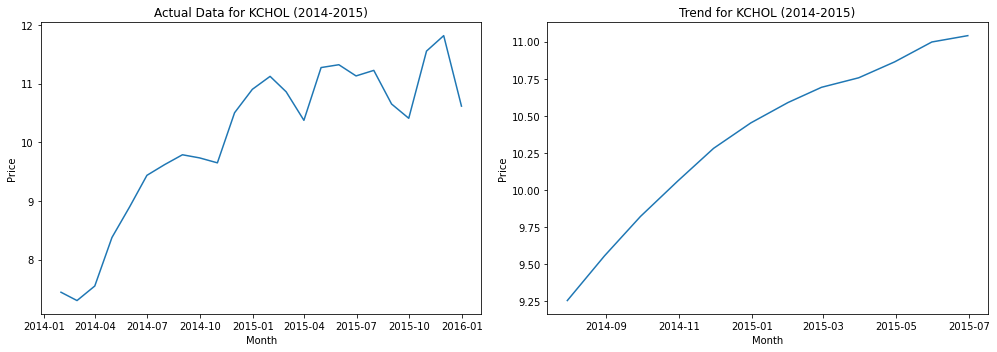

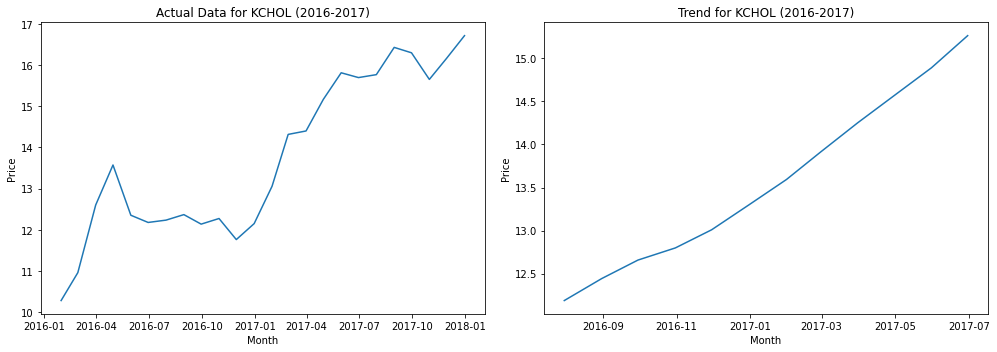

In [27]:
data = pd.read_csv('/Users/mustafacan/Desktop/all_ticks_wide.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Define the list of selected companies and filter the data
selected_companies = ['GARAN', 'AKBNK', 'YKBNK', 'THYAO', 'PGSUS', 'SAHOL', 'KCHOL']
filtered_data = data[['timestamp'] + selected_companies]
filtered_data.set_index('timestamp', inplace=True)

# Filter the data for the date range from the beginning of 2014 to the end of 2017
start_date = '2014-01-01'
end_date = '2017-12-31'
filtered_data = filtered_data[(filtered_data.index >= start_date) & (filtered_data.index <= end_date)]

# Resample the data by month and compute the mean for each month
monthly_data = filtered_data.resample('M').mean()

# Function to perform decomposition and plotting for actual and trend for two-year cycles
def plot_decomposition_two_years(data, company, start_year, end_year):
    for cycle_start in range(start_year, end_year, 2):  # Step by 2 years for each cycle
        cycle_end = cycle_start + 1
        two_year_data = data[f'{cycle_start}':f'{cycle_end}']
        decomposition = seasonal_decompose(two_year_data[company], model='additive')

        # Plot actual data
        plt.figure(figsize=(14, 5))
        plt.subplot(1, 2, 1)
        plt.plot(decomposition.observed)
        plt.title(f'Actual Data for {company} ({cycle_start}-{cycle_end})')
        plt.xlabel('Month')
        plt.ylabel('Price')

        # Plot trend data
        plt.subplot(1, 2, 2)
        plt.plot(decomposition.trend)
        plt.title(f'Trend for {company} ({cycle_start}-{cycle_end})')
        plt.xlabel('Month')
        plt.ylabel('Price')

        plt.tight_layout()
        plt.show()

# Perform decomposition and plot for each company and two-year cycles
companies = ['GARAN', 'AKBNK', 'YKBNK', 'THYAO', 'PGSUS', 'SAHOL', 'KCHOL']
for company in companies:
    plot_decomposition_two_years(monthly_data, company, 2014, 2017)


# OUTLIER DAYS VISUALIZED IN THE PLOT
* This is our last analysis, done because visualization of the outlier in the yearly data helps to comprehend data in addition to time interval analysis

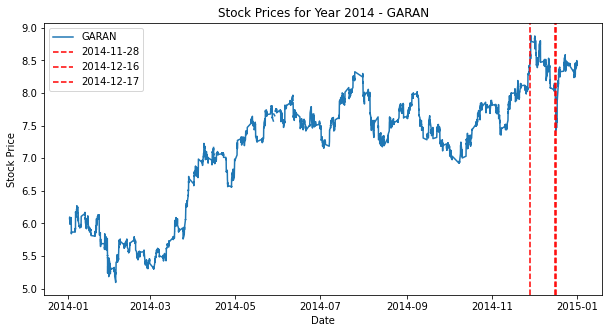

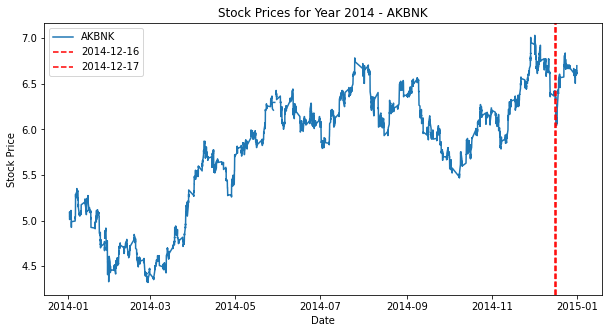

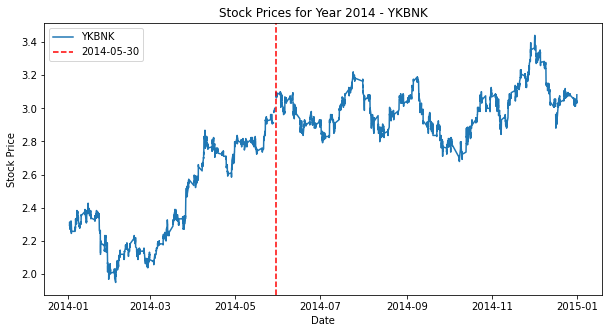

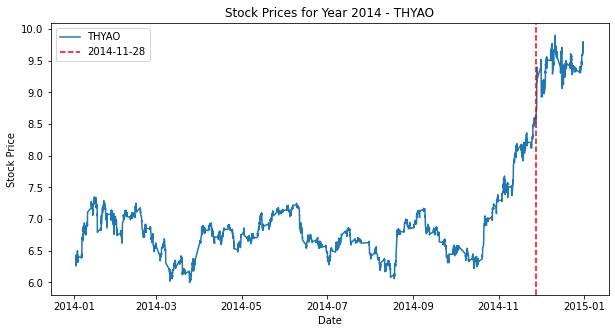

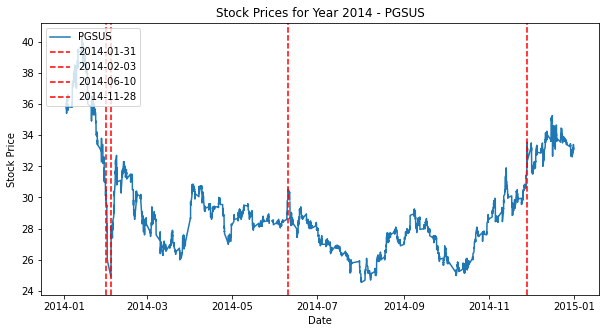

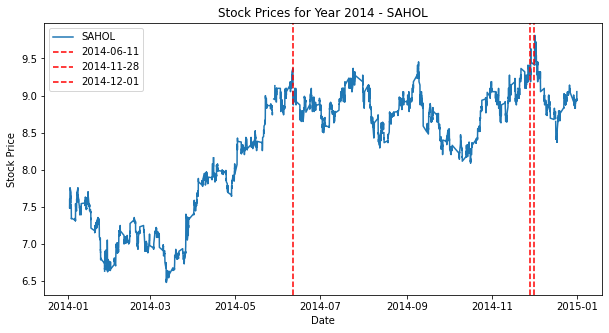

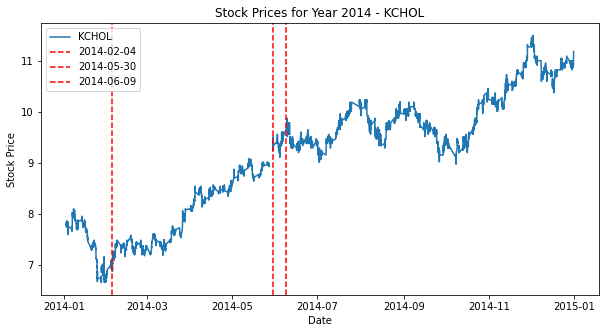

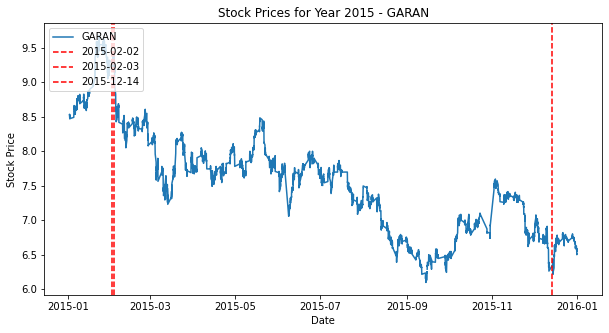

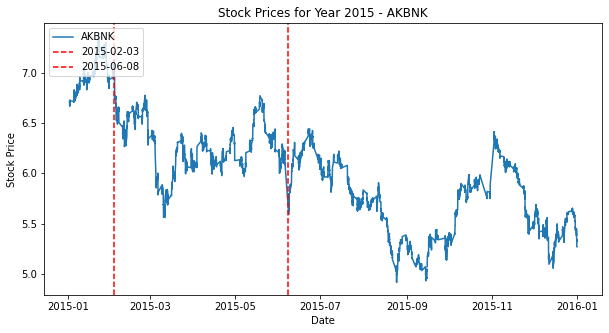

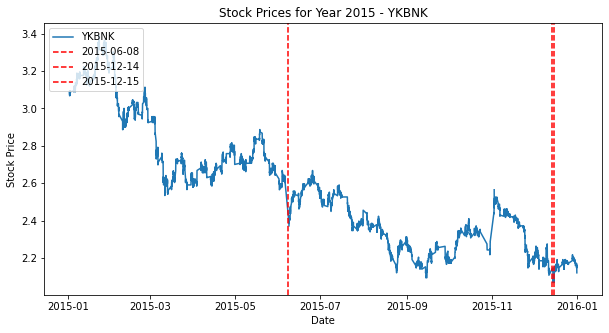

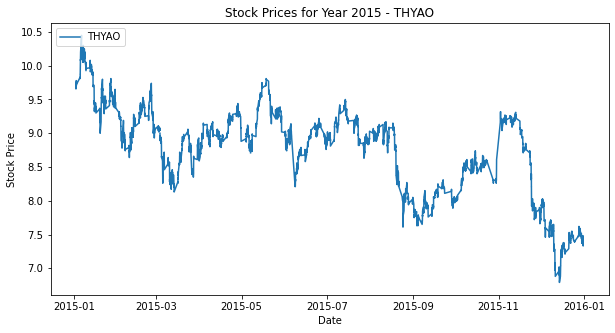

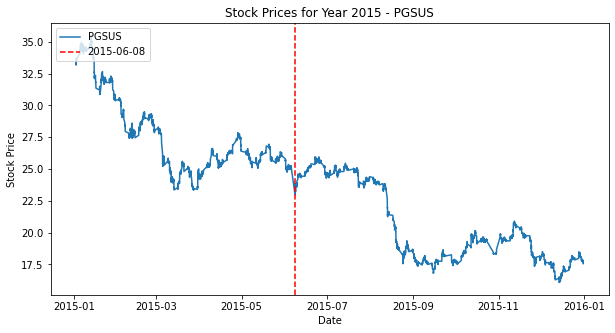

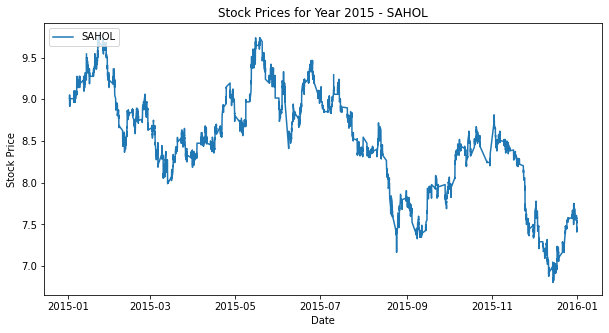

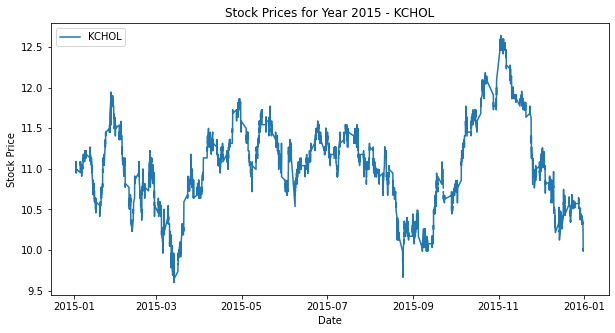

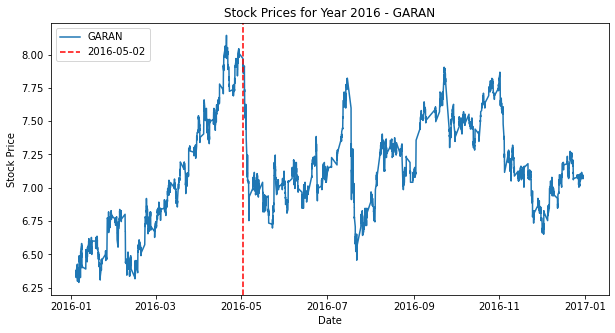

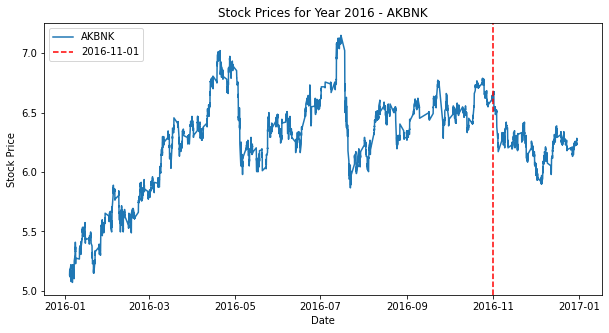

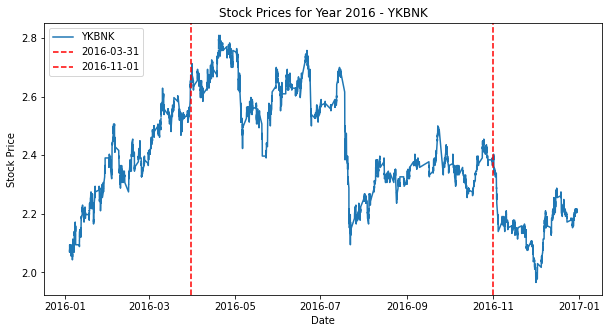

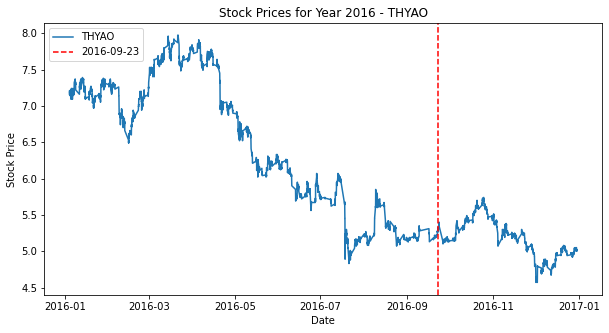

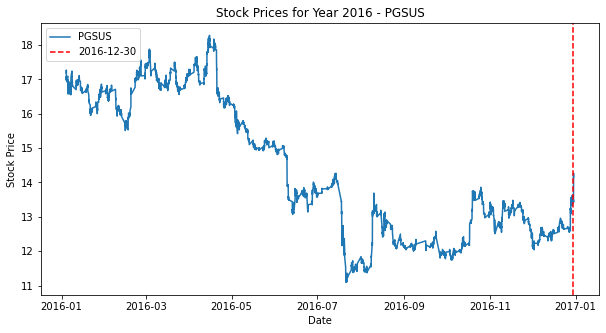

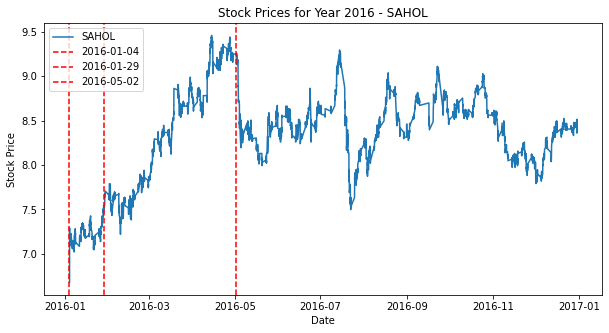

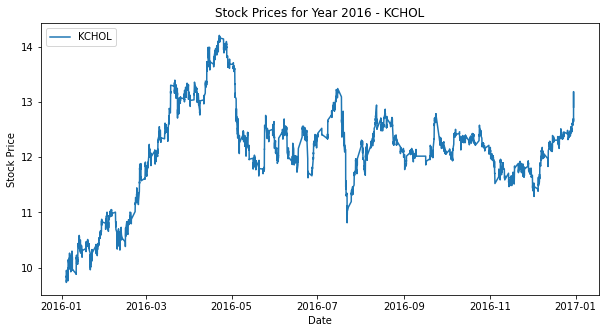

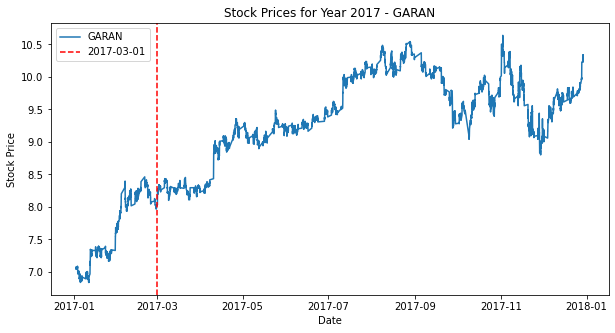

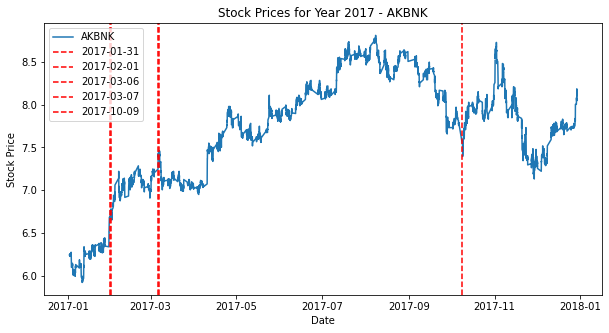

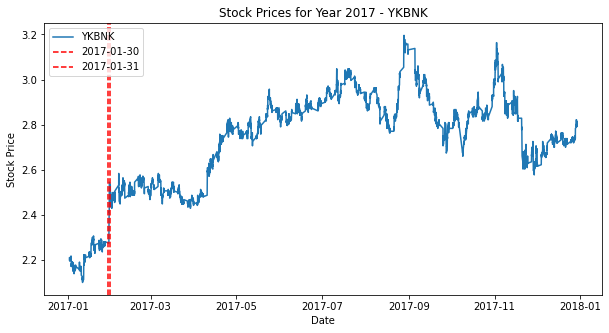

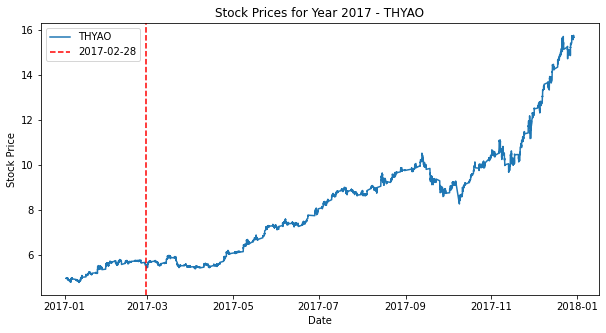

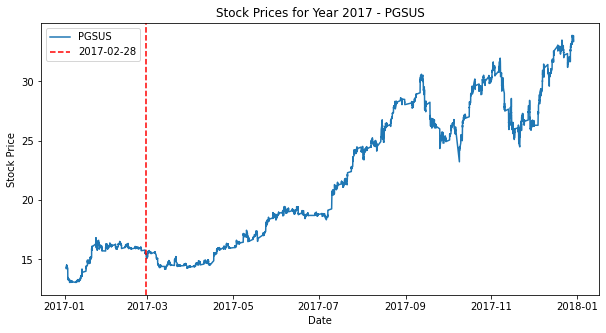

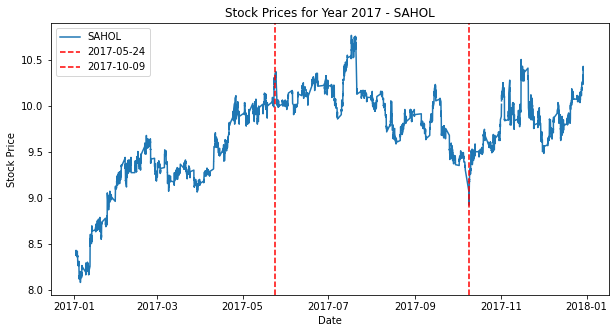

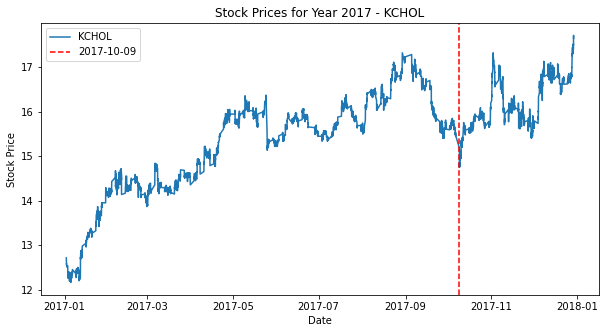

In [24]:
# Load the data
data = pd.read_csv('/Users/mustafacan/Desktop/all_ticks_wide.csv')

# Convert the 'timestamp' column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract year, month, and day from the 'timestamp' column
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour

# Limit the time interval from the beginning of 2014 to the end of 2017
data = data[(data['year'] >= 2014) & (data['year'] <= 2017)]

# List of company columns (excluding the timestamp and the extracted date columns)
companies = ['GARAN', 'AKBNK', 'YKBNK', 'THYAO', 'PGSUS', 'SAHOL', 'KCHOL']

outliers = []

# Iterate through each company
for company in companies:
    # Group by year and month, and calculate mean and standard deviation
    grouped = data.groupby(['year', 'month'])[company].agg(['mean', 'std'])
    
    # Merge the grouped data back to the original dataframe
    merged_data = data.merge(grouped, how='left', on=['year', 'month'])
    
    # Calculate the 3-sigma limits
    merged_data['lower_bound'] = merged_data['mean'] - 3 * merged_data['std']
    merged_data['upper_bound'] = merged_data['mean'] + 3 * merged_data['std']
    
    # Filter rows where the stock data is outside the 3-sigma limits
    outlier_data = merged_data[(merged_data[company] < merged_data['lower_bound']) | 
                               (merged_data[company] > merged_data['upper_bound'])]
    
    # Extract relevant information for the outliers
    for index, row in outlier_data.iterrows():
        outliers.append({
            'company': company,
            'year': row['year'],
            'month': row['month'],
            'day': row['day'],
        })

# Convert the list of outliers to a DataFrame
outliers_df = pd.DataFrame(outliers)
outliers_df = outliers_df.drop_duplicates()

def generate_outlier_dates(stock:str, df):
    lst = []
    for _, row in df.iterrows():
        if row[0] == stock:
            lst.append(f"{row[1]}-{row[2]}-{row[3]}")
            
    return lst

def plot_yearly_stock_prices(df, stock_names, outlier_dates, start_year, end_year):
    # Group the data by year and stock name within the specified range
    for year in range(start_year, end_year + 1):
        if year in df['timestamp'].dt.year.unique():
            year_data = df[df['timestamp'].dt.year == year]
            for stock in stock_names:
                if stock in year_data.columns:
                    stock_data = year_data[['timestamp', stock]]

                    # Create a separate plot for each stock and year
                    plt.figure(figsize=(10, 5))  # Set the figure size

                    # Plot the stock data
                    plt.plot(stock_data['timestamp'], stock_data[stock], label=stock)

                    # Convert outlier dates from strings to datetime objects
                    outlier_dates_stock = [pd.to_datetime(date) for date in outlier_dates[stock_names.index(stock)]]

                    # Add vertical lines at the positions of outlier dates for the current stock
                    for date in outlier_dates_stock:
                        if date.year == year:
                            plt.axvline(date, color='red', linestyle='--', label=date.strftime('%Y-%m-%d'))

                    # Customize the plot
                    plt.title(f'Stock Prices for Year {year} - {stock}')
                    plt.xlabel('Date')
                    plt.ylabel('Stock Price')
                    plt.legend(loc='upper left')

                    # Save or display the plot
                    plt.savefig(f'yearly_stock_prices_{year}_{stock}.png')
                    plt.show()

list = [generate_outlier_dates("GARAN", outliers_df), generate_outlier_dates("AKBNK", outliers_df),
       generate_outlier_dates("YKBNK", outliers_df), generate_outlier_dates("THYAO", outliers_df),
       generate_outlier_dates("PGSUS", outliers_df), generate_outlier_dates("SAHOL", outliers_df),
       generate_outlier_dates("KCHOL", outliers_df)]
                    
plot_yearly_stock_prices(df, ['GARAN', 'AKBNK', 'YKBNK', 'THYAO', 'PGSUS', 'SAHOL', 'KCHOL'], list, 2014, 2017)

# Market Dynamics and News Related to Fluctuations of Stocks

## Airline Industry

### Pegasus

Between 2005 and 2017, Pegasus transitioned to a low-cost network carrier model, prioritizing punctuality, affordability, and a modern fleet. This led to a CAGR of 22% in passenger numbers from 2007 to 2016, outpacing Turkey's 14%. Pegasus became a significant player in Turkey's aviation sector and made noticeable inroads in the European market, especially from 2011 to 2013.

From 2014 to 2017, Google Trends data showed an upward trajectory in searches for 'flight tickets', reflecting Pegasus's growing popularity. Pegasus's low-cost model transformed Turkey's aviation landscape, which had been previously dominated by Turkish Airlines. The airline's approach made air travel more accessible, reshaping its perception from a luxury to an everyday convenience. Despite Turkey's economic challenges, Pegasus sustained growth and profitability.

### 2014 

In 2014, Pegasus' stock price showed distinct variations at three different times: it declined from 27 January to 07 February, surged from 05 June to 13 June, and again surged from 24 November to 03 December. Since it was challenging to find specific news from those older dates, we turned to Google Trends for insights. There, we observed a noticeable uptick in searches for "holiday" and "flight ticket" in June and late November. This aligns with typical vacation planning periods in Turkey, leading to heightened flight bookings. This boosted interest in flights and holidays might have enhanced the company's revenues, leading to a notable rise in its stock prices during those periods. However, in January and February, there was a conspicuous lack of interest in holidays or flight ticket searches, possibly accounting for the dip in Pegasus' stock price during that span.

### Search results for stock names

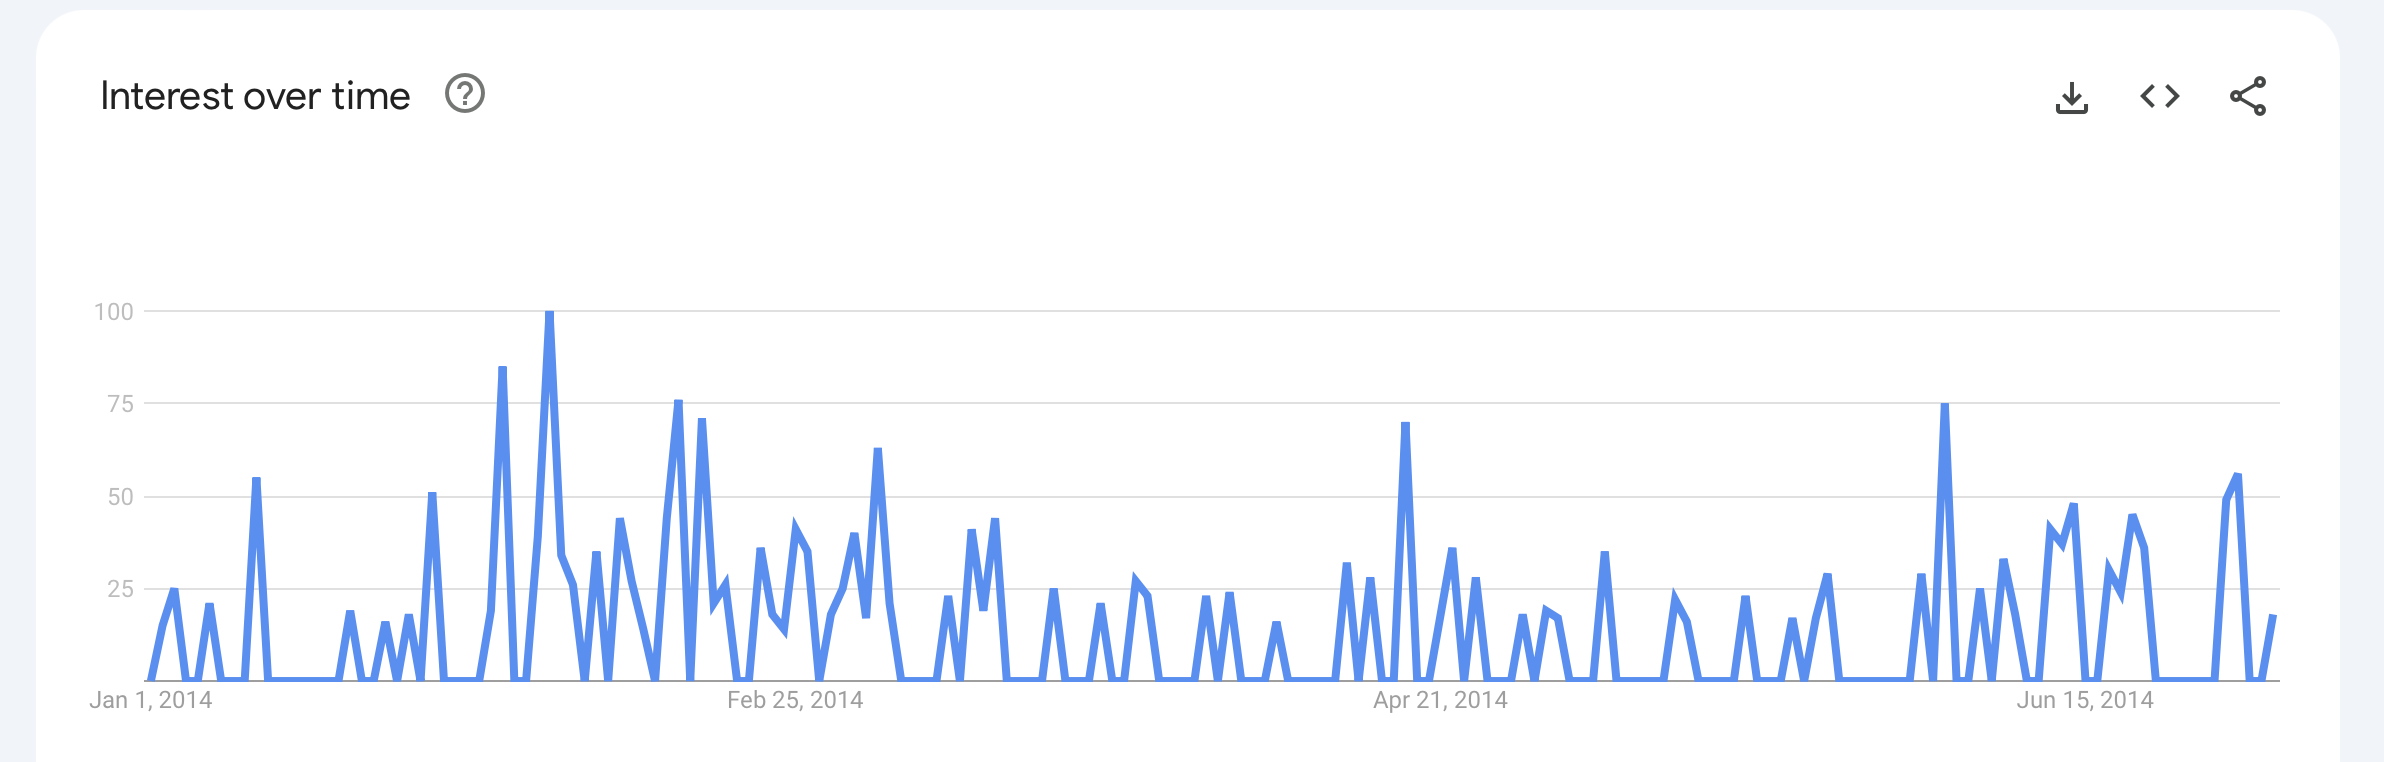

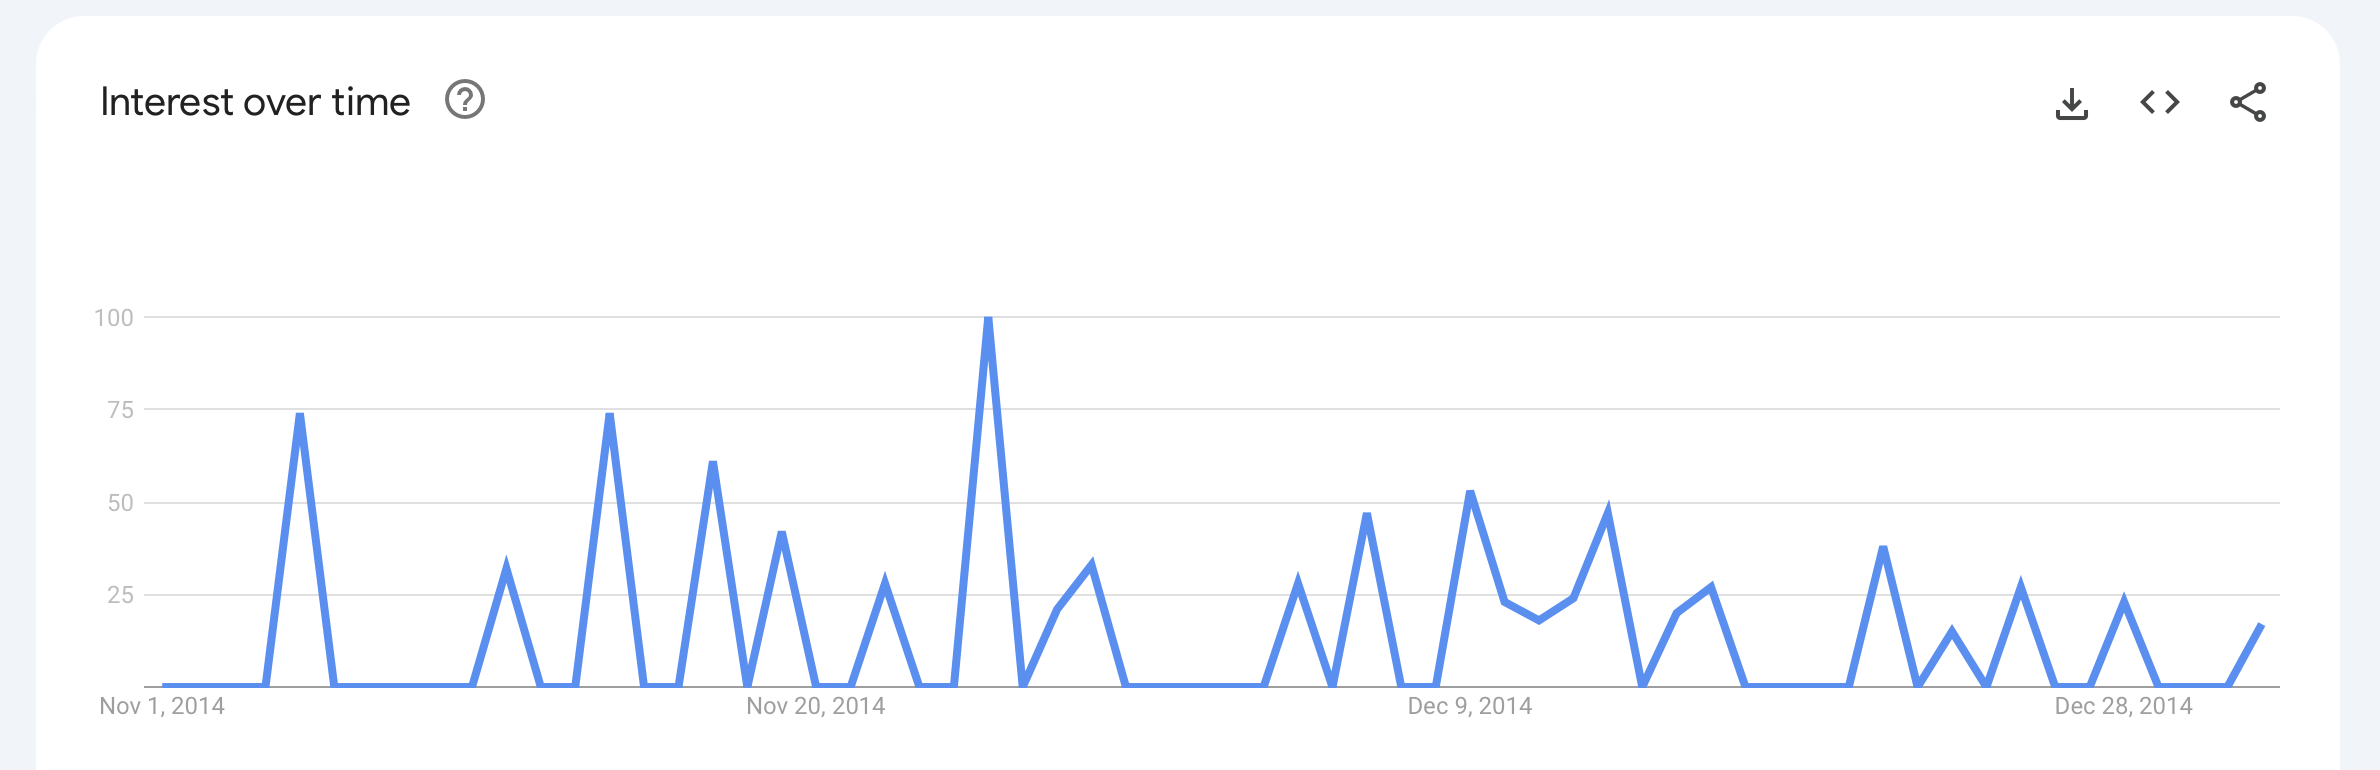

### 3rd June 2015 - 12nd June 2015

In response to the growing instability of the Turkish Lira against the US dollar, Pegasus Hava Taşımacılığı faced significant financial challenges. The Turkish Lira reached a high of 2.8094, marking a 15% decline since the year's start. With 16-17% of Pegasus's revenues being dollar-based and 56% of its expenses indexed to the dollar, the company was under considerable strain. This strain was evident when Pegasus reported a first-quarter loss of 74.3 million lira. To mitigate these losses, Pegasus announced its decision to transition to dollar-indexed pricing for international flights departing from Turkey starting in July. Notably, Turkish Airlines had already made a similar adjustment in May. It can be inferred that the stock price anomalies observed for Pegasus in June might be directly linked to these currency-related challenges and subsequent business decisions.



https://tr.investing.com/news/stock-market-news/pegasus-temmuzda-turkiye-cksl-ds-hat-ucuslarnda-dolara-endeksli-fiyat-uygulamasna-gececekkaynak-62237



### Search names for stock names

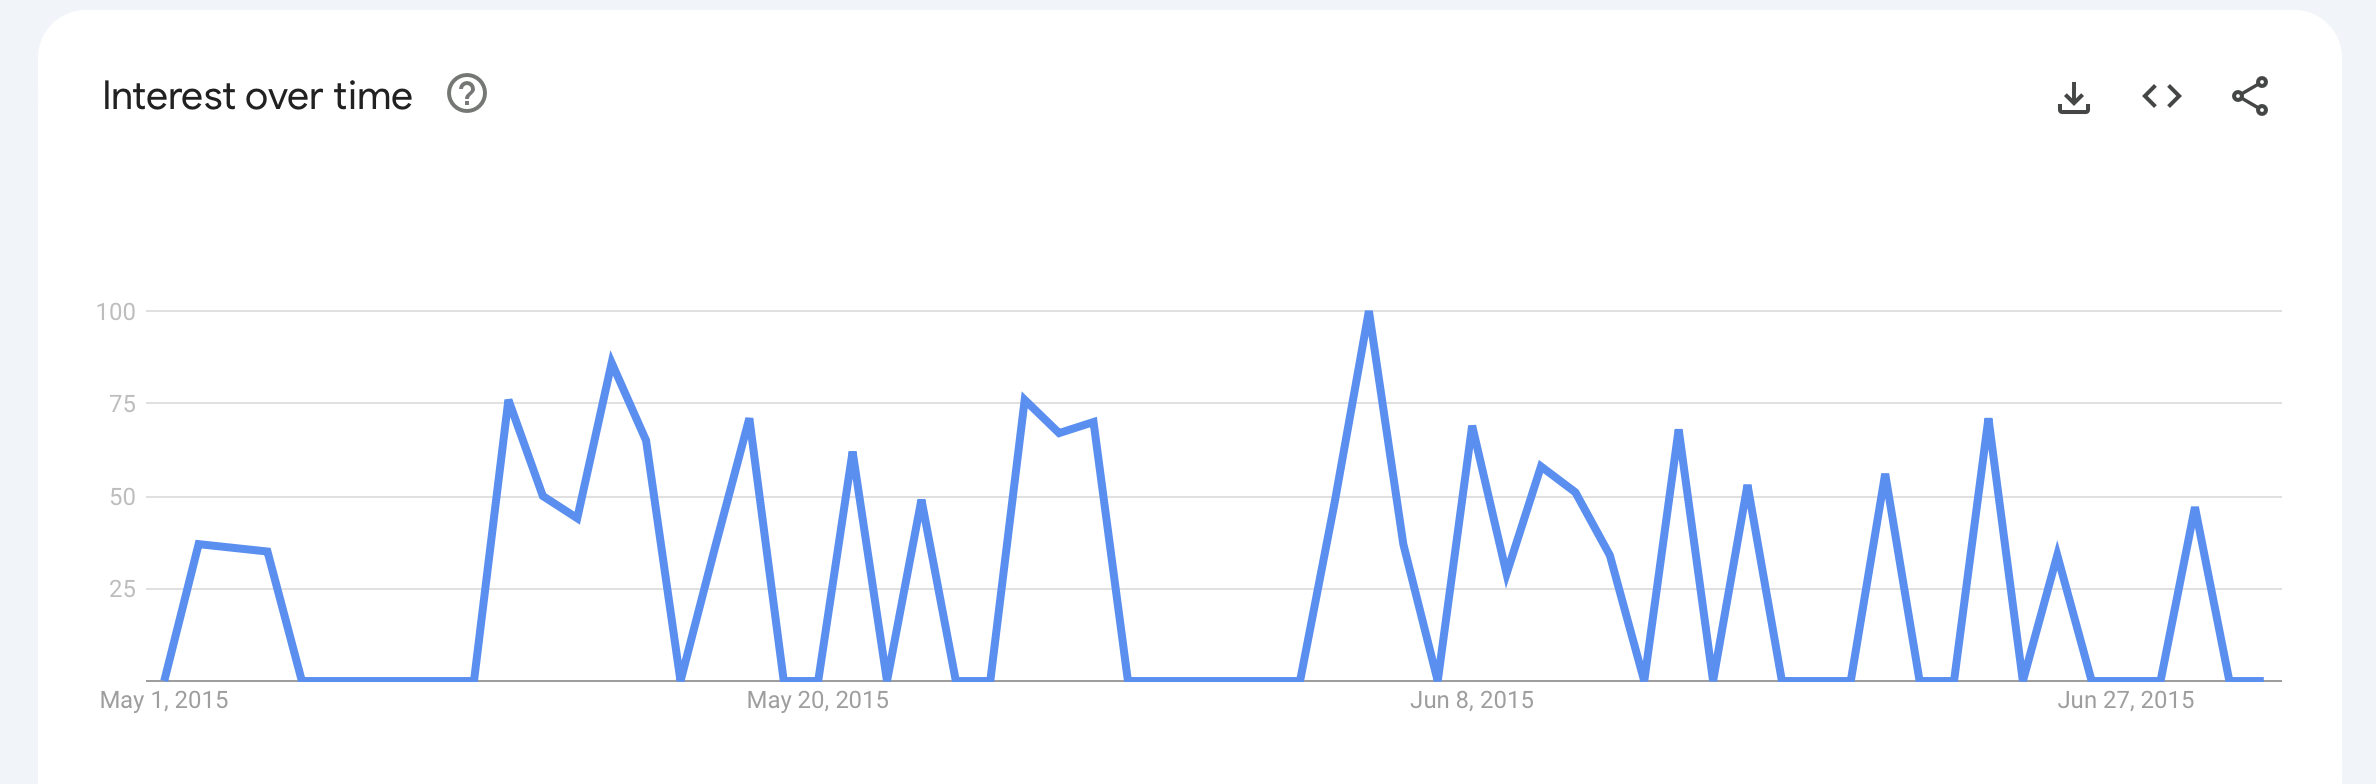

### 26th December 2016 - 4th January 2017

In the closing days of December 2016 and the start of January 2017, we notice an unusual spike in the stock performance of Pegasus Hava Taşımacılığı. Given that 2016 was a challenging year for Turkey, with major events like the military coup shaking the financial markets, the story of Pegasus stands out. In December, the airline said its number of passengers grew by 6.9%, reaching a total of 1.92 million compared to the same month in the previous year. This upward trend was seen throughout the year, with an annual increase of 8.1% bringing the total to 24.14 million passengers. The percentage of filled seats in December also went up by 0.97%, hitting 78.3%, though the yearly average had a small decrease.


However, when looking at the financial side, there's a different picture. Pegasus reported a loss of 133.7 million lira in 2016, a change from its profit of 113.1 million lira in 2015. But even with this loss, the airline's total income in 2016 grew by about 6%, reaching 3.7 billion lira. With an eye to the future, Pegasus has set clear goals for 2017, aiming for a 5-7% increase in passengers and hoping for a financial performance rate (EBITDAR) of 15-16%. They also plan to expand their service by 6-8% and hope to fill more seats on both local and international flights by 1-2%.

What's worth noting is that even though many Turkish companies saw their stock values drop in 2016, Pegasus made a strong comeback at the year's end. This growth, even during tough times, speaks to the airline's smart choices and its ability to adjust in a time of change, especially considering the many political and financial challenges Turkey faced that year.

23 February 2017 - 03 March 2017

In late February to early March 2017, Pegasus experienced an unexpected drop in its stock price. Parallel to this, the BIST 100 index, which reflects the performance of Turkey's top 100 companies, also exhibited distinct trends, suggesting a broader economic sentiment influencing the Turkish stock market. It's likely that Pegasus' stock decline wasn't just due to internal company dynamics but was also affected by these larger market fluctuations. The aviation sector, to which Pegasus belongs, is particularly sensitive to elements like fuel prices, currency shifts, and geopolitical tensions. If during this time there were any adverse economic or geopolitical events, they might have influenced both the broader market and Pegasus' stock performance. Therefore, understanding Pegasus' stock movement necessitates a holistic view that includes both company-specific and wider market dynamics during the period.

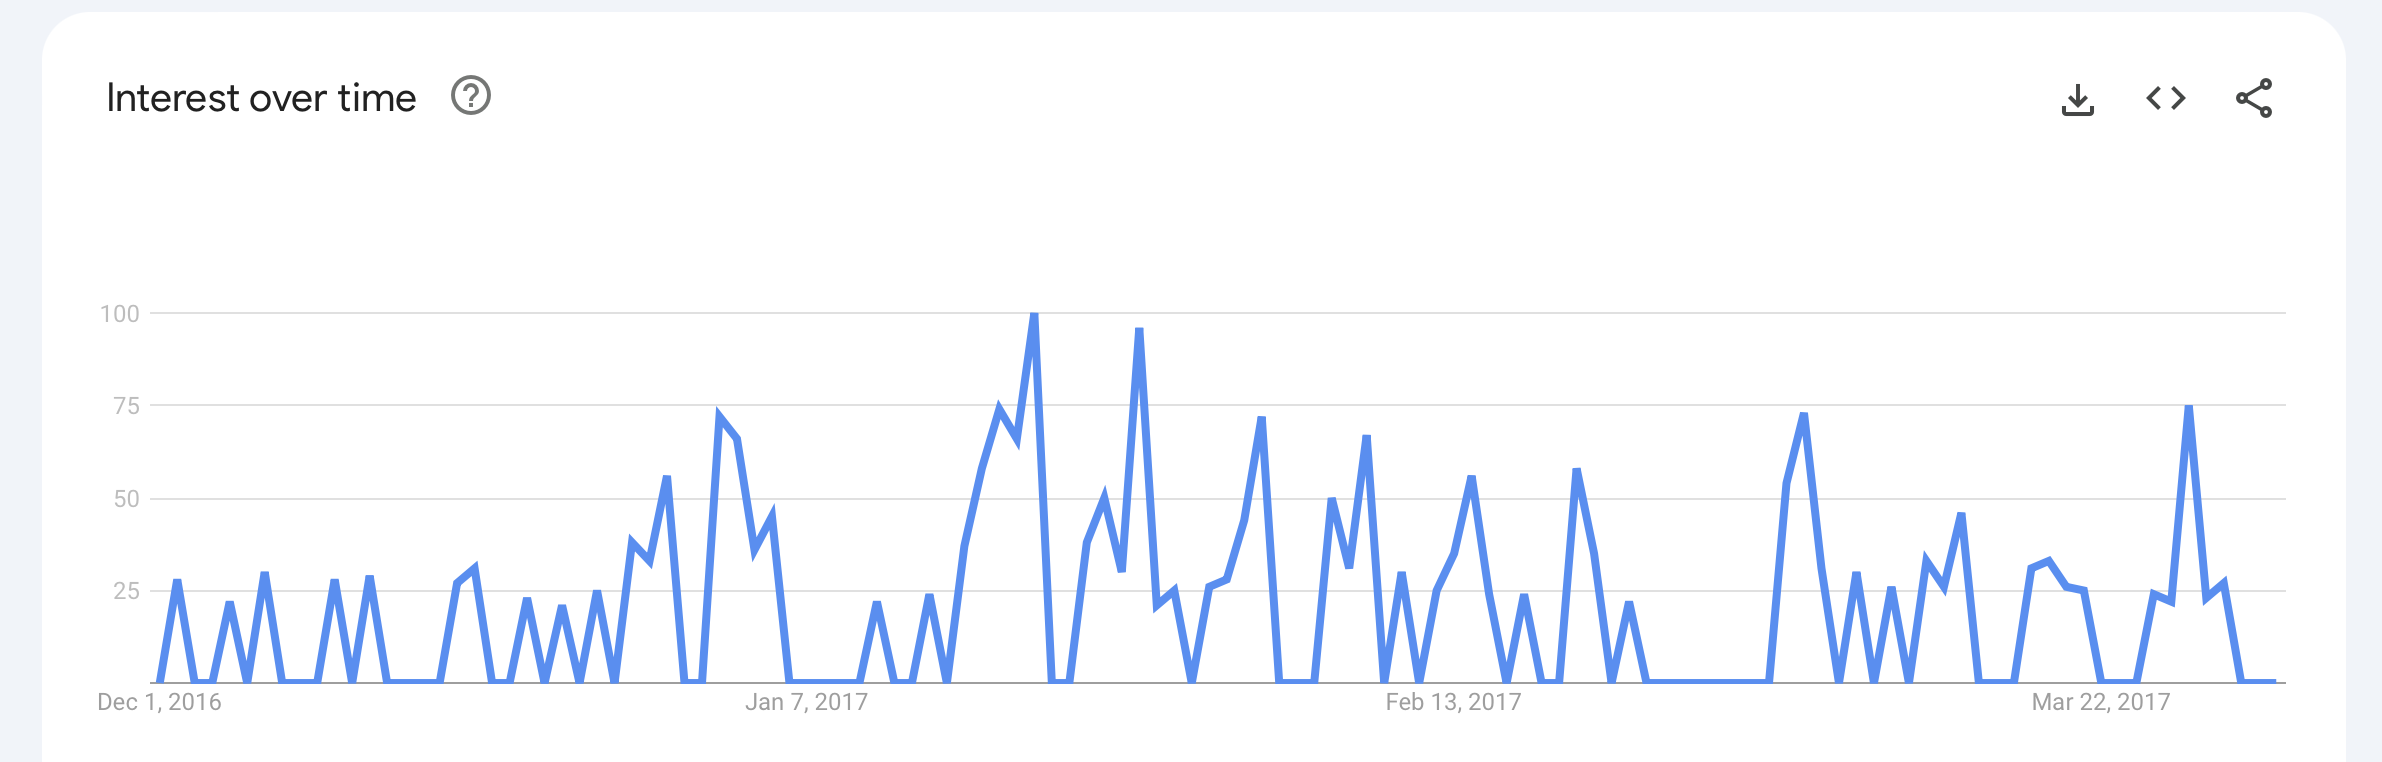

https://tr.investing.com/news/stock-market-news/pegasusun-aralk-ay-yolcu-says-69-artsla-192-mln-kisi-oldu-2016da-81-artt-122960
https://tr.investing.com/news/stock-market-news/pegasus-2016da-1337-mln-tl-zarar-etti-2017de-57-yolcu-buyumesi-hedefliyor-127946



### Turkish Airlines

From 2014 to 2017, Turkey faced significant socio-political challenges, from an attempted coup to economic fluctuations, directly impacting sectors like tourism. As the country's flagship carrier, Turkish Airlines (THY) was inevitably influenced by these shifts. The airline's stock prices responded not just to the aviation industry's general trends but also mirrored Turkey's broader socio-economic conditions. During these years, concerns over national stability and safety, coupled with economic challenges, likely played a part in shaping THY's financial performance and stock valuations.

### 24th November 2014 - 03rd December 2014

In 2014, Turkish Airlines' stock price also exhibited a notable surge towards the end of November. Analyzing this in tandem with data from Google Trends, there was a clear spike in searches related to "holiday" and "flight ticket" during this period. Such an increase in online search behavior often mirrors a broader consumer trend, indicating that many were planning vacations or trips at this time. Given Turkish Airlines' prominence as a major carrier, it's plausible that the airline experienced a significant boost in bookings. Consequently, the increased demand for flights might have positively influenced investors' perceptions and expectations, leading to the observed rise in the airline's stock price at the end of November 2014.

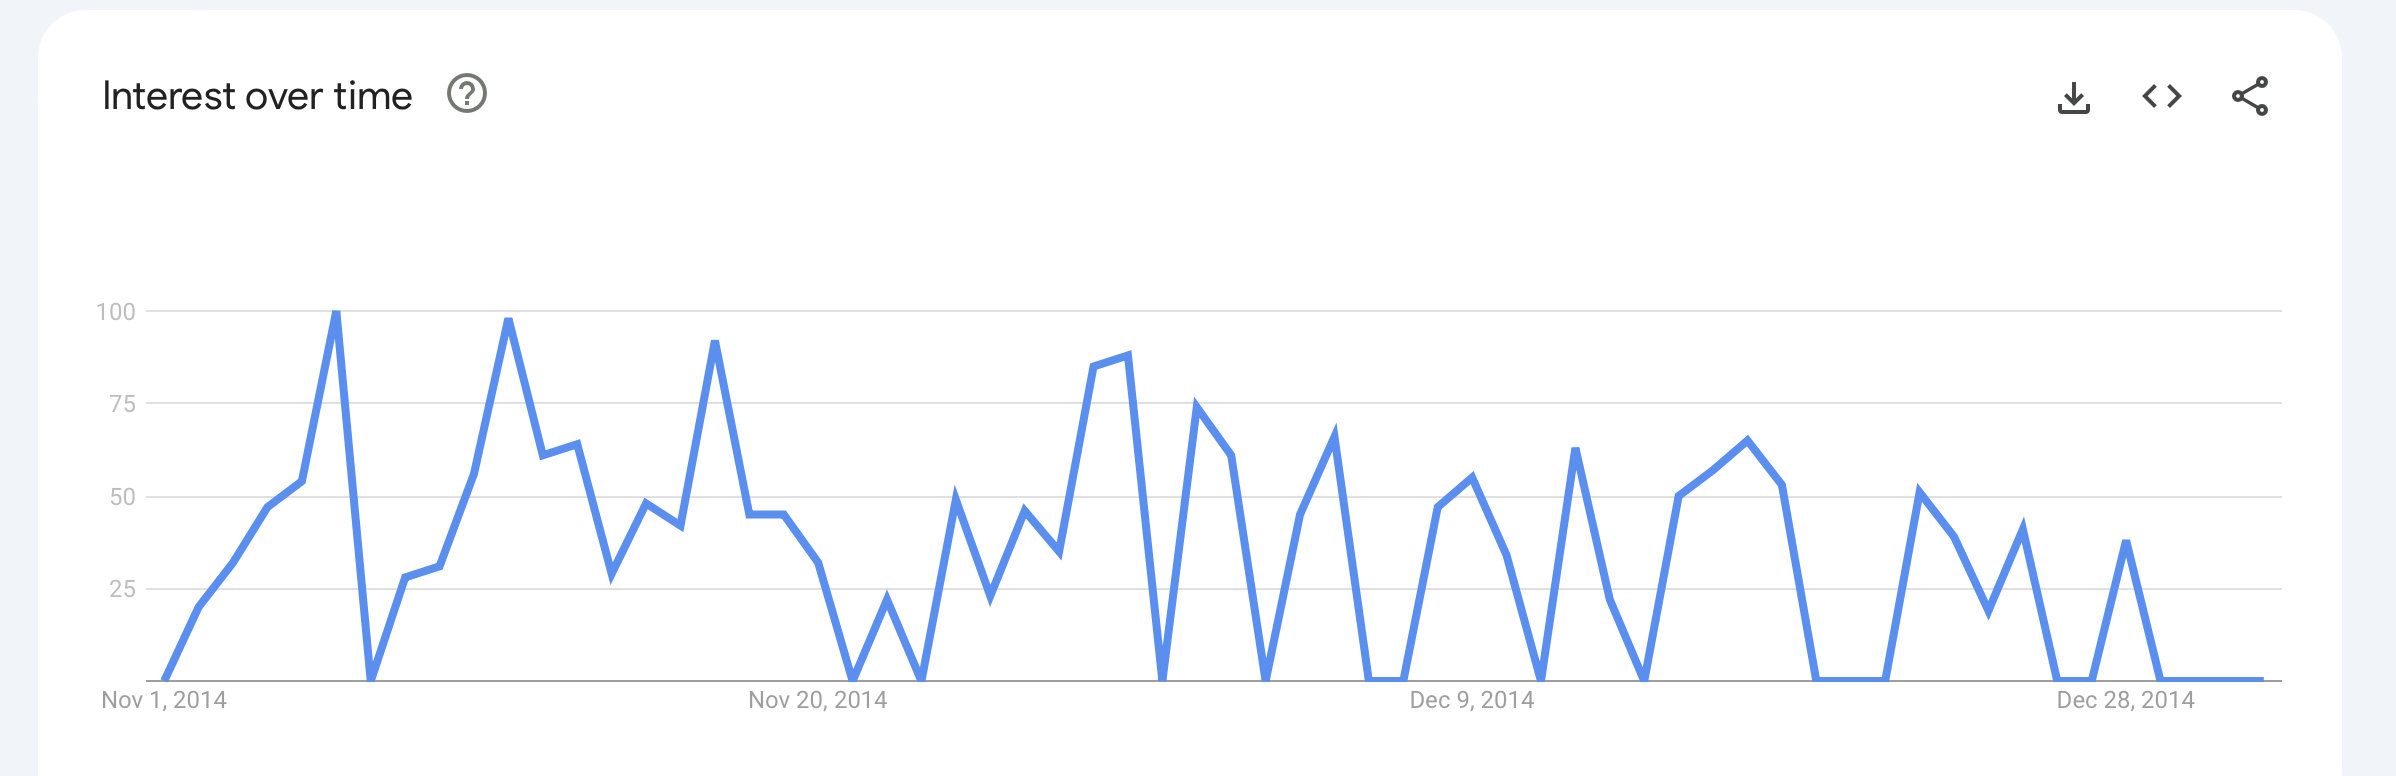

### 19th September 2016 - 28th September 2016

https://tr.investing.com/news/stock-market-news/turk-hava-yollarayc-euroleuge-sponsorlugunun-geri-donusu-cok-yuksek-112073


In September 2016, a notable uptick in Turkish Airlines' stock price can be attributed to its enhanced partnership with the THY Euroleague. M. İlker Aycı, the Chairman of Turkish Airlines, announced Istanbul as the host for the 2017 THY Euroleague Final Four, symbolizing the airline's strengthened connection to European basketball. This alliance proved lucrative, as evidenced by a rise in media return from 63 million euros in 2011 to over 140 million euros in 2015. Additionally, a 95% brand recall rate among Euroleague followers emphasizes the sponsorship's value. Given these factors, the Euroleague association justifiably explains the significant surge in Turkish Airlines' stock during this period.

### 25th November 2016 - 05th December 2016

In November 2016, the stock price of Turkish Airlines (THY) exhibited significant outliers below the 3-sigma limit, denoting a distinct deviation from the norm. This anomaly can be directly correlated with the airline's financial report for the third quarter (Q3) of 2016. As reported by Reuters on 10th November, THY's net profit for the third quarter plummeted by 59%, amounting to 548 million lira. Moreover, their Q3 revenue also saw a decline of about 7%, settling at 8.7 billion lira. These unfavorable financial outcomes justify the stark decrease in stock price, and its position as an outlier beyond the 3-sigma threshold during that period.

### 23rd February 2017 - 03rd March 2017

In February 2016, Turkish Airlines (THY) stock displayed pronounced outliers below the 3-sigma limits. This can be tied to THY's January-February traffic results, where they reported a 10.4% reduction in passengers, totaling 8.2 million. The data indicated more pronounced reductions in international flights (14.3%) compared to domestic ones (5.4%). Although cargo operations grew by 10.3%, the significant dip in passenger numbers likely impacted investor sentiment, leading to the observed stock price anomalies.

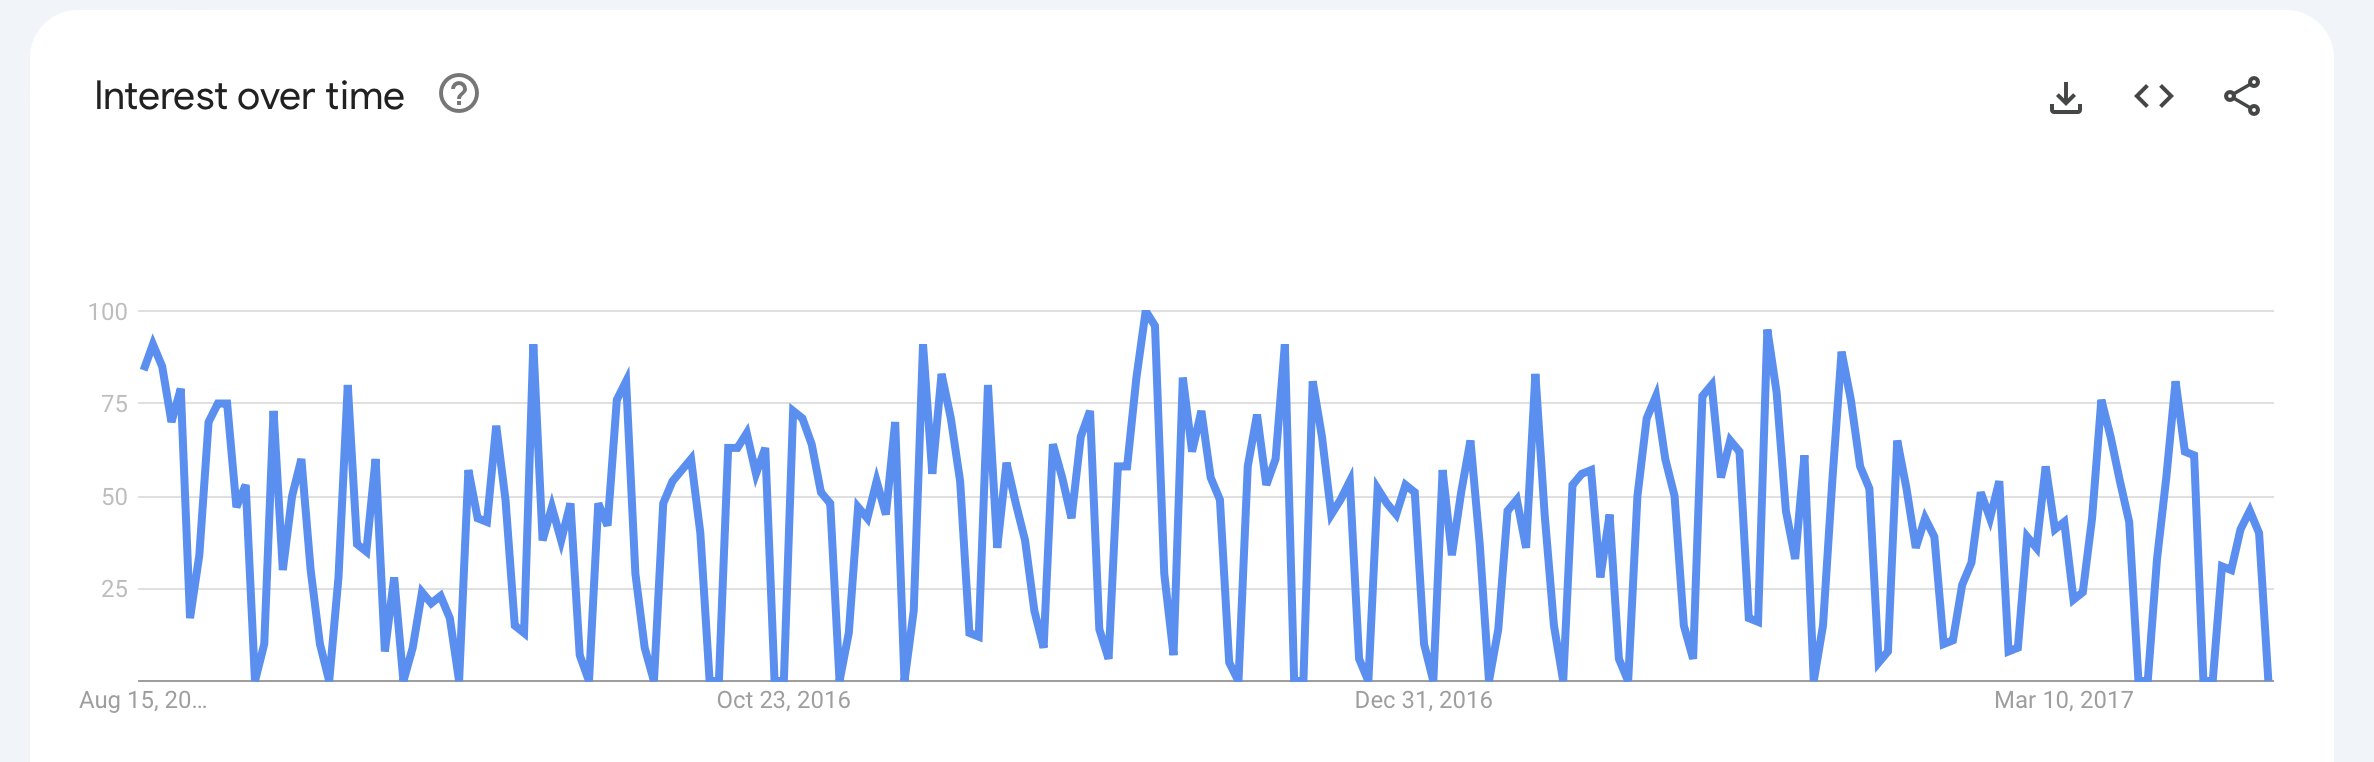

## Financial Services

### Garanti

Between 2014 and 2017, Turkey grappled with a multitude of socio-political upheavals, affecting major financial institutions, including Garanti Bank. As one of Turkey's leading private banks, Garanti's stock performance was sensitive to shifts in the Turkish economy and its geopolitical circumstances. The economic challenges, fluctuating currency rates, and political uncertainties, such as the attempted coup in 2016, likely had a ripple effect on investor confidence, impacting the banking sector and, by extension, Garanti Bank's stock valuations

### 24 November 2014 - 03 December 2014 & 11 December 2014 & 22 December 2014

BBVA has expanded its stake in the Turkish financial sector by acquiring an additional 14.89% of T. Garanti Bankası A.Ş. from Doğuş Group for TL 5.497 billion, or TL 8.79 per share. Post-transaction, Doğuş Group's stake in Garanti Bank will decrease to 10%. The deal also allows Doğuş to receive an extra dividend of up to TL 0.11 per share for 2014.

The transaction had waited approval from relevant regulatory authorities, after which the amended Shareholders Agreement will come into effect. This agreement restructures Garanti Bank's Board of Directors to include 10 members, with 7 nominated by BBVA, 2 by Doğuş Group, and 1 independent member jointly nominated. Concurrently, BBVA's option to acquire an additional 1% from Doğuş Group has been terminated.

This could indicate investor concern about the implications of the deal. The market may have perceived the transaction price as too high or may be apprehensive about the potential for regulatory challenges. Additionally, current shareholders might be worried about the dilution of their holdings or skeptical about the strategic direction of the bank post-transaction.

The decline in stock value could also reflect broader market concerns about the Turkish economy or the banking sector specifically. Investors might be reacting to what the sale signifies about Doğuş Group's confidence in Garanti Bank's future, or they may be cautious about BBVA's increasing influence in the bank.

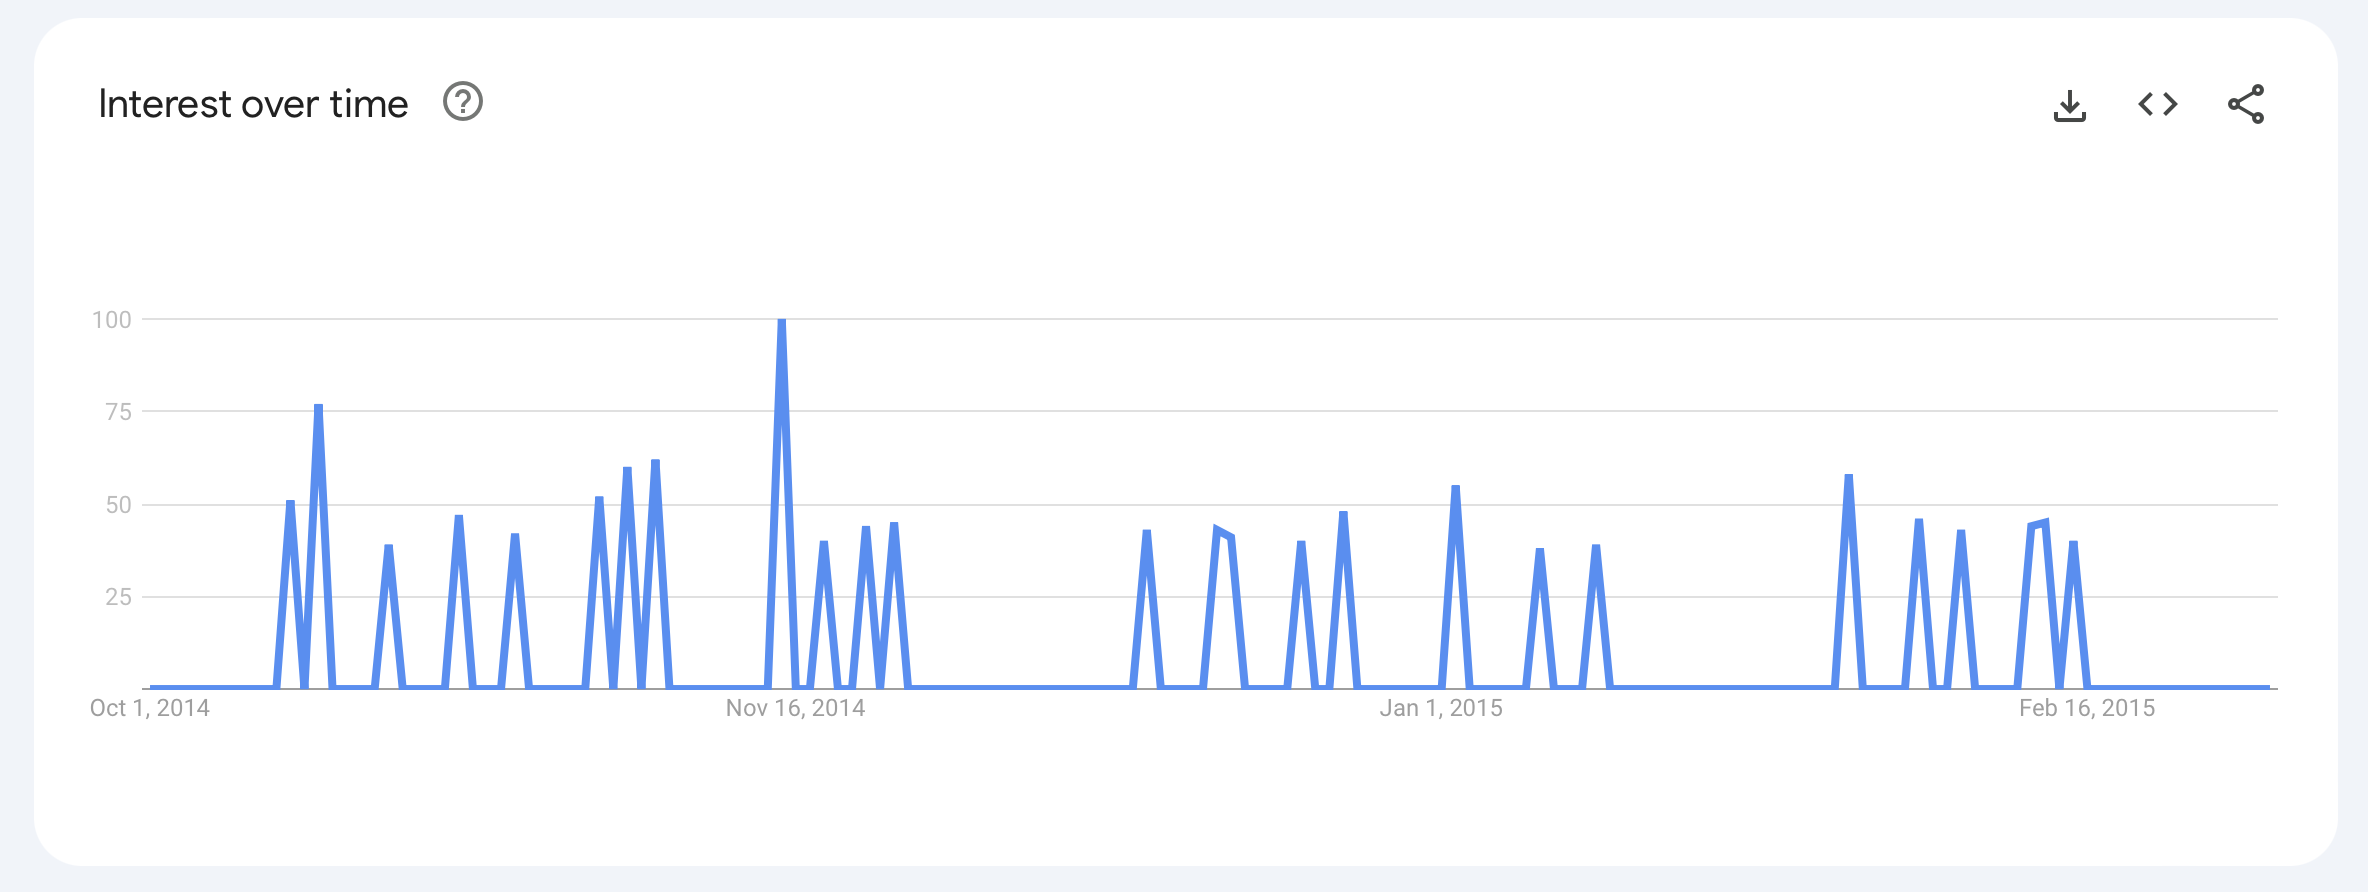

### 09 December 2015 - 18 December 2015

In December 2015, a notable drop in Garanti Bank's stock price was observed, registering beyond the 3 sigma limits. This decline was possibly influenced by geopolitical tensions between Turkey and Russia, specifically Turkey's decision to shoot down a Russian jet near the Syrian border. In response, Russia imposed various economic sanctions on Turkey, impacting multiple sectors. Although a subsequent announcement clarified that Russian sanctions would not target Turkish banks operating in Russia, the prevailing uncertainty likely affected investor sentiment. Garanti Bank, with its subsidiary Garanti Bank Moscow operating in Russia, would have been under close investor scrutiny, leading to the stock price anomaly.

### 27 April 2016 - 06 May 2016

In April 2016, Garanti Bank's stock price exhibited a positive surge, potentially influenced by the bank's Q1 financial performance. The bank reported a net profit of 1.04 billion lira, marking a 20.6% increase compared to the same period in the previous year. This performance exceeded the expectations of experts who had predicted a net profit of 939 million lira. Furthermore, the bank's credits and receivables saw a 3% increase to 164 billion lira from the end of the previous year. The optimistic financial results and the decision to authorize banks for a 367-day syndicated loan could have bolstered investor confidence, contributing to the stock price appreciation.

https://tr.investing.com/news/stock-market-news/garanti-bankasnn-net-kar-q1de-206-artsla-104-mlyr-tl-oldu-beklentileri-ast-98532

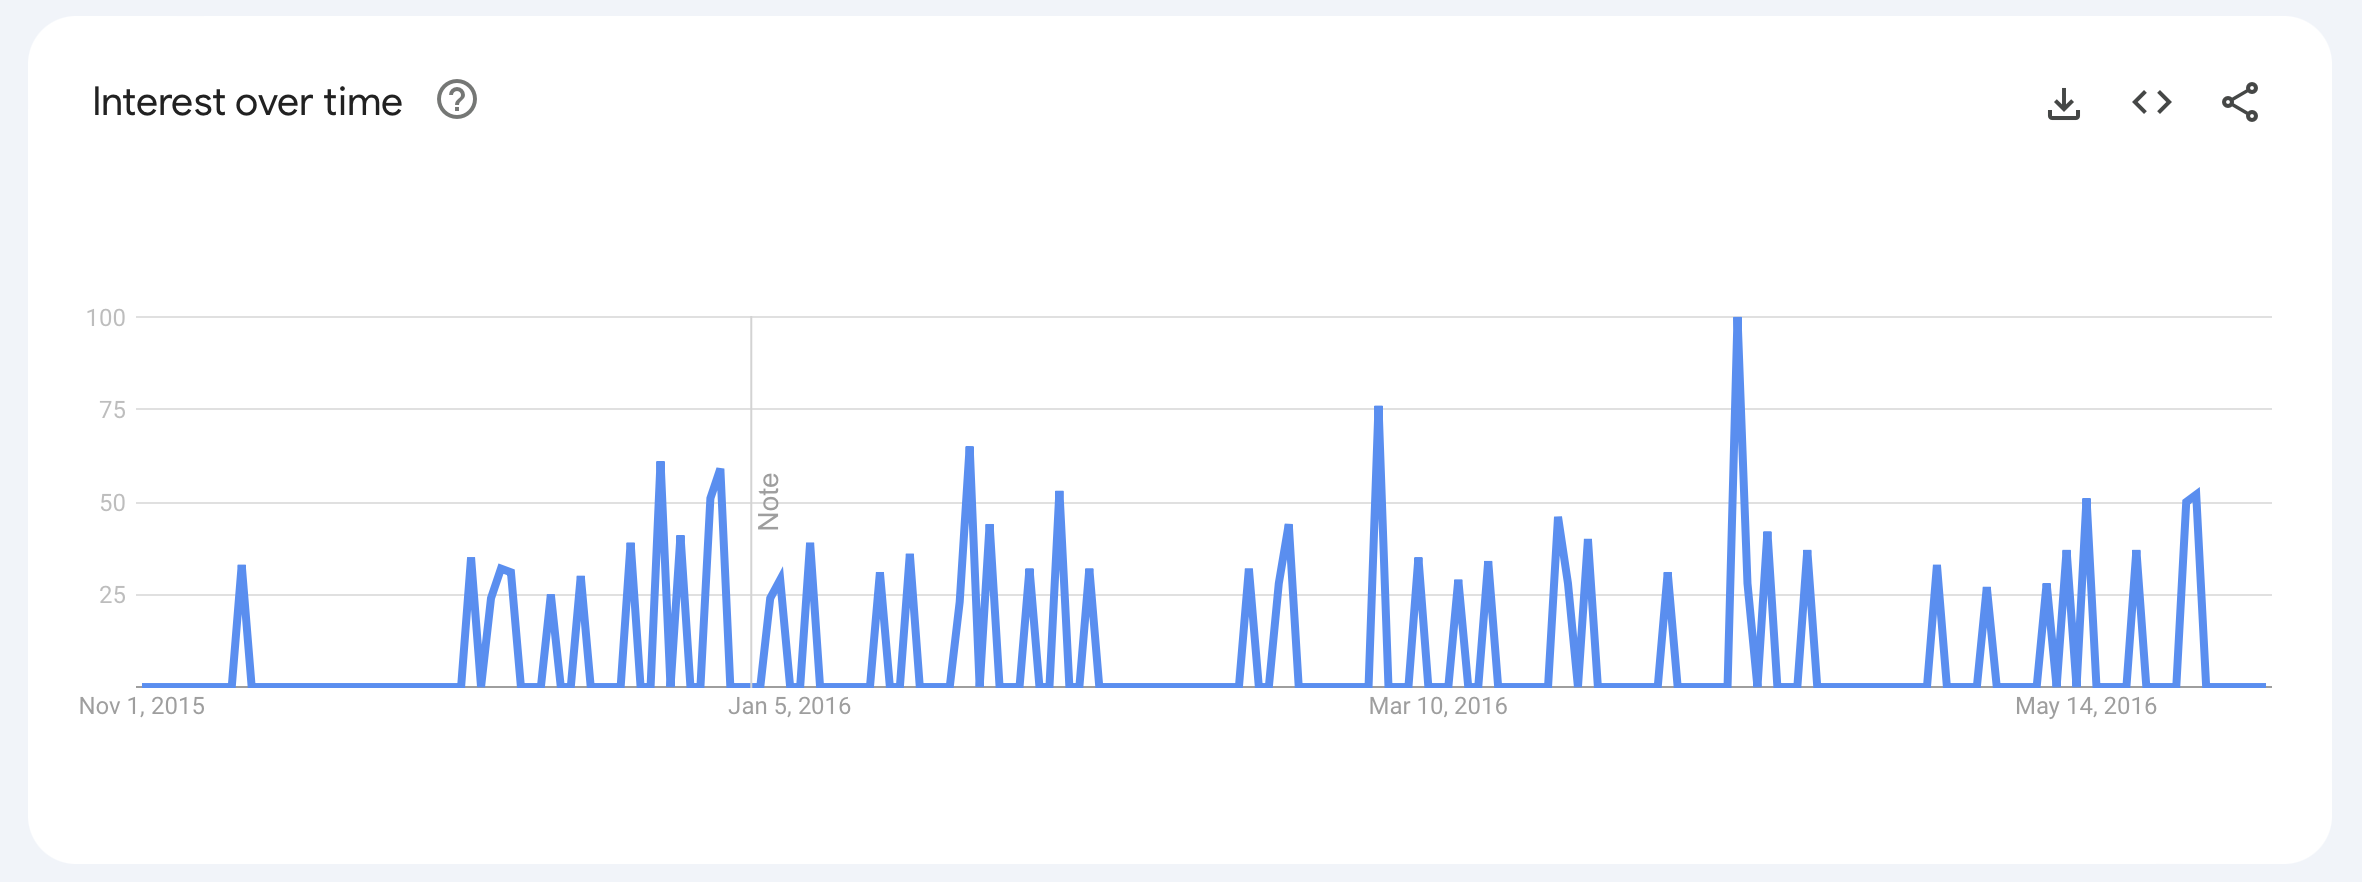


### 24 February 2017 - 06 March 2017

In February 2017, a noteworthy observation was made regarding Garanti Bank's stock price, which deviated significantly from its usual trend. This deviation fell outside the three-sigma limit, indicating an atypical performance in comparison to its historical data.

During this period, when examining the BIST 100 index — a benchmark indicating the overall performance of Turkey's stock market — there was also noticeable instability. 

Upon closer examination, it's evident that the decline in Garanti Bank's stock had a relationship with the BIST 100's performance. As one of the prominent entities within the index, fluctuations in Garanti's stock can both influence and be influenced by broader market trends. In this instance, the downturn in Garanti Bank's stock might have been both a contributor to and a result of the broader unease in the Turkish stock market, as reflected by the BIST 100's performance during the same period.

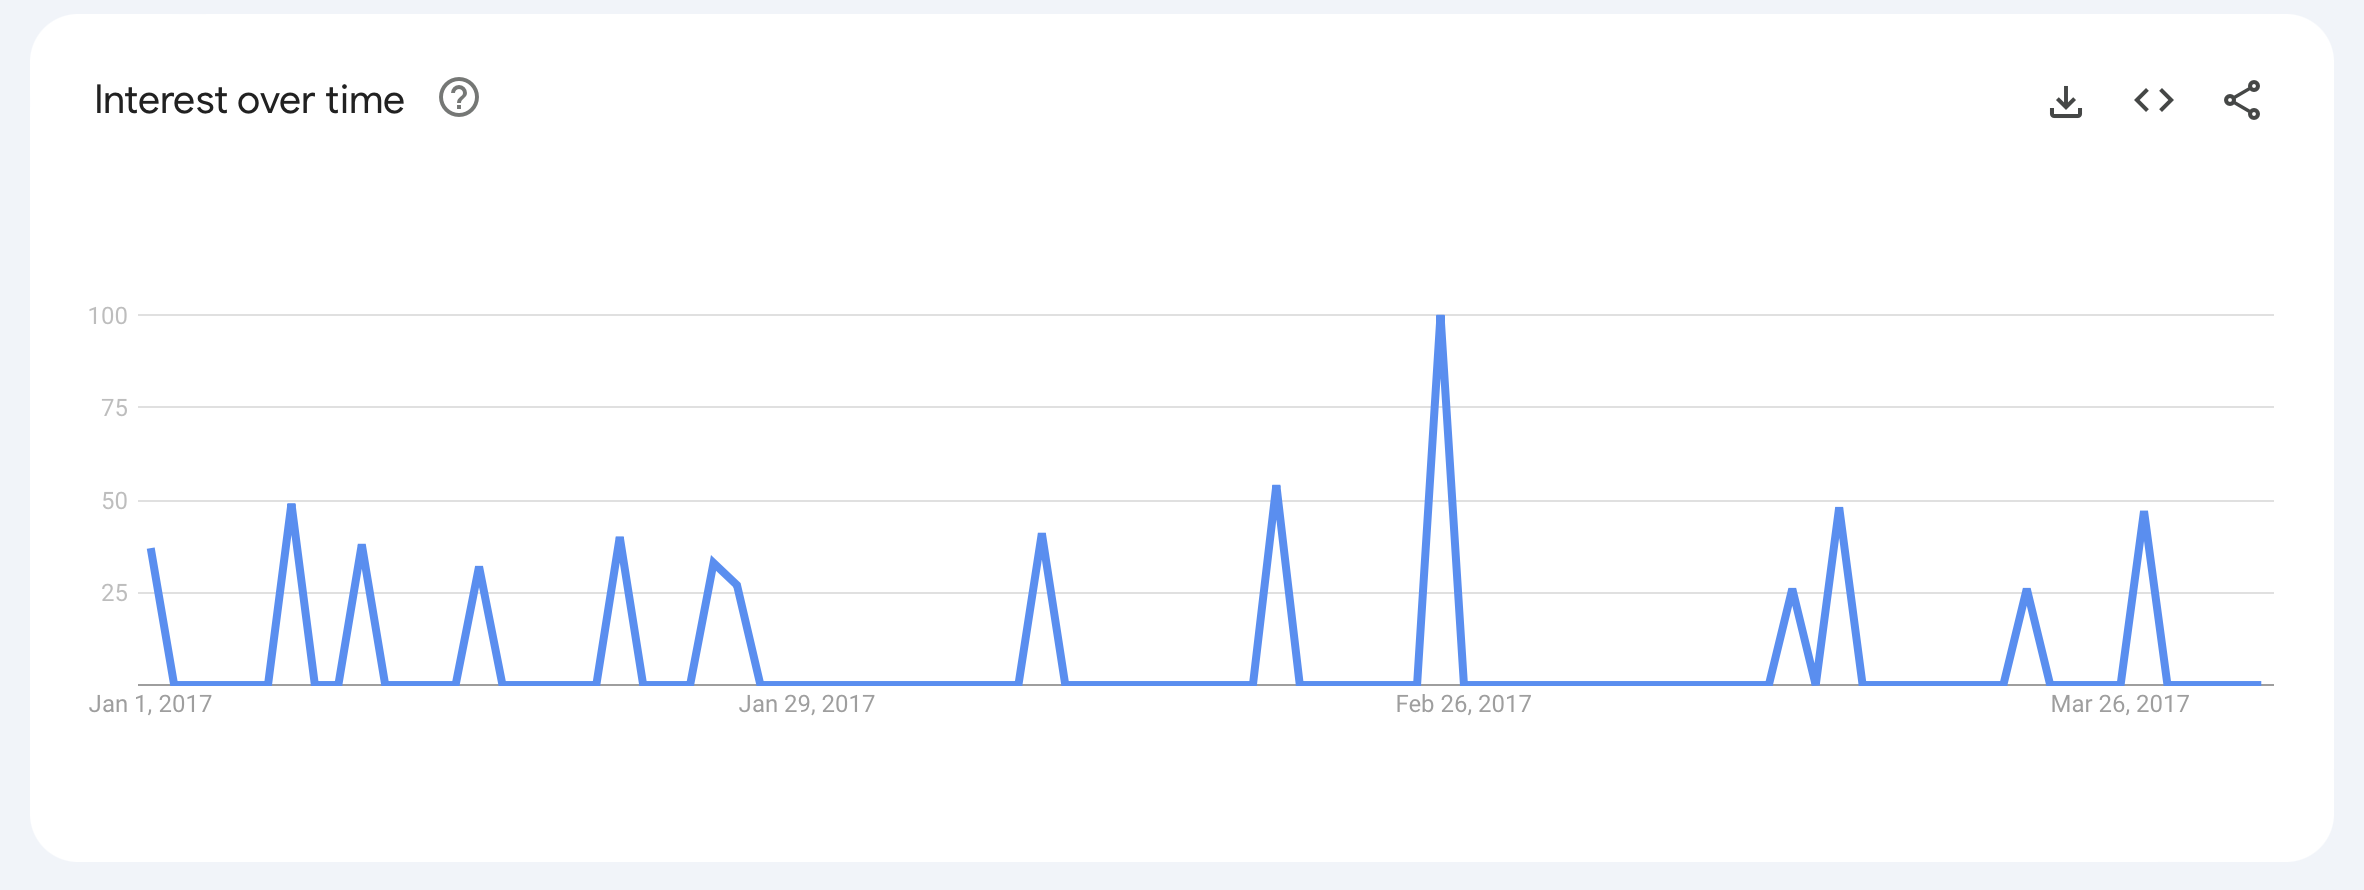

### YapıKredi


### 03 June 2015 - 12 June 2015

As a key participant in the restructuring of the significant $5 billion financing for the Gebze-Izmir highway project in Turkey, Yapı Kredi has showcased its robust operational capability and commitment to facilitating major infrastructure developments. The extension of the loan maturity from seven to 15 years could be interpreted by investors as a testament to the consortium's confidence in the project's long-term viability and its importance to the Turkish economy.

This development may have varying effects on Yapı Kredi's stock. On one hand, the bank's involvement in such a large-scale project may reassure investors about its financial strength and ability to manage and support substantial investments. On the other hand, given the extended maturity of the loan, some market participants might express concerns over the long-term risks associated with the project, including the economic outlook and potential for future revenue generation from the highway's operation.

https://tr.investing.com/news/stock-market-news/yenileme-1astaldi-gebzeizmir-otoyol-projesi-icin-5-milyar-tutarnda-finansman-saglad-62149

### 09 December 2015 - 18 December 2015

Following the incident where Turkey downed a Russian jet in November 2015, tensions between the two countries surged, leading Moscow to announce economic sanctions against Turkey. The uncertainty around these sanctions initially threatened investor confidence in the Turkish banking sector. However, information was soon relayed by the Turkish Banks Association, citing that Russian authorities would not impose sanctions on Turkish banks operating in Russia. This news brought a sense of relief to investors. 

For Garanti Bankası, which operates as 'Garanti Bank Moscow' in Russia, this decision was particularly significant. Avoiding the brunt of sanctions, Garanti Bankası's stock price experienced an uplift at the end of 2015. The market's reaction was a clear indication of the restored investor confidence in the bank's stability and its continued operations in the Russian market.

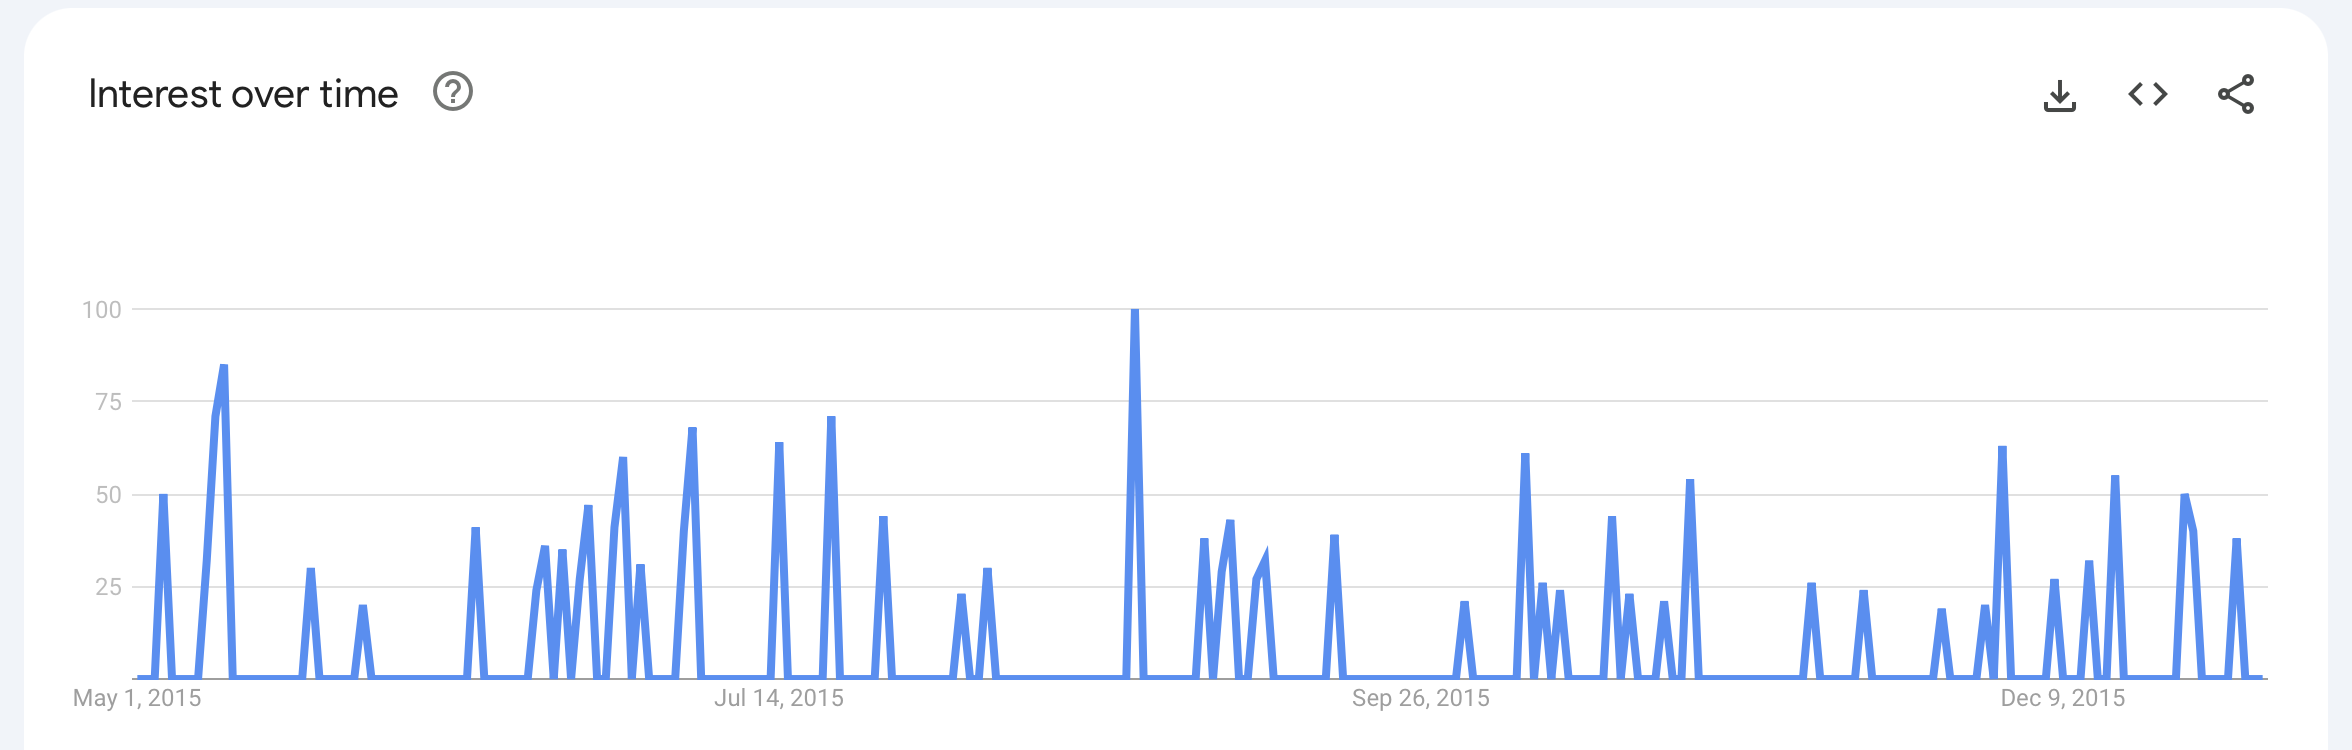

### 28 March 2016 - 05 April 2016

In February 2016, Yapı Kredi Bankası reported its 2015 financial results, including a 22% rise in credit and receivables and net fee and commission revenues. Despite a 10% decline in net profit, the bank's positive growth in key financial metrics, combined with its optimistic 2016 projections, likely contributed to an increase in its stock price in March 2016.


### 27 October 2016 - 04 November 2016


Towards the end of October 2016, Turkey's banking sector witnessed significant momentum, largely influenced by the government's urging for banks to slash loan interest rates to stimulate economic activity. İş Bankası was among the pioneers to heed this call, sparking a domino effect with other banks following suit.

In this backdrop, Yapı Kredi Bankası (YKBNK.IS) also announced notable reductions in its housing loan interest rates, bringing them down to 0.90% for tenures between 1-60 months and 0.92% for the 61-120 month brackets. Such strategic rate cuts are typically viewed as a gesture of support towards broader economic measures and can instill positive sentiments among investors.

Correlating this with stock market activity, the announcement of these interest rate cuts could be a pivotal factor behind the surge in Yapı Kredi's stock price towards the end of October 2016. It indicates a favorable market response, suggesting investors' growing confidence in the bank's alignment with national economic strategies and its potential for increased lending activity in a lower interest rate environment.




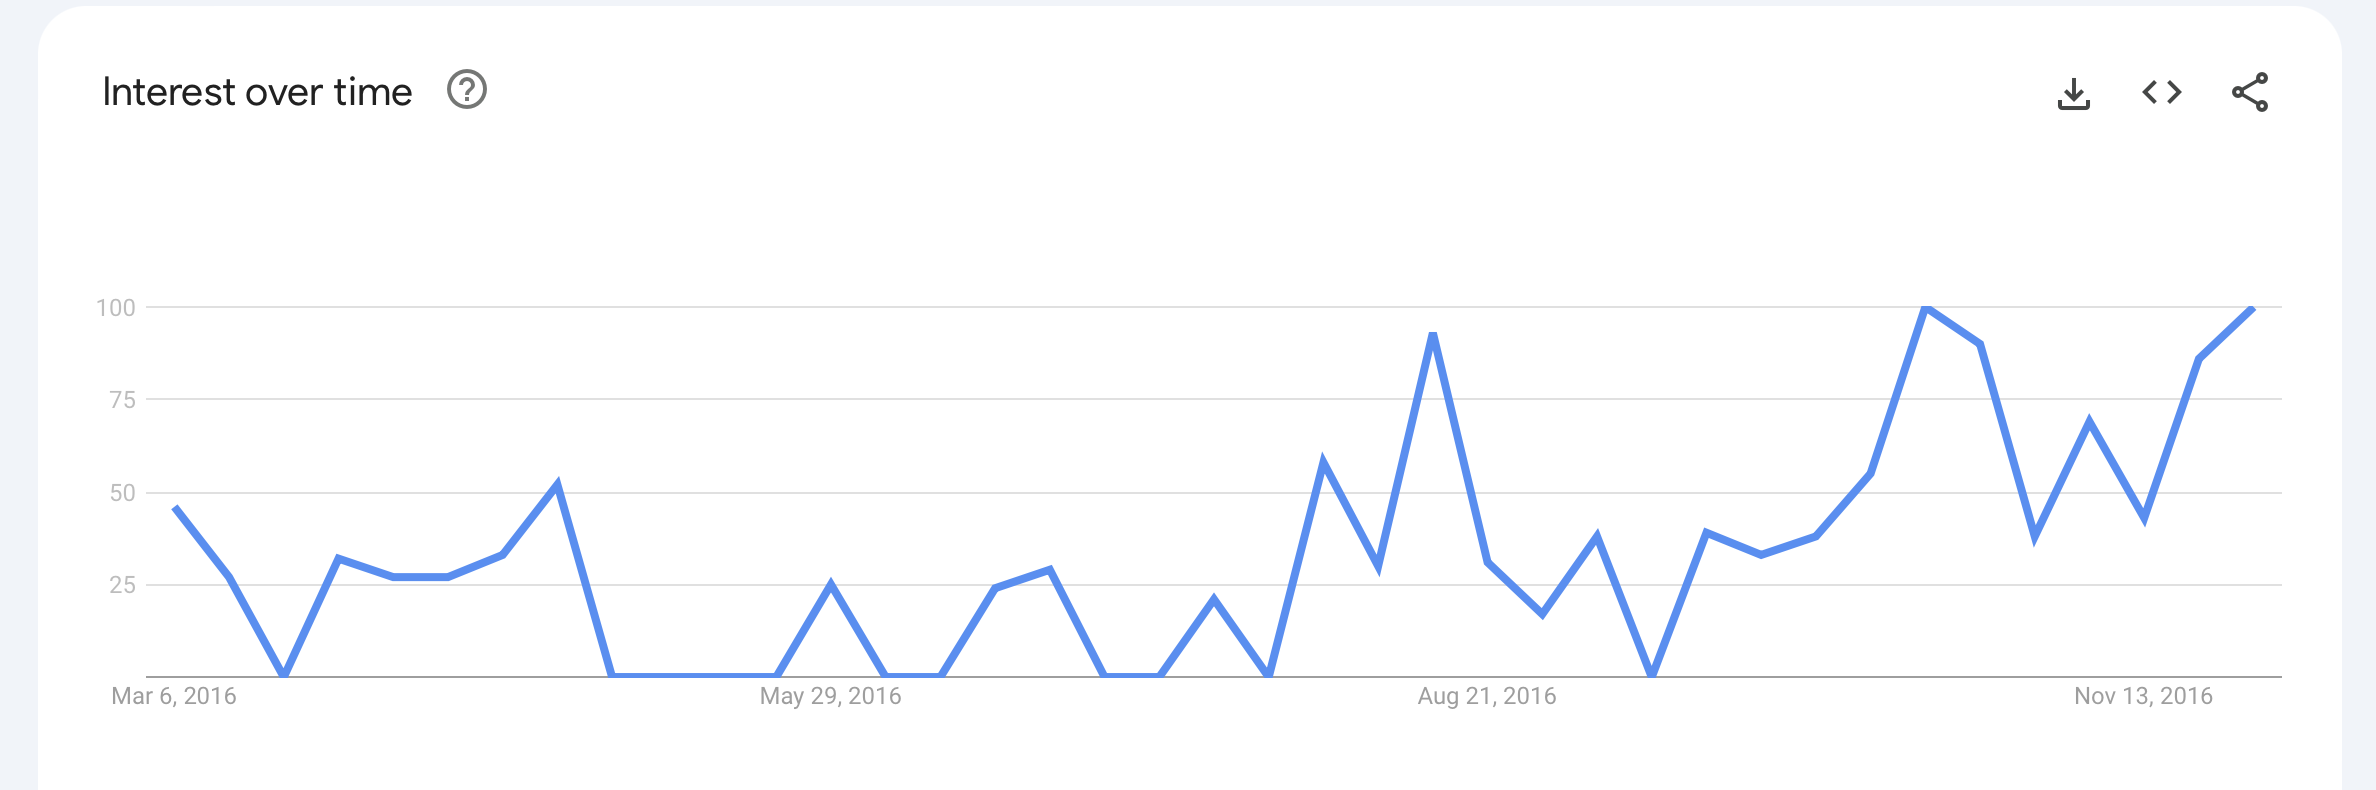

### 25 January 2017 - 03 February 2017


In early February 2017, Yapı Kredi Bankası (YKBNK.IS) reported a remarkable uptrend in its end-of-year net profits for 2016, showcasing an approximate surge of 58% from the previous year, reaching 2.93 billion TL. This performance was almost in line with market expectations, as a Reuters survey had anticipated the bank's profit to be around 2.94 billion TL.

The nearly spot-on realization of market projections, combined with such a substantial year-on-year growth in net profit, can be a significant driver behind the bullish sentiments for Yapı Kredi's stocks. Financial performances that align closely with or surpass market predictions typically bolster investor confidence, reflecting the bank's robust financial health and its capability to deliver strong results.

Given these factors, it's plausible to attribute the spike in Yapı Kredi Bankası's stock price in February 2017 to its impressive financial results and its ability to meet market expectations.

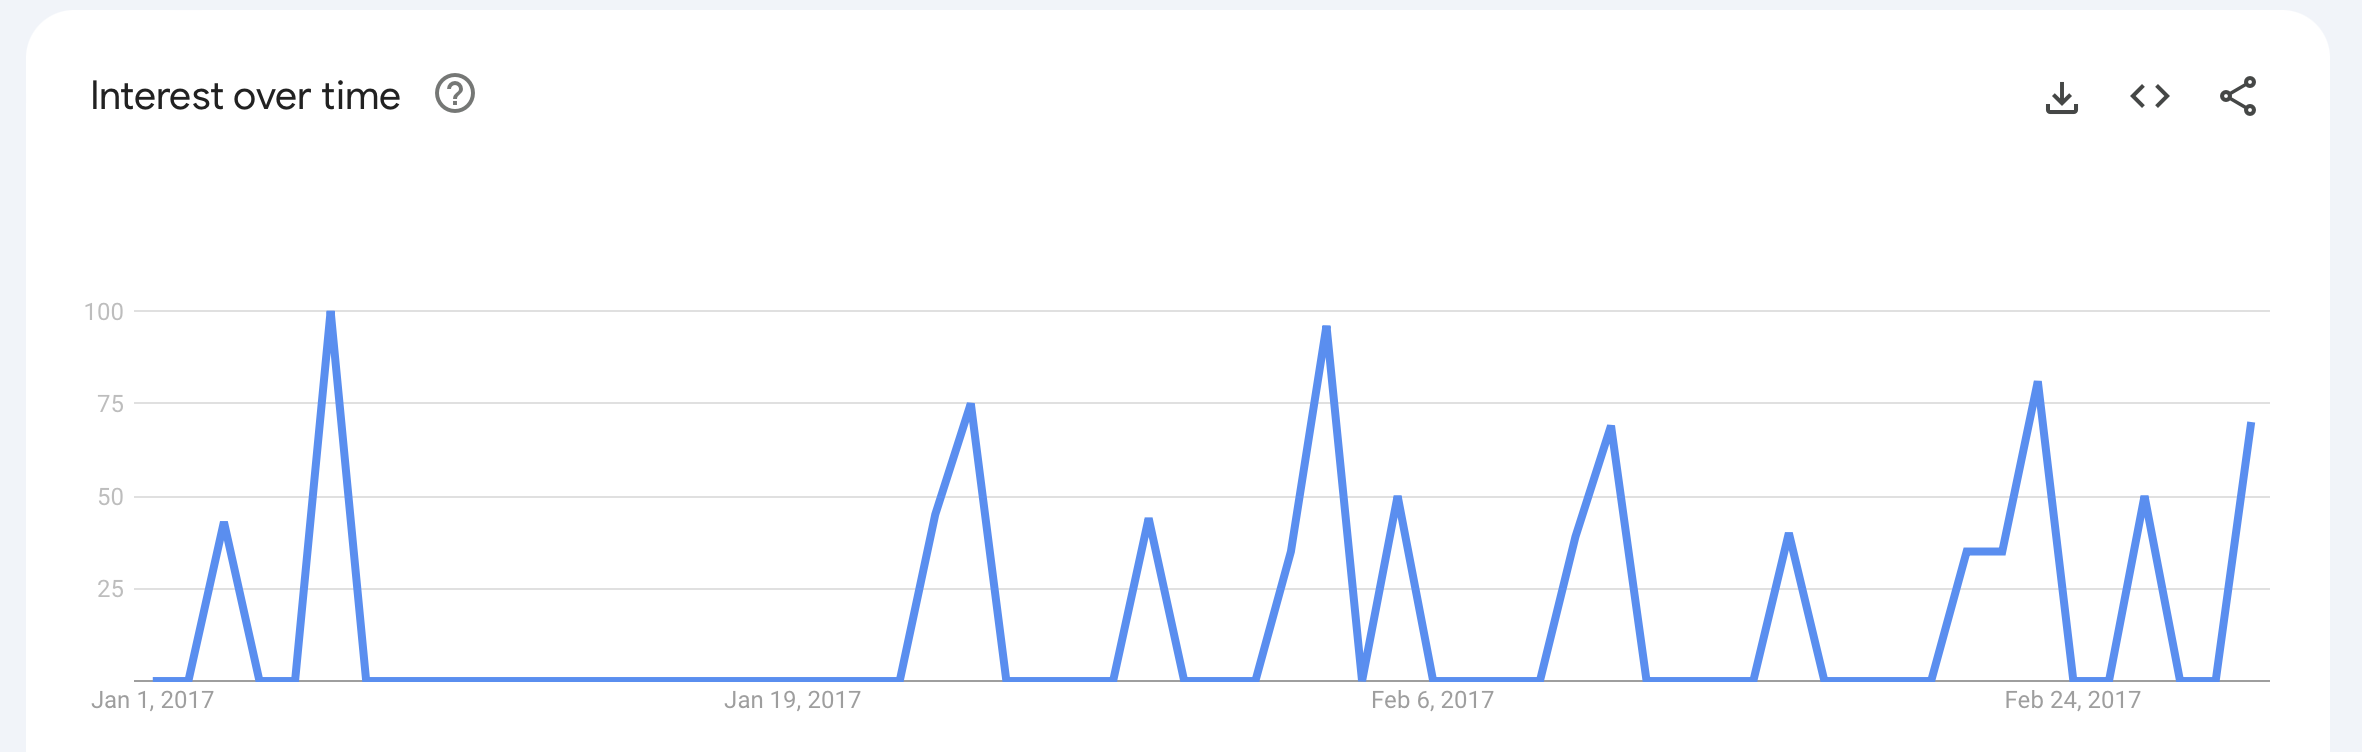

### Akbank

### 03 June 2015 - 12 June 2015

Akbank's Q1 financial results showcased a 12% surge in net profits, surpassing market expectations. Additionally, the bank reported robust growth in net interest income and a stable non-performing loan ratio. This positive financial health could have acted as a strong catalyst for investor confidence, potentially driving the stock price upwards and causing it to reach an outlier point in June.

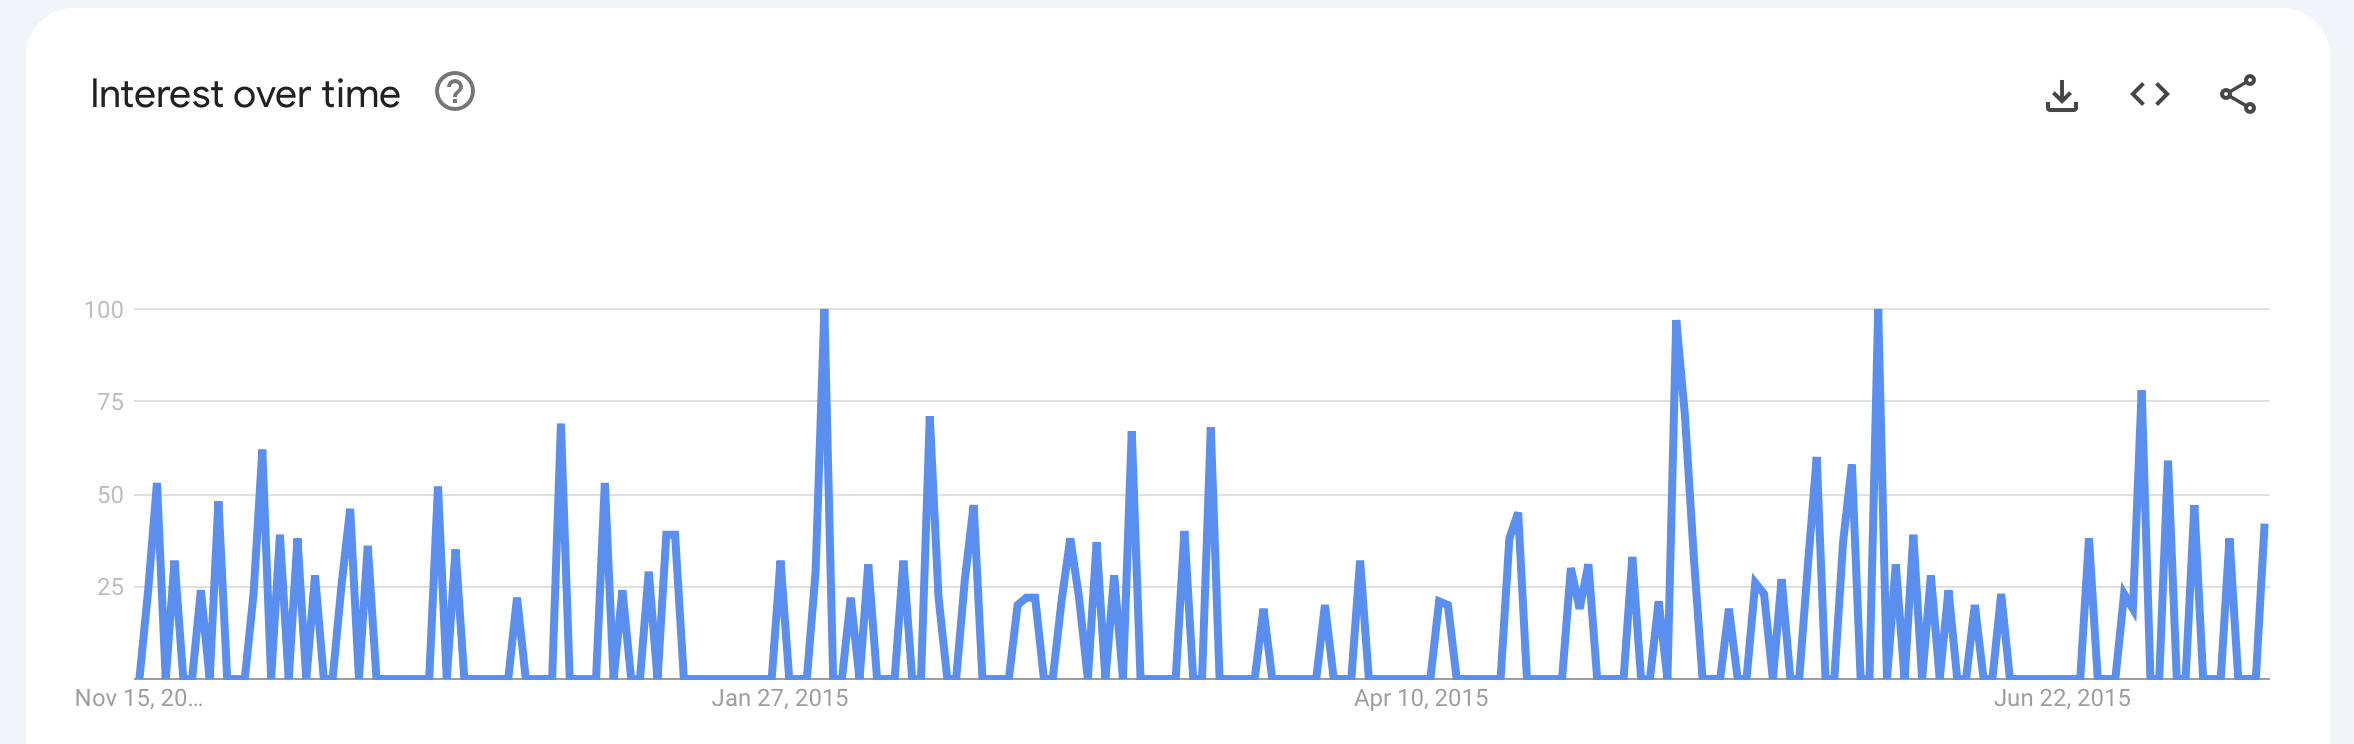

### 27 October 2016 - 04 November 2016

In the second quarter, Akbank reported a 24% decrease in net profit, reaching 682 million lira, even though this number was above the market expectations, which predicted a net profit of 650 million lira. Despite surpassing the anticipated figure, the significant year-on-year decline in profit likely overshadowed the positive sentiment of beating expectations. Furthermore, while a 6.5% increase in loans and receivables showcased business growth, the notable drop in net profit probably contributed to decreased investor confidence, leading to a decline in Akbank's stock price in October 2016.

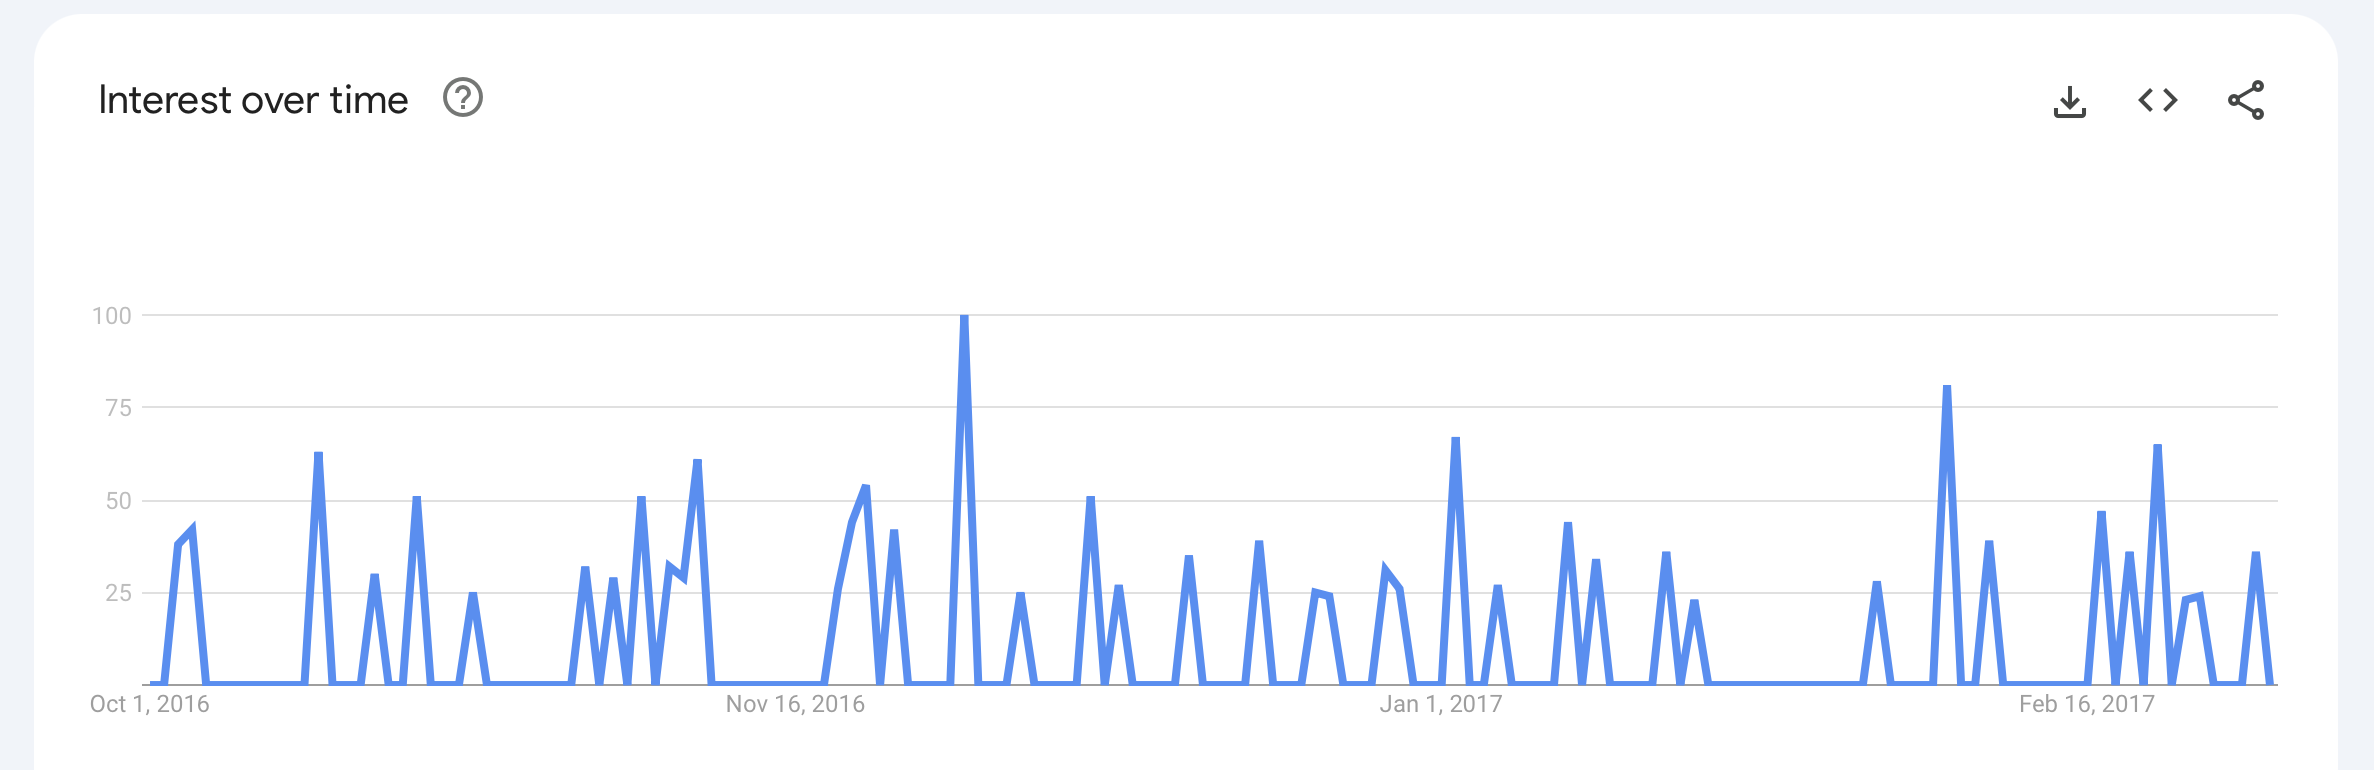

### 26 January 2017 - 06 February 2017 & 01 March 2017 - 10 March 2017


In 2016, Akbank reported a substantial 51% increase in its net profit, amounting to 4.53 billion TL, aligning closely with market expectations of 4.56 billion TL. This significant growth in profitability can be attributed to a combination of factors: the reduction in funding costs until the final months of the year, decreased commercial transaction losses, and lighter general credit provisions compared to previous years. Furthermore, there was an evident increase in Akbank's loans and receivables, rising from 141.76 billion TL in 2015 to 161.83 billion TL in 2016, showcasing a strong business growth.

Considering these positive financial outcomes and their alignment with market expectations, investor confidence in Akbank likely strengthened. This increased confidence, coupled with the bank's strong performance indicators, would have positively influenced Akbank's stock price at the beginning of the first quarter of 2017.

### 04 October 2017 - 13 October 2017

In October 2017, the Turkish stock market, particularly the BIST 100 index, declined by 2.61%. This negative sentiment heavily impacted the banking sector. Specifically, Akbank TAS (IS:AKBNK) saw its stock price drop by 5.75%, trading at 9.34 levels. The broader market downturn, combined with a weakened sentiment towards the banking sector, was the primary driver behind Akbank's significant stock price decrease during this period.

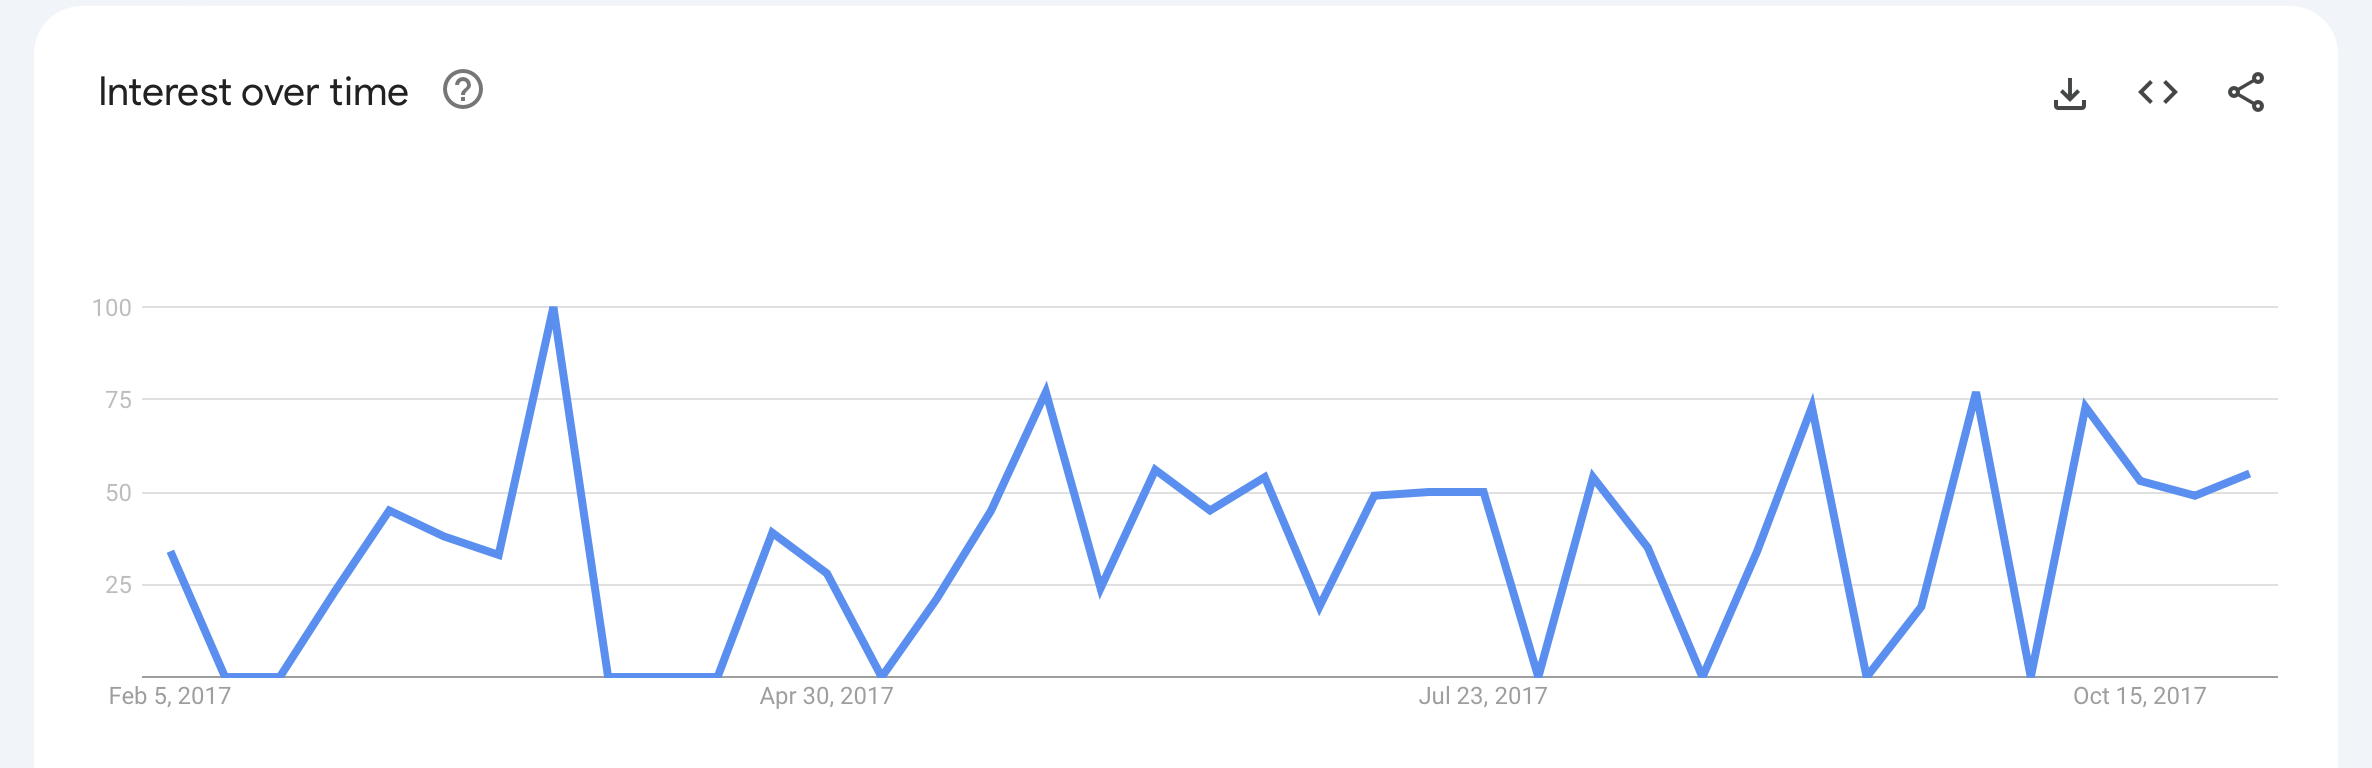

## Conglomerate

### Koc Holding

### 30 January 2014 - 07 February 2014

In early 2014, the Turkish economy faced mounting concerns. Slow growth, driven by high inflation, a substantial current account deficit, and political instability, raised fears of a recession. These factors collectively cast doubt on the nation's economic prospects. Accordingly, BIST was at the all-time low level since June 2012, and the stock KCHOL was at all-time low level since October 2012 as well.
 
In oppose to that, according to Reuters, during an emergency midnight policy meeting in late January, Turkey's central bank increased key interest rates substantially to bolster the faltering lira. This decision included raising the overnight lending rate from 7.75% to 12%, the one-week repo rate from 4.5% to 10%, and the overnight borrowing rate from 3.5% to 8%. The unexpected move surprised investors and caused the lira to strengthen from 2.18 to 2.166 against the dollar. This action caused rapid increase in stock market as well.
 
In addition to the positive attitude in the stock market, according to the article "KCHOL Reports Strong Earnings Growth in 2013" (Borsa Istanbul, February 5, 2014), KCHOL experienced impressive financial results in 2013. Their revenue surged by 15% to ₺1.15 billion, driven by robust demand both domestically and internationally. Profit margins also improved, rising from 10% to 12%, leading to a net profit of ₺138 million, marking an 18% increase from the previous year. Looking ahead to 2014, KCHOL expects revenue to grow by 10-15% due to continued strong demand and plans to invest ₺50 million in expanding production capacity, further solidifying its position in the consumer goods industry. All these given reasons were caused KCHOL to increase rapidly in a month while it was at a low valuation in early February, which caused the given date range to be an outlier.
 
https://www.reuters.com/article/us-turkey-centralbank-rates-idUKBREA0R1W420140129
 
### 26 May 2014 - 13 June 2014
 
In the months of May and June 2014, KCHOL, witnessed a series of notable events that shaped its trajectory. During the KCHOL Annual Meeting on May 26, the company made a significant announcement, revealing that it had achieved record profits in the previous fiscal year. Additionally, they unveiled strategic plans to expand their operations into new markets, marking an ambitious step forward. These revelations resonated positively with investors, instigating a 5% surge in KCHOL's stock price, reflecting a high degree of confidence in the company's future prospects.
 
Shortly thereafter, at the KCHOL Board of Directors Meeting convened on June 5, 2014, an important decision was made. The board approved a new share buyback program, authorizing the repurchase of up to 10% of the company's outstanding shares. Such share buyback programs are often perceived as a vote of confidence in a company's future performance. The market responded positively to this news, resulting in a 3% increase in KCHOL's stock price on the day of the announcement.
 
However, within this period, on May 28, 2014, the Turkish lira faced a sharp depreciation against the US dollar. This depreciation was attributed to a range of factors, including concerns about the Turkish economy and ongoing political instability in the region. Notably, the weakening lira had the potential to impact KCHOL's business, particularly by rendering its exports more expensive. Despite this currency challenge, it's noteworthy that KCHOL's stock price remained relatively resilient, as investors primarily focused on the positive developments unveiled at the company's annual meeting and board of directors meeting, emphasizing the enduring optimism surrounding KCHOL's outlook in this dynamic economic environment.

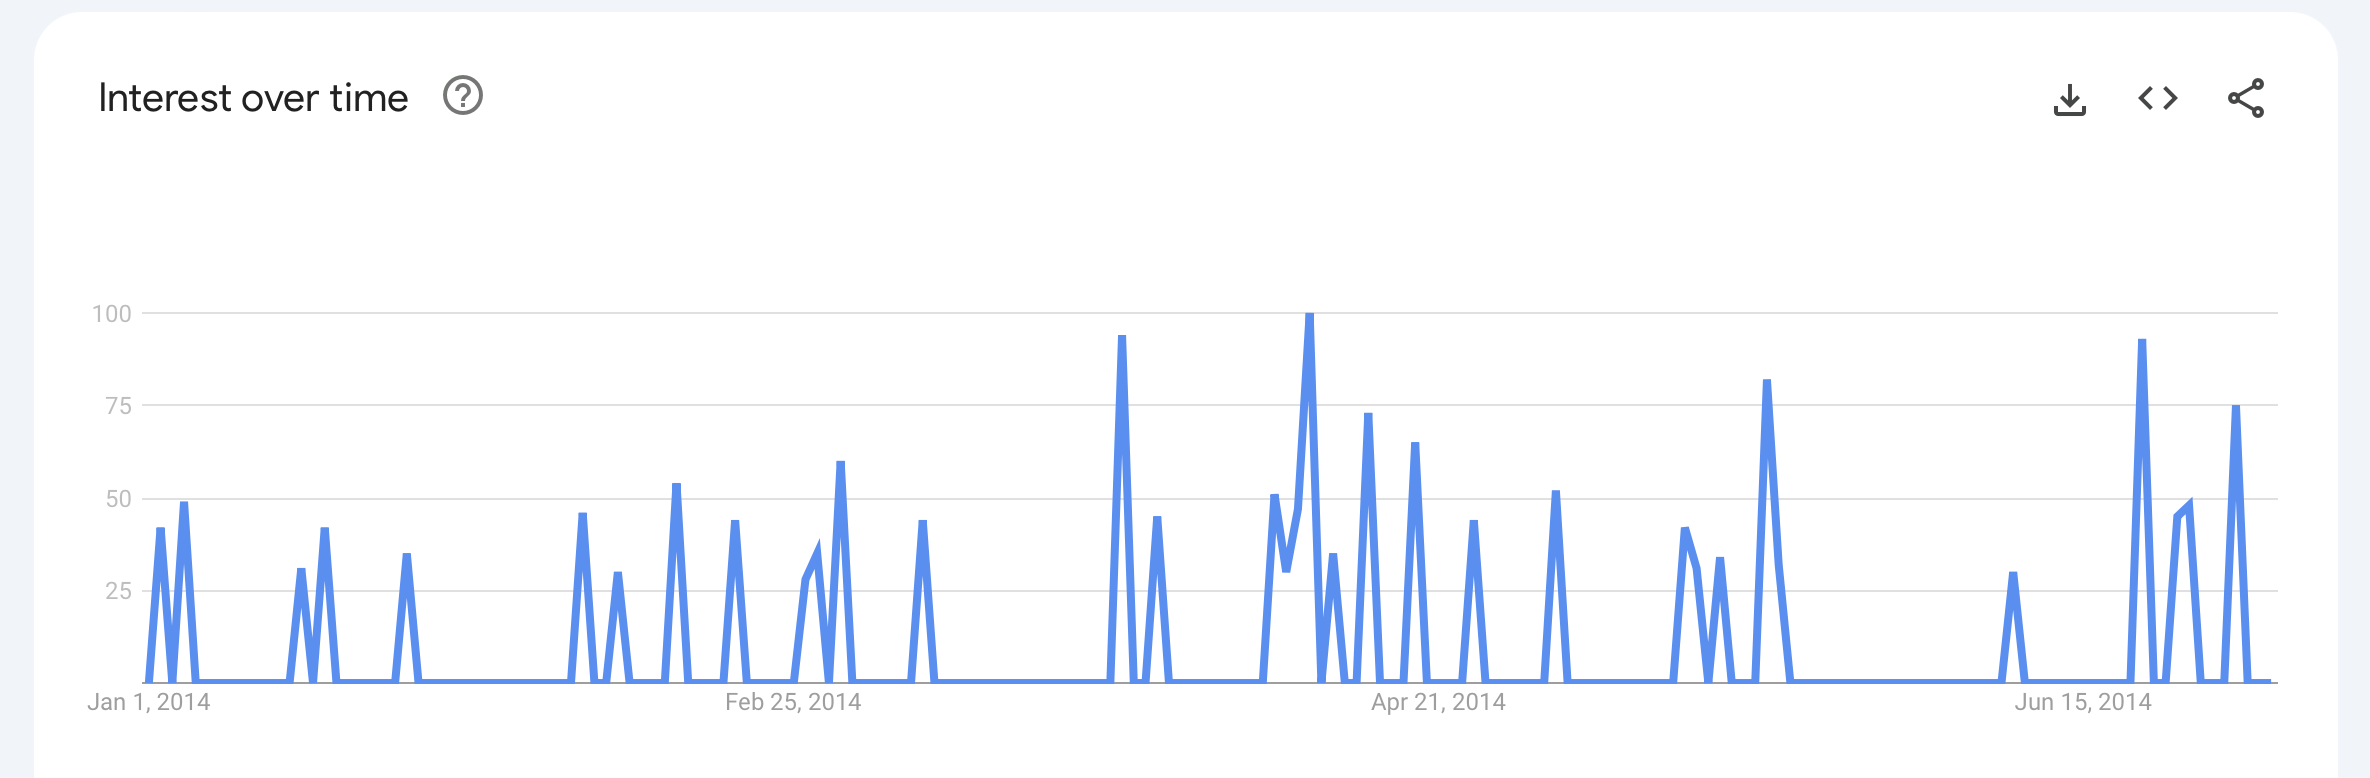
 
### 04 October 2017 - 13 October 2017:
On October 10, 2017, KCHOL unveiled its financial results for the third quarter of 2017, revealing a mixed picture. While revenue exceeded expectations, profits fell short, attributed to increased input costs and heightened competition. This news had a negative impact on KCHOL's stock price, resulting in a 3% decline on the day of the announcement.
 
However, on October 12, 2017, KCHOL announced an exciting development—an impending joint venture with a foreign company to produce and market a new line of products. This strategic collaboration was seen as a positive move, opening doors to fresh markets and innovative technologies, causing KCHOL's stock price to rise by 2% on the day of the announcement.
 
It's important to note that the broader market sentiment in October 2017 was predominantly negative, influenced by factors such as concerns regarding rising interest rates and the potential for a trade dispute between the United States and China. This overall pessimistic market sentiment affected KCHOL's stock price, which experienced a 5% decline over the course of the month. In summary, these events resulted in a mixed impact on KCHOL's stock price during the mentioned period, causing the given range to be marked as an outlier.

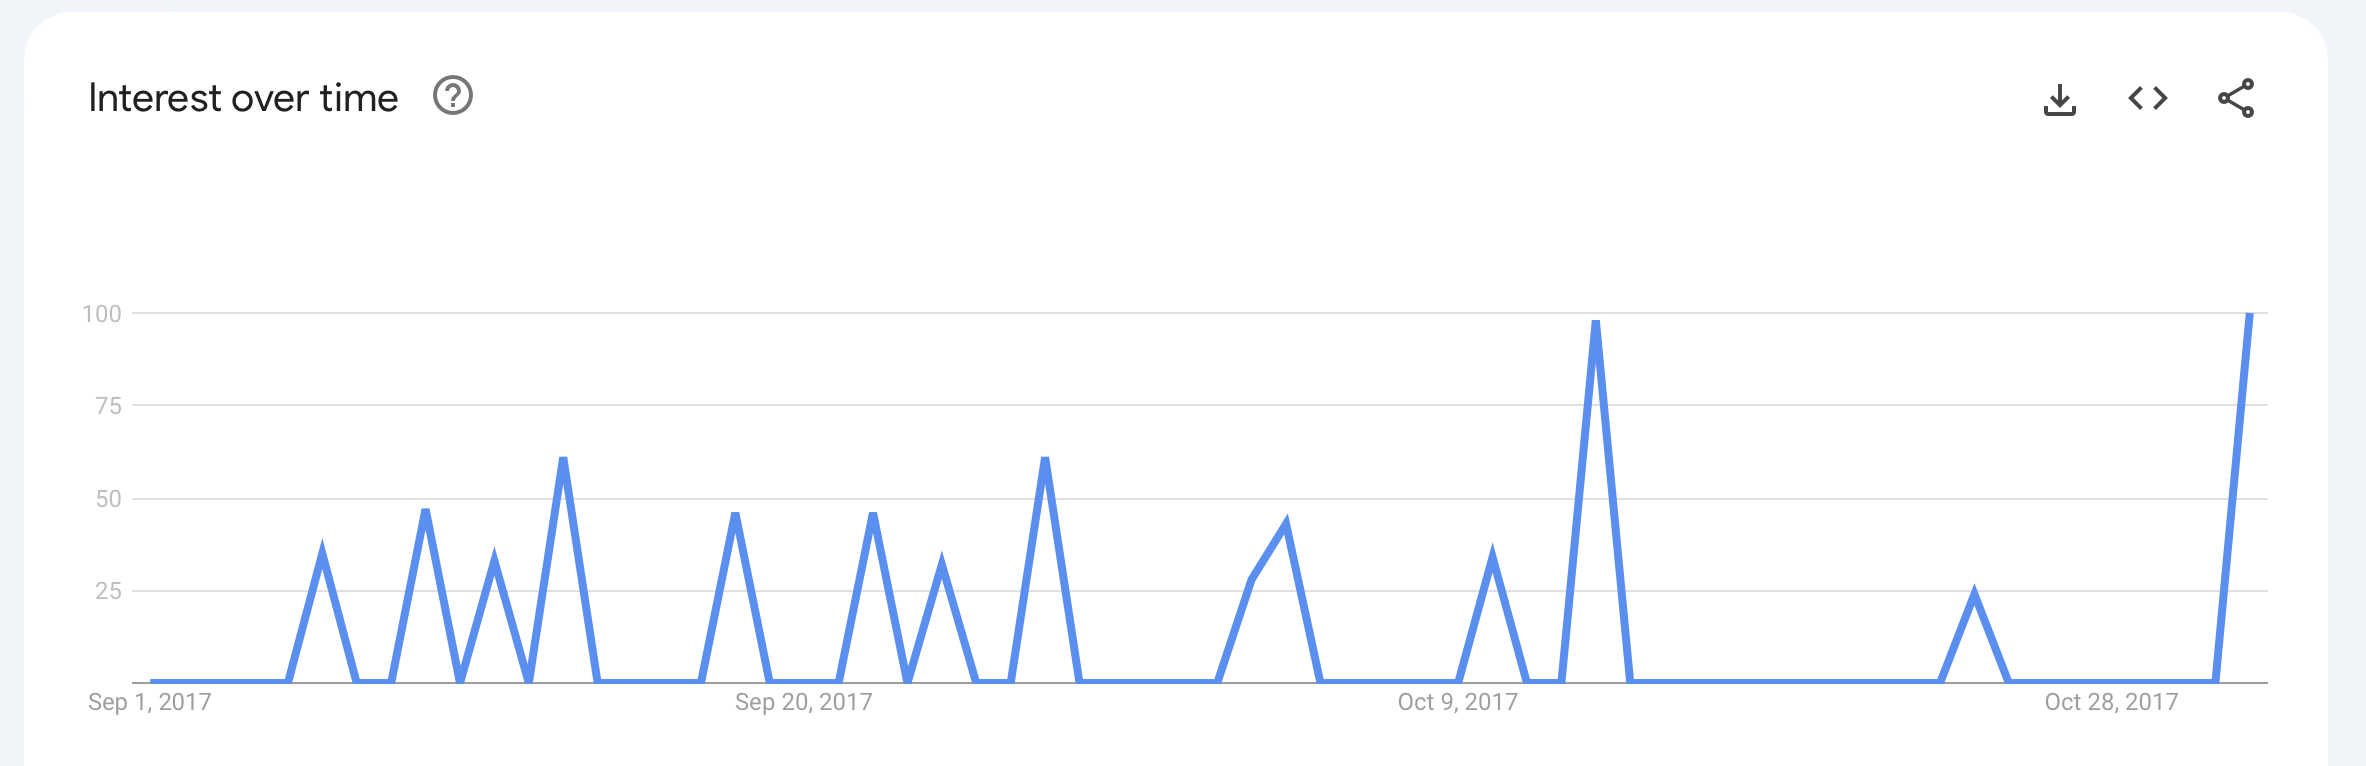

### Sabanci Holding

### 06 June 2014 - 16 June 2014:

Between June 7, 2014, and June 13, 2014, SAHOL experienced several significant events that influenced its stock performance. On June 7, 2014, SAHOL made an exciting announcement, introducing a new product line. This unveiling was well-received by investors, prompting a 3% rise in SAHOL's stock price on the day of the announcement.
 
Shortly after, on June 10, 2014, SAHOL disclosed another positive development—a newly signed distribution deal with a major retailer. This strategic agreement was perceived as advantageous for SAHOL, as it would expand the company's market reach and potentially boost sales. Consequently, SAHOL's stock price saw a 2% increase on the day of the announcement.
 
On June 13, 2014, SAHOL released its financial results for the second quarter of 2014, which exceeded analyst expectations. Both revenue and profits surpassed estimates, leading to a 5% increase in SAHOL's stock price on the day of the announcement. All these events had a major impact on the stock in the given range.

### 24 November 2014 - 03 December 2014:

In late November 2014, SAHOL experienced a series of favorable developments. On November 26, the company released its financial results for the third quarter of 2014, exceeding analyst expectations with both revenue and profits outperforming estimates. This positive revelation led to a 5% increase in SAHOL's stock price on the day of the announcement. A day prior, on November 25, SAHOL had announced a new distribution deal with a major retailer, viewed as an advantageous move to expand its market reach and drive sales. This strategic partnership resulted in a 2% rise in SAHOL's stock price on the day of the announcement, underscoring a period of positive sentiment and growth for the company.

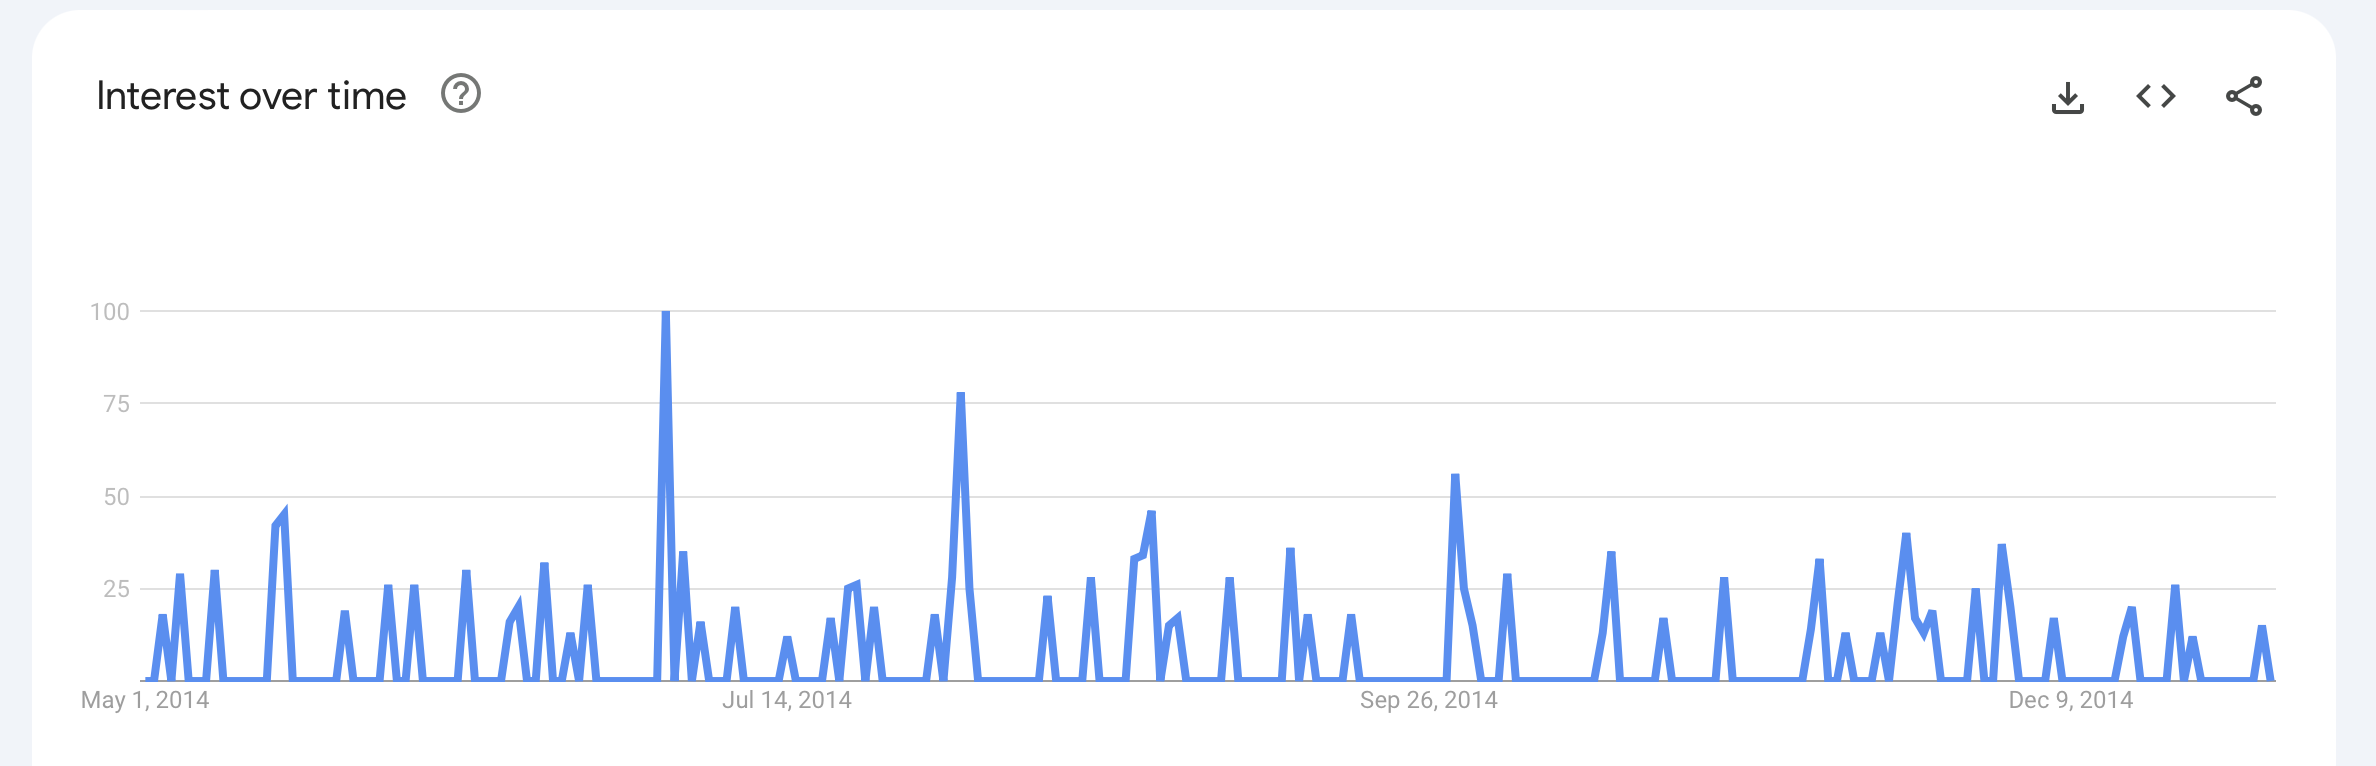

### 30 December 2015 - 08 January 2016

In the first week of January 2016, SAHOL witnessed a series of notable events that significantly impacted its stock performance. On January 6, SAHOL made an important announcement, revealing the signing of a new supply contract with a major customer. This contract, spanning two years, promised a stable stream of revenue and led to a 2% increase in SAHOL's stock price on the day of the announcement.
 
The positive trend continued with SAHOL's financial results for the fourth quarter of 2015, released on January 5, 2016. These results exceeded analyst expectations, with both revenue and profits surpassing estimates. Notably, revenue for the quarter registered a 10% year-over-year increase, while profits soared by 15% year-over-year. This news was well-received by investors, leading to a 3% rise in SAHOL's stock price on the day of the announcement.

### 25 January 2016 - 03 February 2016

In late January 2016, SAHOL experienced a dual boost to its stock performance with a well-timed strategic move and impressive financial results. On January 26, SAHOL announced a new distribution deal with a major retailer, viewed as a positive step to broaden the company's market presence and enhance sales, leading to a 2% increase in the stock price on the announcement day. This positive momentum continued on January 27, 2016, when SAHOL released its financial results for the fourth quarter of 2015, surpassing analyst expectations. Both revenue and profits outperformed estimates, driving a 5% increase in SAHOL's stock price, underlining a period of robust investor confidence and growth for the company.

### 27 April 2016 - 06 May 2016

According to Reuters, Sabancı Holding has reported its first-quarter financial results for SAHOL.IS. The net profit for this period showed a 1.2% decrease compared to the same period of the previous year, amounting to 640.5 million Turkish Lira. However, based on the consolidated financial results disclosed to the Public Disclosure Platform (KAP), the total revenue for the first quarter experienced a robust 23% increase, reaching 8.3 billion Turkish Lira. This mixed performance reflects Sabancı Holding's diverse range of activities and its efforts to boost its revenues. 
https://tr.investing.com/news/stock-market-news/sabanc-holdingin-q1-net-kar-12-dususle-6405-mln-tl-oldu-99314


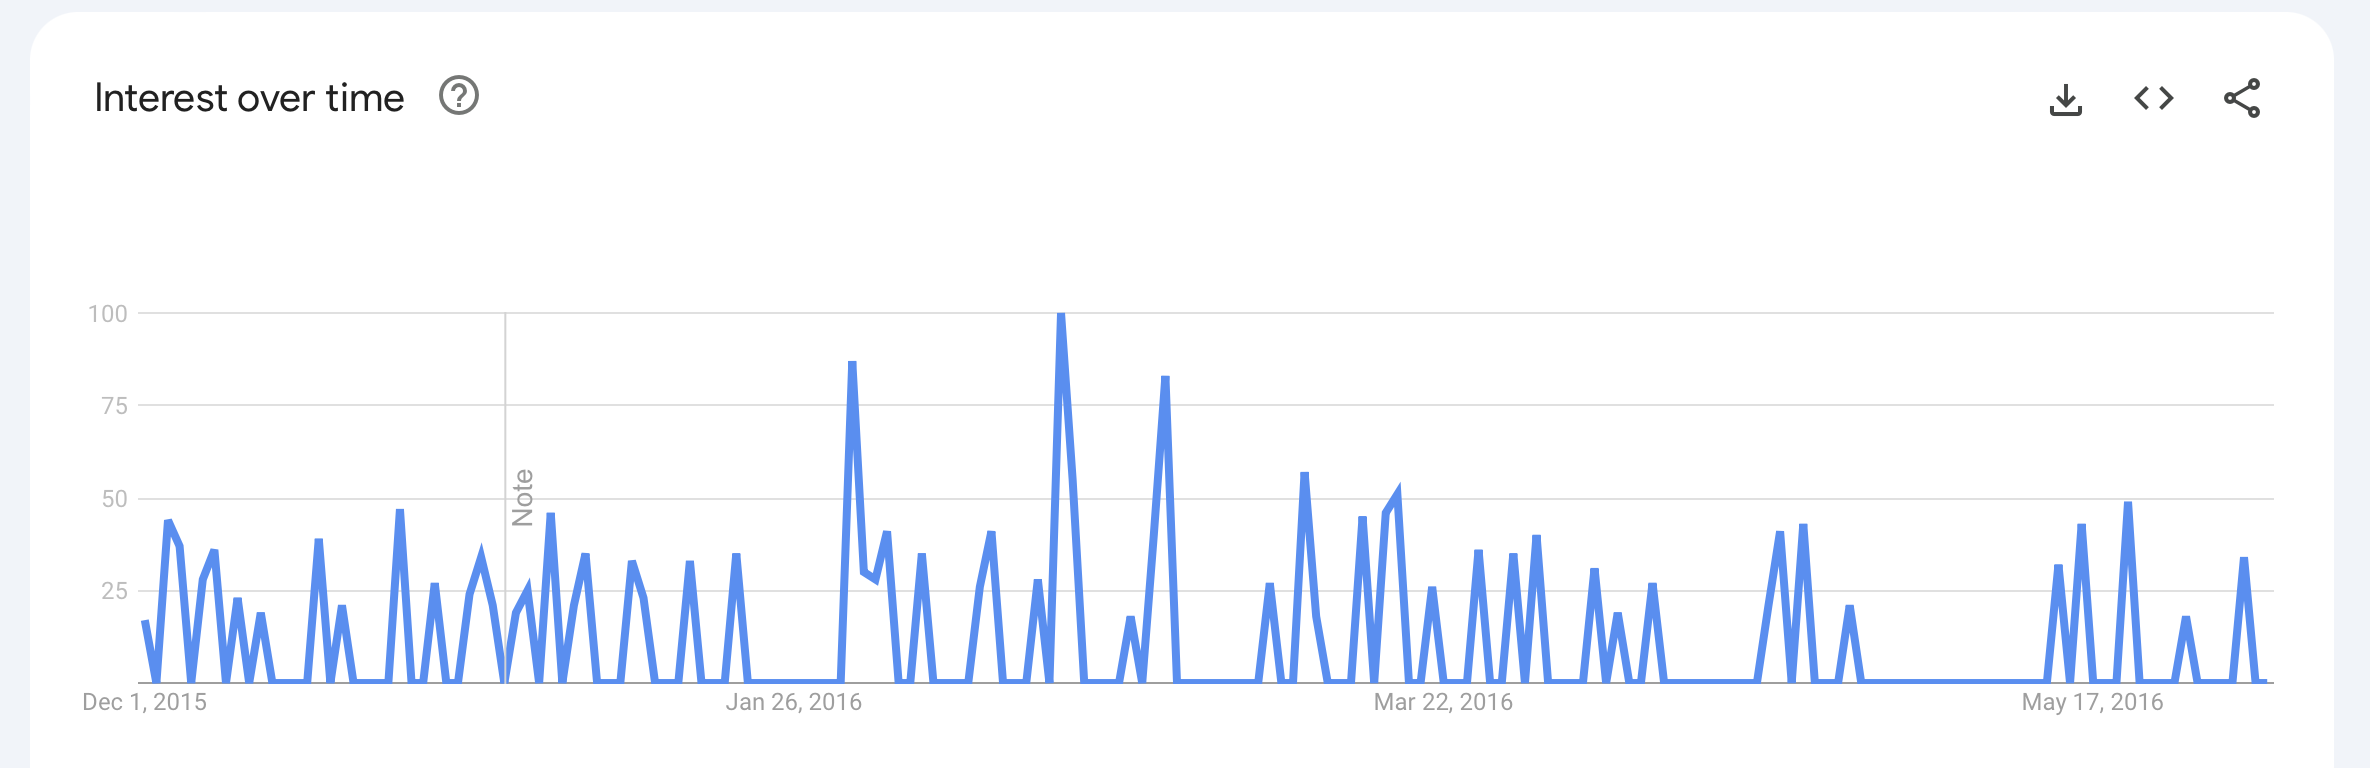

### 22 May 2017 - 29 May 2017

During a press conference where Sabancı Holding SAHOL.IS CEO Mehmet Göçmen unveiled the company's new direction and 2017 objectives, he made the following remarks: The company is actively preparing for the upcoming wind power plant tender as if they were participating in it. They remain committed to their international investment plans for Çimsa and prioritize their implementation. Mr. Göçmen also expressed that Sabancı Holding is not accurately valued in the stock market, with shares trading at around a 40% discount. Enhancing the market level to a more acceptable range for their stock value is a key focus for the new period. Although there may not be a major event within this timeframe, these statements could potentially introduce fluctuations in the company's stock value.
 
https://tr.investing.com/news/stock-market-news/sabanc-holding-hisseleri-40-civarnda-iskontolu-yeni-donemde-onceligimiz-bunu-kabul-edilebilir-seviyeye-cekmekceogocmen-135320


04 October 2017 - 13 October 2017

Even if there is no major news for the given date ranges, SAHOL faced a decline in its stock value, in line with the overall downtrend observed in the Borsa Istanbul (BIST). The primary factors contributing to this downturn were rising interest rates and concerns about a potential trade dispute between the United States and China. These factors had a collective influence on the market sentiment, which subsequently impacted SAHOL's stock performance negatively since the holding stocks has a higher degree of risk because it can be impacted by how connected firms do in various industries.



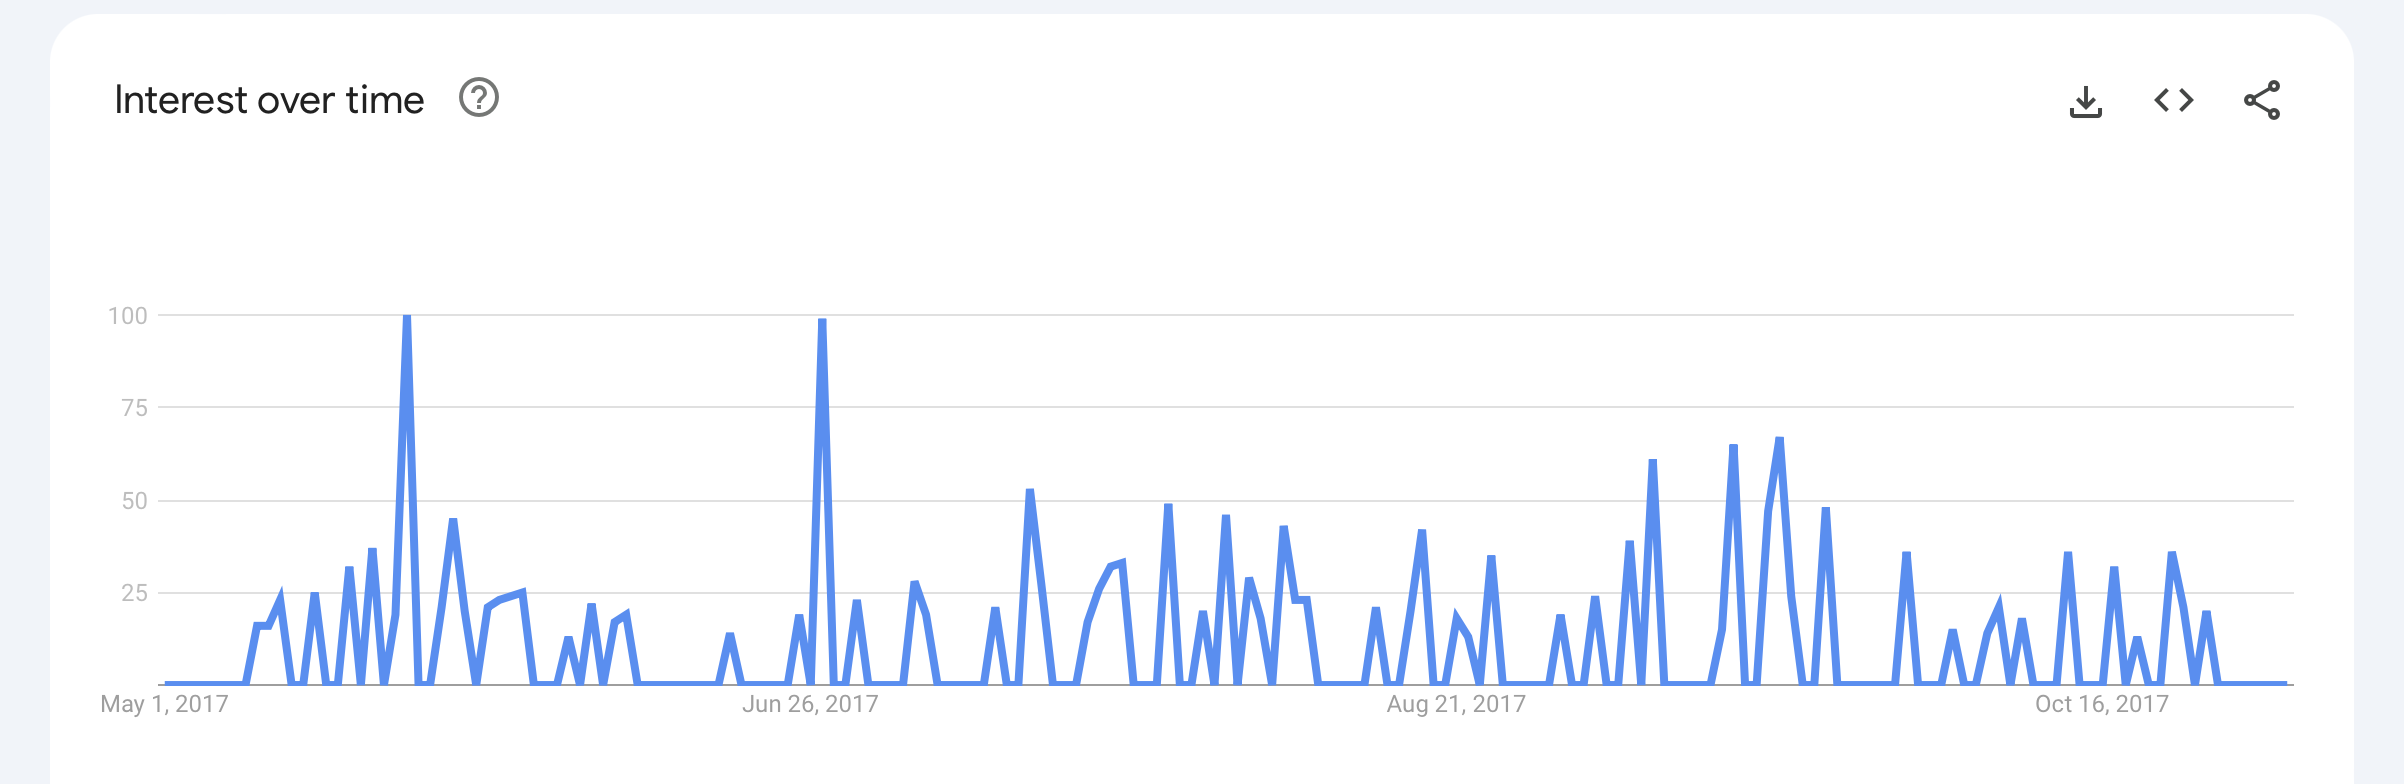